<a href="https://colab.research.google.com/github/pratikgujral/Machine-Learning-Scientist-With-Python/blob/master/Unsupervised_Learning_With_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part-1 : Introduction

## Resources
- Video: [MP4](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v4/ch1_1.mp4), [HLS](https://videos.datacamp.com/transcoded/2072_unsupervised_learning/v4/hls-ch1_1.master.m3u8)
- [Slides](https://s3.amazonaws.com/assets.datacamp.com/production/course_3161/slides/ch1_slides.pdf)

## K-Means Clustering
- Finds clusters of samples
- Number of clusters must be specified using `n_clusters` parameter

In [1]:
# Example - 1
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

iris = load_iris() # Loaded as a dictionary
print(iris.keys())

# Printing the target names
print(iris['target_names']) # Should print ['setosa' 'versicolor' 'virginica']

# Printing the feature names
print(iris['feature_names']) # Note, petal width(cm) is at index 3.

# iris['data'] is actually a 2D numpy array consisting of 4 columns
print(iris['data'].shape)

# Getting the petal width(cm) of all samples
samples = iris['data'][:, 3]
print(samples.shape) # Prints (150, )

# Reshaping the samples from (150, ) to (150,1)
samples = samples.reshape(-1,1)
print(samples.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)
(150, 1)


In [2]:
from sklearn.cluster import KMeans

# Instantiate the cluster
model = KMeans(n_clusters=3)

# Fitting the samples. Since, this is clustering, we do not pass the labels
model.fit(samples)

# Predicting the samples' label
labels_pred = model.predict(samples)
print(labels_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


- Given a new data point, K-Means can quickly predict the class the new data point should be assigned.
- It does so by storing the **centroid** (mean) of each cluster, and then choosing the nearest centroid for the new data point.

---
## Example 2
This example shall also use KMeans clustering to classify data points.

In [3]:
# Creating some data points for clustering
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])


labels = np.array([2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2])


new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

**NOTE:** 
- Our training set `points` is of shape (300,2) representing 300 points in xy coordinate space. We'll use this training set to create clusters. 
- The learnt centroids shall be used to determine the label for the test set. The test set `new_points` is also has the shape (300,2) representing 300 data points in xy coordinate space.  
- The `labels` variable holds the actual labels of the 300 points in the test set. This shall be used to evaluate the accuracy of the model.

In [4]:
print(points.shape)

print(labels.shape)

print(new_points.shape)

(300, 2)
(300,)
(300, 2)


**Creating a scatter plot to estimate the number of clusters in the dataset**

K-Means requires `n_clusters` parameter (representing # of clusters) to be passed before we call the `fit()` method. One of the ways of determining `n_clusters` is through visualizing the points on a scatterplot.

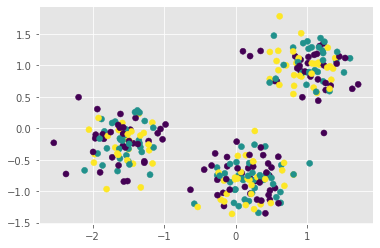

In [5]:
xs = points[:, 0] # 0th column of points
ys = points[:, 1] # 1st column of points

plt.figure()
plt.scatter(xs, ys, c=labels)
plt.show()

We can clearly see there are 3 clusters in our dataset.

So, we'll be using KMeans to perform an unsupervised learning on the points dataset with **3** clusters.

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(points)

pred = model.predict(new_points)

### Cluster centroids
We can get the cluster centers by accessing `model.cluster_centers_` attribute of the `model`. Every cluster group would have one centroid. So, number of centroids obtained would be same as number of clusters (=`n_clusters`)

>>> Centroids have the shape: (3, 2)


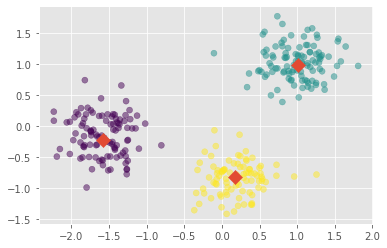

In [7]:
centroids = model.cluster_centers_
print(">>> Centroids have the shape:", centroids.shape)

xs = new_points[:, 0]
ys = new_points[:, 1]

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.figure()
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker='D', s=100) # s is for size
plt.show()

## Quality of clusters
**Video**: [MP4](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch1_2.mp4), [HLS](https://videos.datacamp.com/transcoded/2072_unsupervised_learning/v1/hls-ch1_2.master.m3u8)

- We use **cross-tabulations** to evaluate the quality of clusters. But the problem is that since our dataset in most cases would be unlabelled (unsupervised learning), we can use only the samples and cluster labels to evaluate the clusters.

- A good clustering has tight clusters - samples are close to one another.

- The spread of the samples in a cluster can be measured by **inertia**. Inertia meaures how spread out the clusters are. Lower the inertia, better is the model.

### Using inertia as a metric to determine number of clusters (`n_clusters`)

In [8]:
# Getting the seeds dataset from UCI Machine Learning repository
#!wget --no-check-certificate "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

--2020-07-07 02:44:45--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.113, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/58elemisu5rmg3b77ssgulpdf5a150a6/1594089825000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:44:45--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/58elemisu5rmg3b77ssgulpdf5a150a6/1594089825000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

Reading the dataset...

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

# Creating training set by removing the 'target' column from the grains DataFrame
samples = grains.drop('target', axis=1).to_numpy()

In [10]:
grains.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [11]:
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

**Finding how many clusters of grain are there by exploring the data in a scatterplot varying the number of clusters**

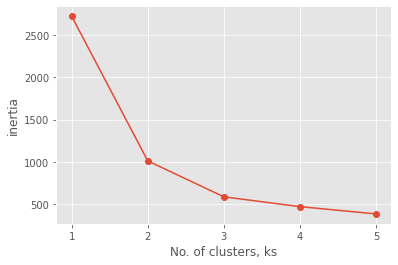

In [12]:
ks = range(1,6)
inertias = []

for k in ks:
  # Creating a model
  model = KMeans(n_clusters=k)

  # Fitting the data
  model.fit(samples)

  # Accessing the model inertia
  inertias.append(model.inertia_)

# Plotting ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('No. of clusters, ks')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

 The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

 So now, we cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [13]:
model = KMeans(n_clusters=3)

# Calling fit_predict method on model passing the samples. 
# This is equivalent to calling model.fit(samples) and then model.predict(samples)
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': target_names})
print(df.head())

# Creating a cross-tabulation 
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

   labels   varieties
0       2  Kama wheat
1       2  Kama wheat
2       2  Kama wheat
3       2  Kama wheat
4       2  Kama wheat
varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

## Transforming data for better clusterings
**VIDEO**: [MP4](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch1_3.mp4), [HLS](https://videos.datacamp.com/transcoded/2072_unsupervised_learning/v1/hls-ch1_3.master.m3u8) 

- If the features have very different variances (or standard deviations) the resulting clustering wouldn't be good.
- In KMeans, feature variance = feature influence. So it is important to scale the features properly before clustering.
- We can use **`StandardScaler`** that transforms each feature to have `0` mean and `1` standard deviation.

STEPS
1.   Import `StandardScaler` from `sklearn.preprocessing`
2.   Instantiate the `StandardScaler()`
3.   Fit the samples by calling the `fit()` method on the scaler object
4.   Transform the samples to scale the features by calling the transform method of the scaler with the data



In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use('ggplot')

In [15]:
fish = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv",
                   names = ['species', 'weight', 'length1', 'length2', 'length3', 'height%', 'width%'])
fish

,species,weight,length1,length2,length3,height%,width%
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [16]:
# Creating instance of StandardScaler
scaler = StandardScaler()

# Creating instance of KMeans
kmeans = KMeans(n_clusters=4)

# Building a pipeline. We pass the objects in the order they are to be executed
pipeline = make_pipeline(scaler, kmeans)

# Removing the known target variable from the DataFrame
species = fish['species']
fish = fish.drop('species', axis=1)

# Fitting the data. NOTE: fit() is called directly on the pipeline object
pipeline.fit(fish)

# Getting the predicted labels from our fitted clusters
labels = pipeline.predict(fish)

# Instead of calling model.fit(fish) and model.predict(fish) methods separately,
# we could have also called model.fit_predict(fish) instead.

# Creating a DataFrame with the predicted labels and known species (target) as columns
df = pd.DataFrame({'labels': labels, 'species': species})

# Building a cross tabulation table with the predicted labels and knnown targets
ct = pd.crosstab(index=df['labels'], columns=df['species'])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0    17      0      0
3            1     0     19      1


From the crosstab, it seems like the fish dataset was clustered well among the 4 clusters

## Example 2: Clustering stocks using KMeans
We'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which we used in the previous exercise. While `StandardScaler()` standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other. 

[`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) works by scaling each non-zero row of X to unit norm.

In [17]:
import pandas as pd

movements = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv")
print(movements.shape)
movements.head()

(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,

In [18]:
# Removing the first column from the DataFrame as it is the target variable
companies = movements.iloc[:, 0]
movements = movements.iloc[:, 1:]

In [19]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

# Creating the normalizer
normalizer = Normalizer()

# Instantiating KMeans
kmeans = KMeans(n_clusters=10)

# Building the pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fitting the data
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

**Which stocks move together?**

We have already clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? We'll now inspect the cluster labels from our clustering to find out.

In [20]:
# Predicting the labels for our learnt cluster
labels = pipeline.predict(movements)

# Creating a DataFrame of the predicted clusters and known targets
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Displaying the DataFrame sorted by predicted cluster label
print(df.sort_values('labels'))

    labels                           companies
28       0                           Coca Cola
38       0                               Pepsi
9        0                   Colgate-Palmolive
40       0                      Procter Gamble
27       0                      Kimberly-Clark
21       1                               Honda
2        1                              Amazon
45       1                                Sony
58       1                               Xerox
7        1                               Canon
34       1                          Mitsubishi
22       1                                  HP
15       1                                Ford
48       1                              Toyota
44       2                        Schlumberger
35       2                            Navistar
10       2                      ConocoPhillips
8        2                         Caterpillar
53       2                       Valero Energy
13       2                   DuPont de Nemours
41       3   

---

# Part 2: Visualizing hierarchies
**Video:** [MP4](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch2_1.mp4), [HLS](https://videos.datacamp.com/transcoded/2072_unsupervised_learning/v1/hls-ch2_1.master.m3u8) 

[Slides](https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=1)

1.  **t-SNE**: Creates a 2D map of any dataset and conveys information about proximity of samples from one another.
2.  **Hierarchical clustering**

## Hierarchical clustering
Eg. Living things organize themselves into small groups like 'humans', 'apes', 'snakes', 'lizards'. These can be clustered together into groups such as 'mammals' and 'reptiles'. These can further be grouped into more broader groups such as 'animals'

- Hierachical clustering works in steps
- In the beginning, each observation is a cluster in itself, and so there are as many clusters as observations in the dataset.
- At each step, the two closest clusters are merged. This decreases the number of clusters in the group and eventually, we are left with only one single cluster.
- This type of clustering is known as **aglomerative clustering**. This is contrary to **divisive clustering** that works the opposite way, ie. starts with one single large cluster and then breaks into smaller clusters.

## Dendrograms
![Dendrogram example](https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f.png)
- Clusters can be visualized using dendrograms.
- Read from bottom up
- Each vertical line denotes one cluster
- Merging vertical lines denote combining of two smaller clusters to form a larger cluster. At any given step, only two clusters will combine together.
- Hence, given 'n' observations, there will be (n-1) merges so as to obtain one large cluster.



In [21]:
# Getting the data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

--2020-07-07 02:44:55--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.139, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/58elemisu5rmg3b77ssgulpdf5a150a6/1594089825000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:44:55--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/58elemisu5rmg3b77ssgulpdf5a150a6/1594089825000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

grains.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [23]:
# Removing the target column from the DataFrame and storing in another variable
target = grains['target']
grains = grains.drop('target', axis=1)

SciPy **`linkage()`** function performs hierarchical clustering on an array of samples. We can use the **`linkage()`** function to obtain a hierarchical clustering of the grain samples, and then use **`dendrogram()`** to visualize the result.

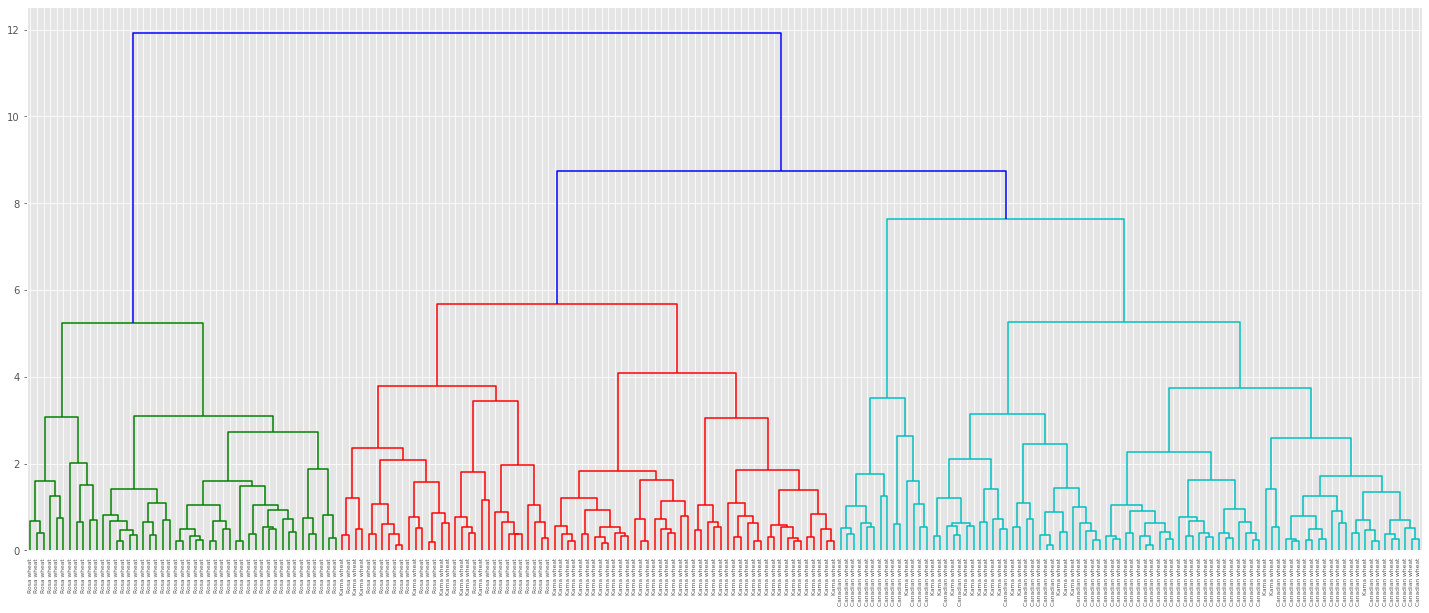

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Linking the samples
mergings = linkage(y=grains, method='complete')

# Making a Dendrogram
plt.figure(figsize=(25,10))
dendrogram(Z=mergings, labels=target_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

There are different methods that can be used while performing hierarchical clustering. Available options are:
- `single`
- `complete`
- `average`
- `weighted`
- `centroid`
- `median`
- `ward`  
Details about different methods is available in the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

### Example 2
We'll perform hierarchical clustering of the companies based on their stock prices.

Note, SciPy hierarchical clustering doesn't fit into a sklearn `pipeline`, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`

In [25]:
import pandas as pd

movements = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv")
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,

In [26]:
# Setting aside the target variable (first column) from the DataFrame
companies = movements.iloc[:, 0]
movements = movements.iloc[:, 1:]

In [27]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage

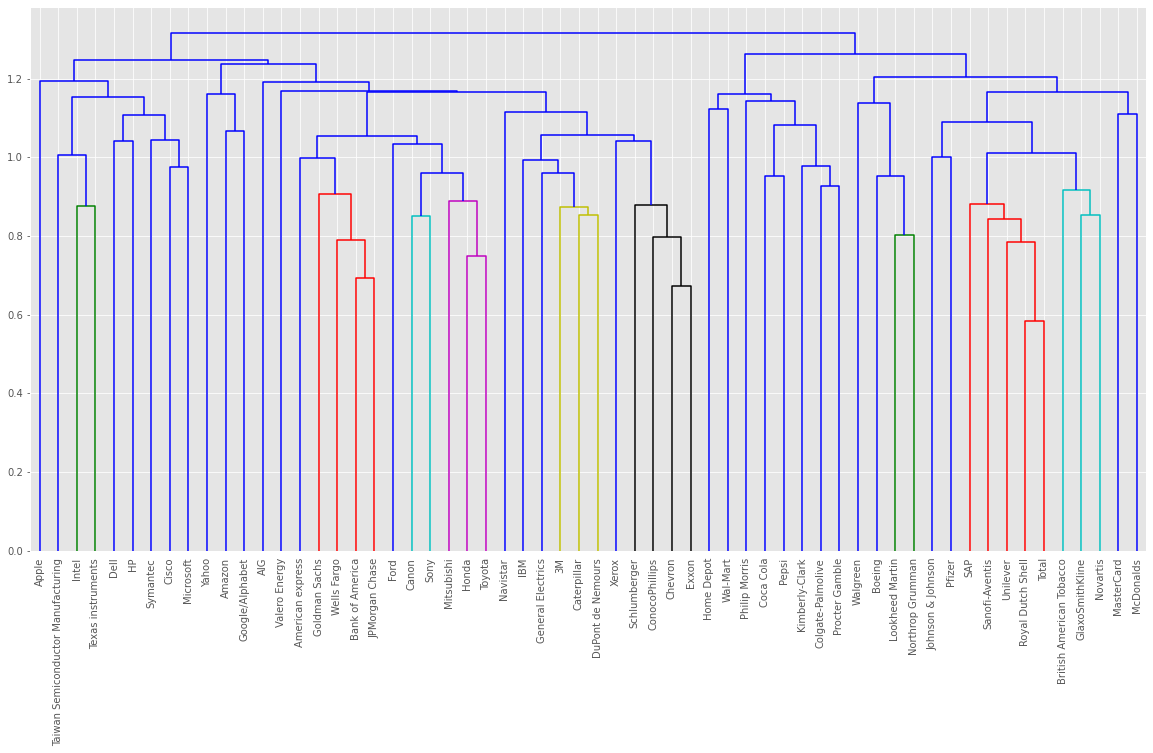

In [28]:
# Normalize the movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(mergings, labels=list(companies), leaf_rotation=90, leaf_font_size=10)
plt.show()

---

## Cluster labels in hierarchical clustering

[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch2_2.mp4)
- Hierarchical clustering is not just a visualization tool
- Cluster labels at intermediate stages can also be recovered. These cluster labels from intermediate stages can then be used for further computations such as cross-tabulations

### Intermediate clustering and height on Dendrogram
- Depending on the max. number of clusters we want, We choose a height on the dendrogram (by drawing a horizontal line). A Dendrogram has a lot of clusters at the bottom and as we move up, these clusters merge together to form bigger (and lesser) clusters. So, higher this line is on the dendrogram, we are restricting the max. no. of clusters to a smaller number.
![Height on dendrogram](https://www.researchgate.net/profile/M_Amin_Alizadeh-Khameneh/publication/285593710/figure/fig2/AS:302897502933004@1449227800844/The-Dendrogram-and-its-components.png)

- The y-axis on a Dendrogram denotes the distance between the merging clusters. (Height on dendrogram = dist. between merging clusters)
- By drawing that horizontal line, we inform that we do not want merger of clusters further apart than this

## Distance between two clusters
- Measured using the **linkage** method
- **`linkage = 'complete'`** => Distance between clusters is max. distance between their samples. Several linkage methods are available. Different linkage methods give different hierarchical clusters.
-  In **complete linkage**, the distance between clusters is the distance between the furthest points of the clusters. 
- In **single linkage**, the distance between clusters is the distance between the closest points of the clusters.

## Extracting cluster labels using `fcluster()`
- Cluster labels for intermediate stages can be extracted using the **`fluster()`** method. It returns a Numpy array of cluster labels

In [29]:
# Getting the seeds dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

--2020-07-07 02:45:07--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.139, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:45:07--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

In [30]:
import pandas as pd
from matplotlib import pyplot as plt

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

grains.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [31]:
# Removing the target column from the DataFrame and storing in another variable
target = grains['target']
grains = grains.drop('target', axis=1)

Performing linkage as done previously...

In [32]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(grains, method='complete')

In [33]:
# Importing fcluster from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

# fcluster is used to generate intermediate labels. We'll specify the max. cluster height as 6.
labels = fcluster(mergings, t=6, criterion='distance')

# Creating a DataFrame with labels and target
df = pd.DataFrame({'labels':labels, 'target_names':target_names})

# Creating a cross tabulation between labels and target
ct = pd.crosstab(df['labels'], df['target_names'])
print(ct)

target_names  Canadian wheat  Kama wheat  Rosa wheat
labels                                              
1                          0           0          47
2                          0          52          23
3                         13           1           0
4                         57          17           0


---
## t-SNE for 2-dimensional maps
- 't-SNE' stands for **t-distribution stochastic neighbour embedding**
- PURPOSE: Maps samples from high dimensional space to 2D (or 3D) so that we can visualize them
- The mapping approximately preserves the distances between the samples

### t-SNE on IRIS dataset
The iris dataset is in 4-dimensional space, as it has 4 features- 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)'

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()

# IRIS dataset has 4 features
print(iris['feature_names'])

# Printing top-5 rows to preview the data
print(iris['data'][:5, :])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


t-SNE can map this dataset to a 2-dimensional space.

t-SNE was given no information of the 3 different iris species, however, if we plot the species with 3 different colors, 3 clusters appear to emerge.

In [35]:
# IRIS dataset
samples = iris['data'] # 2-dimensional Numpy array

# printing the shape of samples
print(samples.shape)

# List that has the actual species of each sample
species = iris['target'] # List of {0,1,2} denoting actual species labels

# Printing the shape
print(species.shape)

(150, 4)
(150,)


### t-SNE in sklearn
`TSNE` is to be imported from `sklearn.manifold`

(150, 2)


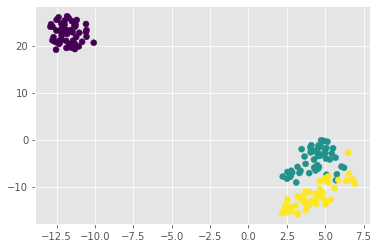

In [36]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

# Creating the model
model = TSNE(learning_rate=100)

# Applying the fit_transform method to the samples
transformed = model.fit_transform(samples)
print(transformed.shape) # Has same # of rows as dataset. For every observation, it has compressed multiple dimensions into just 2 so that it can be visualized on a scatter plot

xs = transformed[:, 0]
ys = transformed[:, 1]

# Plotting the scatter chart
plt.scatter(xs, ys, c=species)
plt.show()

- t-SNE only has `fit_transform()` method unlike other transformations that have both- `fit_transform()` and the duo `fit()` and `transform()`. The `fit_transform()` method simultaneously fits the model and transforms the data.
- t-SNE does not have separate `fit()` and `transform()` methods. This means that you cannot extend the mapping to new samples. We'll have to start again as new samples come in.

#### t-SNE Learning Rate
- Hyperparameter that is chosen by trial and error. Try values between 50 and 200.
- A bad choice will result in different samples being bunched together

#### Interpretation of t-SNE plot
- Axis of a t-SNE plot does not have any interpretable meaning. In fact, the plot is different every time t-SNE is applied. However, the points would have the same position relative to one another.

### t-SNE on the grain dataset

In [37]:
# Getting the dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

--2020-07-07 02:45:11--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.139, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:45:12--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

In [38]:
import pandas as pd
import numpy as np

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

# Creating training set by removing the 'target' column from the grains DataFrame
target = grains['target']
samples = grains.drop('target', axis=1).to_numpy()

**Importing `TSNE` from `sklearn.manifold`**

In [39]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

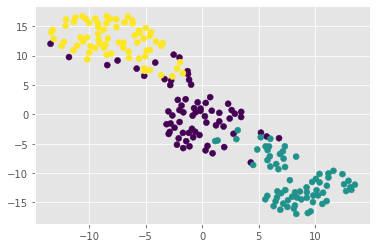

In [40]:
# Creating the model with learning_rate of 200
model = TSNE(learning_rate=200)

# Fitting and transforming the samples
tsne_features = model.fit_transform(samples)

# Plotting t-SNE
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

plt.scatter(xs, ys, c=target)
plt.show()

As we can see, the t-SNE visualization manages to separate the 3 varieties of grain samples.

### t-SNE on the stock dataset

In [41]:
import pandas as pd

movements = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv")
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,

In [42]:
# Removing the first column from the DataFrame as it is the target variable
companies = movements.iloc[:, 0]
movements = movements.iloc[:, 1:]

The stock prices of different companies vary a lot with respect to each other. So, we'll **normalize** the movements before creating t-SNE

In [43]:
from sklearn.preprocessing import normalize

normalized_movements = normalize(movements)

**Importing `TSNE` from `sklearn.manifold`**

In [44]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

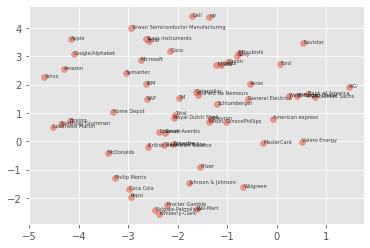

In [45]:
# Creating the TSNE model with learning rate of 50
model = TSNE(learning_rate=50)

# Fitting the data
tsne_features = model.fit_transform(normalized_movements)

# Extracting the 2D tsne features
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

plt.scatter(xs, ys, alpha=0.5)

# Annotating the plot
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

---
---

# Part-3 Visualizing the PCA transformation
[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch3_1.mp4)

## Dimensionality Reduction
- Dimensionality reduction finds patters in the data and uses these patterns to express the dataset in a smaller, compressed form
- Makes subsequent storage and computations much more efficient
- Removes the less-imformative/important "noisy" features that significantly improve regression and classification tasks

## Principal Component Analysis (PCA)
- Fundamental dimensionality reduction technique. It does so in 2 steps:  
1)  Decorrelation (Dimensions remain same as original in this step)  
2) Reduce dimensions
- PCA first rotates the data samples so that they align with the coordinate axes. 
- It also shifts the samples so that they have a zero mean.
- No information is lost no matter how many features the dataset has
- Principal components are the **directions along which the the data varies**.

### PCA in scikit learn
- Present in **`sklearn.decomposition`** module
- scikit learn has PCA implementation just like `StandardScaler` or `KMeans` with the `fit()` and `transform()` methods.
- The `fit()` method learns how to shift and rotate the samples, but doesn't change them
- `transform()` method applies the transformation that `fit()` learnt. `transform()` method can be applied to new unseen samples

### PCA on `grains` dataset

In [46]:
# Getting the dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

--2020-07-07 02:45:17--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.101, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:45:17--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

grains.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


To calculate **Pearson's correlation**, we'll use **`pearsonr`** from **`scipy.stats`**

In [48]:
from scipy.stats import pearsonr

We'll calculate the correlation between **`Length of Kernel`** and **`Width of Kernel`**

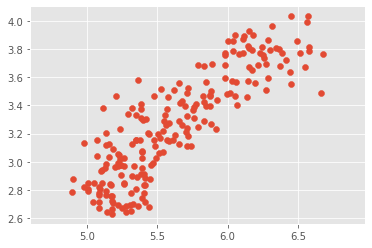

>> Pearson's R between length and width= 0.8604149377143466


In [49]:
length = grains['Length of kernel'].to_numpy()
width = grains['Width of kernel'].to_numpy()

# Plotting a scatter plot between length and width
plt.figure()
plt.scatter(length, width)
plt.axis('equal')
plt.show()

# Calculating the correlation between them
correlation, pvalue = pearsonr(length, width)
print(">> Pearson's R between length and width=", correlation)

As you would expect, the width and length of the grain samples are highly correlated.

### Decorrelating the `grain` measurements with PCA
 We know that the length and width of grain samples are highly correlated. Next, we'll use PCA to **decorrelate** these measurements, then plot the decorrelated points and measure their Pearson correlation. This time, the value of Pearson correlation should be relatively closer to 0.

In [50]:
# extracting out length and width of grains into a separate 2D Numpy array
samples = grains[["Length of kernel", "Width of kernel"]].to_numpy()

# Viewing top 5 rows
samples[:5, :]

array([[5.763, 3.312],
       [5.554, 3.333],
       [5.291, 3.337],
       [5.324, 3.379],
       [5.658, 3.562]])

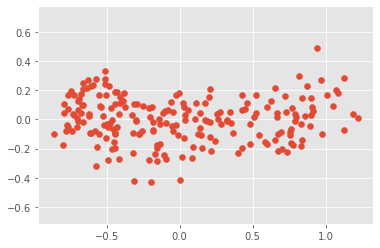

>> Pearson R after decorrelation using PCA: 3.61039323437673e-17


In [51]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Creating the model
model = PCA()

# Performing PCA on this dataset to decorrelate the length and width
pca_features = model.fit_transform(samples)

# Plotting a scatterplot again. This time, the values should appear decorrelated
xs = pca_features[:, 0]
ys = pca_features[:, 1]
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculating Pearson's correlation now
correlation, pvalue = pearsonr(xs, ys)
print(">> Pearson R after decorrelation using PCA:", correlation)

## Intrinsic Dimension
[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch3_2.mp4)

To understand intrinsic dimension, consider this example.
Let's say we have a dataset of two columns- `Latitude` and `Longitude` which let's say represent the GPS coordinates of an airplane.
<table align='left'>
  <tr><td><b>Latitude</b></td><td><b>Longitude</b></td></tr>
  <tr><td>50.529</td><td>41.513</td></tr>
  <tr><td>50.360</td><td>41.672</td></tr>
  <tr><td>50.195</td><td>41.835</td></tr>
  <tr><td>.</td><td>.</td></tr>
  <tr><td>.</td><td>.</td></tr>
</table>
</br></br></br></br></br></br></br>

- This dataset is 2-dimensional as it has 2 columns
- But can approximate using 1 feature- distplacement along flight path
- So intrinsically, the dataset is only 1-dimensional

**INTRINSIC DIMENSION** = Number of features needed to approximate the dataset
- Helps in reducing dimesions of datasets
- What is the most compact representation of the samples?
- Can be detected using **PCA**

### PCA identifies intrinsic dimensions
- Scatterplots work only when samples have 2 or 3 features
- So, to make scatterplots with samples of higher dimensions, we use PCA first
- PCA helps in identifying intrinsic dimension when samples have *any* # of features
> **Intrinsic dimension = # of PCA features with significant variance**

![PCA variance](https://miro.medium.com/max/1728/1*pJKqwWwDnzWaqGFdlqrC2g.png)
- Y-axis denotes variance and X-Axis denotes PCA features
- PCA features with low variance are less important
- In our example, only 3 features have significant variance. So for this datatset, the intrinsic dimension = 3
- Intrinsic dimension is only an idealization. There is not one correct answer. In our example, we can argue that instead of 3 PCA features, 4 features have significant variance depending on the threshold we choose.

### The first principal component
The first principal component of the data is the direction in which the data varies the most. Now, we'll use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

In [52]:
# Getting the dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk' -O seeds.csv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

grains = pd.read_csv("seeds.csv",
            names=['Area','Perimeter','Compactness','Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'target'])

target_names = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

grains.head()

--2020-07-07 02:45:20--  https://docs.google.com/uc?export=download&id=19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.100, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download [following]
--2020-07-07 02:45:20--  https://doc-08-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnfup01mbrtif16a6ricp6j7ldlkq3ic/1594089900000/01929766107003216621/*/19oiV8B3FZGPLT_qXufEBJVQQc5Hk3Vnk?e=download
Resolving doc-08-c8-docs.googleusercontent.com (doc-08-c8-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-c8-docs.googleusercontent.com (doc-08

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [53]:
# extracting out length and width of grains into a separate 2D Numpy array
samples = grains[["Length of kernel", "Width of kernel"]].to_numpy()

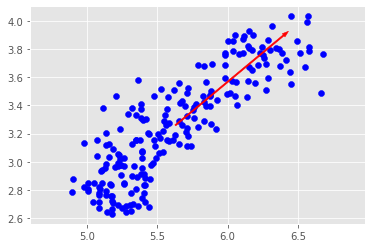

In [54]:
from sklearn.decomposition import PCA

# Scatterplot of length and width of samples
plt.scatter(samples[:,0], samples[:,1], color='blue')

# Creating the PCA model
model = PCA()

# Fitting the grains data
model.fit(samples)

# Getting the mean of the grain samples
mean = model.mean_

# Getting the first principal component
first_pc = model.components_[:, 0]

# Plotting first_pc as an arrow starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

NOTE: the arrow represents the direction in which the grain data varies the most.

### PCA on `fish` dataset

In [55]:
import pandas as pd

fish = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv",
                   names = ['species', 'weight', 'length1', 'length2', 'length3', 'height%', 'width%'])
fish.head()

,species,weight,length1,length2,length3,height%,width%
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Removing the species column and creating 2-D Numpy of fish dataset
samples = fish.drop('species', axis=1).to_numpy()
samples[:5, :]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

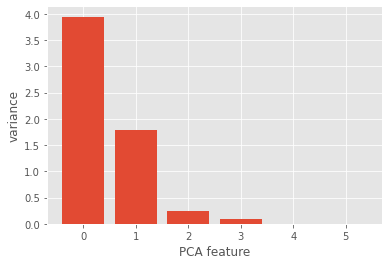

In [57]:
# Creating an instance of scaler
scaler = StandardScaler()

# Creating an instance of PCA
pca = PCA()

# Setting up sklearn pipeline
pipeline = make_pipeline(scaler, pca)

# Fitting the dataset (scaling and PCA)
pipeline.fit(samples)

# Extract the number of components used and their explained variance
features = range(pca.n_components_)
explained_variance = pca.explained_variance_

# Plotting the explained variances
plt.bar(features, explained_variance)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

It looks like PCA features 0 and 1 have significant variance.

We know the intrinsic dimension is the number of PCA features with significant variance.
 
So the reasonable choice for the "intrinsic dimension" of the the fish measurements is 2.


**NOTE the usage of explained_variance_. n_components_, components_ and mean_ attributes available in the instance of PCA class**

## Dimension reduction with PCA
[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch3_3.mp4)

- Dimension reduction helps in representing same data but using less features
- Can be performed using PCA
- PCA features are in decreasing order of variance
- PCA performs dimension reduction by discarding features with low variance which it assumes to be 'noise', and retains the high variance PCA features, which it assumes to be 'informative'
- While performig dimension reduction using PCA we need to specify how many features to keep (Eg. `n_components=2` keeps only first two features)
- A good choice of n_components is the intrinsic dimensions of dataset

**NOTE:**
- PCA assumes that features with low variance are less important. This may/may not be always true. For example, it is not true in the case of ***word frequency arrays***. But what is a word frequency array?

### Word frequency array
- Each row represents a document and column represents a word from a fixed vocabulary
- Entries measure presence of each word in each document.
- In this case, in any given document, only a very few words from vocabulary would be present. So the values appearing in the word frequency array would be 0. Implies, the array would be **'SPARSE'** (meaning, array which has most values as 0).
- Sparse matrices are usually represented using **`scipy.sparse.csr_matrix`** instead of Numpy array
- **csr_matrix** saves space by remembering only the non-zero entries

### Sklearn csr matrices
- Scikit-learn PCA **does not** support **csr_matrix**
- Use sklearn **TruncatedSVD** instead
- **TruncatedSVD** performs the same transformation as PCA, but requires csr_matrix as input

### Dimension reduction of the fish measurements
In a previous exercise, we saw that `2` was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now we use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [58]:
import pandas as pd

fish = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv",
                   names = ['species', 'weight', 'length1', 'length2', 'length3', 'height%', 'width%'])
fish.head()

,species,weight,length1,length2,length3,height%,width%
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Removing the species column and creating 2-D Numpy of fish dataset
samples = fish.drop('species', axis=1).to_numpy()
samples[:5, :]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

In [60]:
# We'll use the scaled samples for this
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [61]:
pca = PCA(n_components=2) # We need only 2 dimensions with max. variance

# Fitting the PCA instance on scaled samples
pca.fit(scaled_samples)

# Transform the scaled problems
pca_features = pca.transform(scaled_samples)

print(pca_features.shape)

(85, 2)


**NOTE:** The shape of the dataset has changed from (85,6) to (85,2). We have reduced dimensionality from 6 to 2. We have successfully performed dimensionality reduction from 6 dimensions to 2 dimensions.


---



---



## A tf-idf word-frequency array
In this exercise, we'll create a tf-idf word frequency array for a toy collection of documents. For this, use the **TfidfVectorizer** from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a **csr_matrix**. It has **`fit()`** and **`transform()`** methods like other sklearn objects.

In [62]:
# Defining documents with example text for performing TF-IDF
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

**Importing `TfidfVectorizer` from `sklearn.feature_extraction.text`**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
# Instantiating TfidfVectorizer
tfidf = TfidfVectorizer()

# Applying fit_transform to document
csr_mat = tfidf.fit_transform(documents)

# Printing the csr_matrix after converting it to array
print(csr_mat.toarray())

# The columns of the array correspond to words from vocabulary
# Getting the list of words by calling the .get_feature_names() method of tfidf
words = tfidf.get_feature_names()

# Printing words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


---
## Clustering words in a Wikipedia article
TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

In [65]:
!wget --no-check-certificate 'https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip' -O Wikipedia_articles.zip
!unzip Wikipedia_articles.zip

--2020-07-07 02:45:24--  https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.81, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K)
Saving to: ‘Wikipedia_articles.zip’

Wikipedia_articles. 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2020-07-07 02:45:24 (4.51 MB/s) - ‘Wikipedia_articles.zip’ saved [473831/473831]

Archive:  Wikipedia_articles.zip
   creating: Wikipedia articles/
  inflating: Wikipedia articles/preprocessing.md  
  inflating: Wikipedia articles/wikipedia-vectors.csv  
  inflating: Wikipedia articles/wikipedia-vocabulary-utf8.txt  


In [66]:
import pandas as pd
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv')
df.head()

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,Global warming,Nationally Appropriate Mitigation Action,Nigel Lawson,Connie Hedegaard,Climate change,Kyoto Protocol,350.org,Greenhouse gas emissions by the United States,2010 United Nations Climate Change Conference,2007 United Nations Climate Change Conference,Angelina Jolie,Michael Fassbender,Denzel Washington,Catherine Zeta-Jones,Jessica Biel,Russell Crowe,Mila Kunis,Dakota Fanning,Anne Hathaway,Jennifer Aniston,France national football team,Cristiano Ronaldo,Arsenal F.C.,Radamel Falcao,Zlatan Ibrahimović,Colombia national football team,2014 FIFA World Cup qualification,Football,Neymar,Franck Ribéry,Tonsillitis,Hepatitis B,Doxycycline,Leukemia,Gout,Hepatitis C,Prednisone,Fever,Gabapentin,Lymphoma,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017294,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007054,0.006915,0.0,0.014745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020774,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


We don't need the first column. Also, we require the DataFrame as a transpose of what it is right now.

In [67]:
df = df.iloc[:, 1:].transpose()
titles = df.index.values
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13085,13086,13087,13088,13089,13090,13091,13092,13093,13094,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.024688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023937,0.021090,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029698,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.011713,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.035588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004002,0.001763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004242,0.0,0.0,0.0,0.0,0.0,0.011774,0.0,0.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011594,0.000000,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002933,0.000000,0.003245,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.005073,0.0,0.001239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Google Search,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007797,0.003435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008264,0.0,0.0,0.0,0.0,0.0,0.006881,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007456,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.012875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006649,0.0


Converting this DataFrame to Sparse matrix

In [68]:
from scipy.sparse import csr_matrix
articles = csr_matrix(df)

In [69]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

We know, `TruncatedSVD` is able to perform PCA on sparse arrays in `csr_matrix` format, such as word-frequency arrays. We'll use our knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. We'll first build a pipeline, and then apply it to the word-frequency array of some Wikipedia articles.

In [70]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

# Creating TruncatedSVD instance
svd = TruncatedSVD(n_components=50)

# Creating KMeans instance
kmeans = KMeans(n_clusters=6)

# Making sklearn pipeline
pipeline = make_pipeline(svd, kmeans)

To summarize, we'll first perform TruncatedSVD on the sparse matrix representing articles from Wikipedia to perform dimensionality reduction, and then use KMeans to cluster the articles.

In [71]:
pipeline.fit(articles)

labels = pipeline.predict(articles)

# Creating a DataFrame aligning the labels and titles
df = pd.DataFrame({'labels':labels, 'article':titles})

# Printing the Dataframe sorted by labels
print(df.sort_values('labels'))

    labels                                        article
40       0                                    Tonsillitis
42       0                                    Doxycycline
43       0                                       Leukemia
44       0                                           Gout
45       0                                    Hepatitis C
46       0                                     Prednisone
47       0                                          Fever
48       0                                     Gabapentin
41       0                                    Hepatitis B
49       0                                       Lymphoma
22       1                              Denzel Washington
23       1                           Catherine Zeta-Jones
24       1                                   Jessica Biel
25       1                                  Russell Crowe
26       1                                     Mila Kunis
27       1                                 Dakota Fanning
28       1    

 Take a look at the cluster labels and see if you can identify any patterns!
 

---



---



# Part-4 Non-negative Matrix Factorization (NMF)
> [VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch4_1.mp4)  
[SLIDES](https://s3.amazonaws.com/assets.datacamp.com/production/course_3161/slides/ch4_slides.pdf)

## What is NMF?
- Like PCA, NMF is also a **dimensionality reduction technique**
- Unlike PCA, NMF models are **interpretable**. This means that NMF models are easier to understand and explain to others.
- NMF **cannot** be applied to any dataset however. It requires that all the sample features should be **non-negative (>=0)**.
- NMF achieves interpretability by decomposing samples as sums of their parts. For example, NMF decomposes documents as combination of different themes (or topics). It can decompose images as combination of common patterns.

## NMF in scikit-learn
- NMF is available in `sklearn` and follows the same **`.fit()`** and **`.transform()`** pattern as PCA.
- However, unlike PCA, the desired number of components **`n_components`** must always be specified.
- NMF works with both numpy arrays and sparse arrays in **csr_matrix** format

### Example usage
Let's say `samples` is the word frequency array obtained by TF-IDF
``` Python
from sklearn.decomposition import NMF

# Creating a model
model = NMF(n_components=2)

# Fitting the data
model.fit(samples)

# Transforming the data
nmf_features = model.transform(samples)

# Just like in PCA, NMF has components that it learns from the samples
print(model.components_)

# NMF features are non-negative
print(nmf_features)
```
- Just like PCA, **dimension of components = dimension of samples**
- Entries in the NMF components array are always non-negative
- NMF feature values are non-negative as well

## Sample reconstruction
- The features and components of an NMF model can be combined to approximately reconstruct the original data samples
- To reconstruct, multiply components and feature values and add up. Can be done using rules of matrix multiplication


## NMF fits to non-negative data only
- All array entries must be >= 0
- Examples where NMF can be used:
  - Word frequencies in each document
  - Images encoded as arrays
  - Audio spectrograms
  - Purchase history on ecommerce websites etc.


## NMF applied to Wikipedia articles
We'll apply NMF to the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. We'll fit the model, transform the articles, and then explore the results.

In [72]:
!wget -q -N --no-check-certificate 'https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip' -O Wikipedia_articles.zip
!unzip Wikipedia_articles.zip

--2020-07-07 02:45:30--  https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.82, 13.226.45.81, 13.226.45.22, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K)
Saving to: ‘Wikipedia_articles.zip’

Wikipedia_articles. 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2020-07-07 02:45:30 (4.19 MB/s) - ‘Wikipedia_articles.zip’ saved [473831/473831]

Archive:  Wikipedia_articles.zip
replace Wikipedia articles/preprocessing.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [73]:
import pandas as pd
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv')

# Removing the first column, transposing
df = df.iloc[:, 1:].transpose()
titles = df.index.values

# converting the dataframe to csr_matrix
from scipy.sparse import csr_matrix
articles = csr_matrix(df)

articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

Now that we have our Wikipedia articles dataset as a sparse matric in csr_matrix format, we'll start applying NMF.

In [74]:
from sklearn.decomposition import NMF

model = NMF(n_components=6) # Compulsory to specify n_components unlike PCA

model.fit(articles)

nmf_features = model.transform(articles)

print(nmf_features) # It'll have 6 columns because n_components=6

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40451343e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66587109e-01]
 [3.82065800e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98633719e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81727584e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85502234e-01]
 [1.29292656e-02 1.37884153e-02 7.76341255e-03 3.34429214e-02
  0.00000000e+00 3.34511546e-01]
 [0.00000000e+00 0.00000000e+00 2.06746630e-02 0.00000000e+00
  6.04341111e-03 3.59049531e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90961681e-01]
 [1.54276627e-02 1.42811767e-02 3.76643584e-03 2.37071522e-02
  2.62556211e-02 4.80759059e-01]
 [1.11740222e-02 3.13665119e-02 3.09491840e-02 6.56887216e-02
  1.96629082e-02 3.38278261e-01]
 [0.00000000e+00 0.00000000e+00 5.30729781e-01 0.0

These NMF features don't make much sense at this point, but we'll will explore them next.

In [75]:
import pandas as pd

# Creating a DataFrame of nmf_features printed above, with index as the titles
df = pd.DataFrame(nmf_features, index=titles)

# Printing the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Printing the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575612
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422308
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


**Interpretation:** Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

## NMF learns interpretable parts
[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch4_2.mp4)

### NMF components for documents
- If NMF is applied to documents (example of word arrays in articles), the components represent 'topics' or 'themes' about the articles
- NMF features reconstruct the documents from the topics

### NMF applied to a collection of images
- NMF components represent patterns that frequently occur in the images
- For applying NMF, the only condition is that the samples should be non-negative.
- So, grayscale images can be represented by values between 0 and 1 (0 is black)
- We can read a 2D grayscale image as a flattened 1-row array. So a collection of images of same size can be encoded as a 2D array, where each row represents a flattened image

### NMF learns topics of documents
When NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. We'll verify this the NMF model that we built earlier using the Wikipedia articles. Previously, we saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. Now, we'll identify the topic of the corresponding NMF component.

The NMF model we built earlier is available as `model`, while `words` is a list of the words that label the columns of the word-frequency array.

In [76]:
words = ['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbas', 'abbey', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abdominal', 'abdul', 'abel', 'abilities', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolition', 'aboriginal', 'abortion', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstract', 'abstraction', 'absurd', 'abu', 'abundance', 'abundant', 'abuse', 'abused', 'abuses', 'abusive', 'academia', 'academic', 'academics', 'academies', 'academy', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessing', 'accession', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclaim', 'acclaimed', 'accolades', 'accommodate', 'accompanied', 'accompaniment', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accredited', 'accumulate', 'accumulated', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accusation', 'accusations', 'accused', 'accusing', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'acid', 'acidic', 'acids', 'acknowledge', 'acknowledged', 'acknowledges', 'acknowledging', 'acoustic', 'acquaintance', 'acquainted', 'acquire', 'acquired', 'acquiring', 'acquisition', 'acquisitions', 'acquitted', 'acre', 'acres', 'acronym', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'activated', 'activates', 'activation', 'active', 'actively', 'activism', 'activist', 'activists', 'activities', 'activity', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'acute', 'adam', 'adams', 'adapt', 'adaptation', 'adaptations', 'adapted', 'adapting', 'adaption', 'adaptive', 'add', 'added', 'addicted', 'addiction', 'adding', 'addition', 'additional', 'additionally', 'additions', 'additive', 'address', 'addressed', 'addresses', 'addressing', 'adds', 'adept', 'adequate', 'adequately', 'adhere', 'adhered', 'adherence', 'adherents', 'adjacent', 'adjective', 'adjoining', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjustments', 'administer', 'administered', 'administering', 'administration', 'administrations', 'administrative', 'administrator', 'administrators', 'admiral', 'admiration', 'admired', 'admission', 'admissions', 'admit', 'admits', 'admitted', 'admitting', 'adolescence', 'adolescent', 'adolescents', 'adolf', 'adopt', 'adopted', 'adopting', 'adoption', 'adrian', 'ads', 'adult', 'adultery', 'adulthood', 'adults', 'advance', 'advanced', 'advancement', 'advances', 'advancing', 'advantage', 'advantageous', 'advantages', 'advent', 'adventure', 'adventures', 'adversary', 'adverse', 'adversely', 'advertise', 'advertised', 'advertisement', 'advertisements', 'advertising', 'advice', 'advise', 'advised', 'adviser', 'advisers', 'advises', 'advising', 'advisor', 'advisors', 'advisory', 'advocacy', 'advocate', 'advocated', 'advocates', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'aesthetics', 'affair', 'affairs', 'affect', 'affected', 'affecting', 'affection', 'affects', 'affiliate', 'affiliated', 'affiliates', 'affiliation', 'affinity', 'affirmative', 'affirmed', 'afflicted', 'affluent', 'afford', 'affordable', 'afforded', 'afghan', 'afghanistan', 'aforementioned', 'afraid', 'africa', 'african', 'africans', 'afro', 'afterlife', 'aftermath', 'afternoon', 'afterward', 'age', 'aged', 'agencies', 'agency', 'agenda', 'agent', 'agents', 'ages', 'aggravated', 'aggregate', 'aggregator', 'aggression', 'aggressive', 'aggressively', 'aging', 'agitation', 'agnostic', 'ago', 'agrarian', 'agree', 'agreed', 'agreeing', 'agreement', 'agreements', 'agrees', 'agricultural', 'agriculture', 'ahead', 'ahmad', 'ahmed', 'aid', 'aide', 'aided', 'aides', 'aiding', 'aids', 'ailments', 'aim', 'aimed', 'aiming', 'aims', 'ain', 'air', 'airborne', 'aircraft', 'aired', 'airing', 'airline', 'airlines', 'airplane', 'airplanes', 'airplay', 'airport', 'airports', 'airs', 'airways', 'ajax', 'aka', 'akin', 'alabama', 'alan', 'alarm', 'alaska', 'albania', 'albeit', 'albert', 'alberto', 'album', 'albums', 'alcohol', 'alcoholic', 'alcoholism', 'alec', 'alert', 'alex', 'alexander', 'alexandra', 'alexandre', 'alexandria', 'alexis', 'alfred', 'algae', 'algeria', 'algorithm', 'algorithms', 'ali', 'alias', 'alice', 'alicia', 'alien', 'alienated', 'alienation', 'aliens', 'align', 'aligned', 'alignment', 'alike', 'alive', 'allan', 'allegation', 'allegations', 'alleged', 'allegedly', 'allegiance', 'alleging', 'allegory', 'allen', 'allergic', 'alleviate', 'alley', 'alliance', 'alliances', 'allied', 'allies', 'allmusic', 'allocated', 'allocation', 'allow', 'allowance', 'allowed', 'allowing', 'allows', 'alloy', 'allusions', 'ally', 'alma', 'alongside', 'alpha', 'alphabet', 'alpine', 'alps', 'alt', 'altar', 'alter', 'alteration', 'alterations', 'altercation', 'altered', 'altering', 'alternate', 'alternately', 'alternating', 'alternative', 'alternatively', 'alternatives', 'altitude', 'altitudes', 'alto', 'altogether', 'aluminium', 'aluminum', 'alumni', 'amanda', 'amassed', 'amateur', 'amazing', 'amazon', 'ambassador', 'ambassadors', 'amber', 'ambient', 'ambiguity', 'ambiguous', 'ambition', 'ambitions', 'ambitious', 'ambulance', 'ambush', 'ambushed', 'amended', 'amendment', 'amendments', 'america', 'american', 'americans', 'americas', 'amid', 'amidst', 'amino', 'ammonia', 'ammunition', 'amnesty', 'amounted', 'amounting', 'amounts', 'amphibians', 'ample', 'amplification', 'amsterdam', 'amusement', 'amy', 'ana', 'anal', 'analog', 'analogous', 'analogue', 'analogy', 'analyses', 'analysis', 'analyst', 'analysts', 'analytical', 'analyze', 'analyzed', 'analyzing', 'anarchy', 'anatolia', 'anatomical', 'anatomy', 'ancestor', 'ancestors', 'ancestral', 'ancestry', 'anchor', 'anchored', 'ancient', 'anderson', 'andr', 'andrea', 'andrew', 'andrews', 'android', 'andy', 'anemia', 'angel', 'angela', 'angeles', 'angelo', 'angels', 'anger', 'angered', 'angle', 'angles', 'anglican', 'anglo', 'angola', 'angrily', 'angry', 'angular', 'animal', 'animals', 'animated', 'animation', 'anime', 'animosity', 'ankle', 'ann', 'anna', 'anne', 'annex', 'annexation', 'annexed', 'annie', 'anniversary', 'announce', 'announced', 'announcement', 'announcements', 'announcing', 'annual', 'annually', 'anonymous', 'anonymously', 'answer', 'answered', 'answering', 'answers', 'ant', 'antagonist', 'antagonists', 'antarctic', 'antarctica', 'anterior', 'anthem', 'anthology', 'anthony', 'anthropogenic', 'anthropologist', 'anthropology', 'anti', 'antibiotics', 'antibodies', 'anticipated', 'anticipation', 'antics', 'antiquity', 'antoine', 'anton', 'antonio', 'anus', 'anxiety', 'anxious', 'anybody', 'anymore', 'apache', 'apart', 'apartheid', 'apartment', 'apartments', 'apex', 'api', 'apocalypse', 'apocalyptic', 'apollo', 'apologize', 'apologized', 'apology', 'app', 'appalled', 'apparatus', 'apparel', 'apparent', 'apparently', 'appeal', 'appealed', 'appealing', 'appeals', 'appear', 'appearance', 'appearances', 'appeared', 'appearing', 'appears', 'appetite', 'applauded', 'applause', 'apple', 'apples', 'applicable', 'applicants', 'application', 'applications', 'applied', 'applies', 'apply', 'applying', 'appoint', 'appointed', 'appointing', 'appointment', 'appointments', 'appoints', 'appreciate', 'appreciated', 'appreciation', 'apprentice', 'approach', 'approached', 'approaches', 'approaching', 'appropriate', 'appropriately', 'approval', 'approve', 'approved', 'approving', 'approximate', 'approximately', 'approximation', 'apps', 'april', 'aquatic', 'arab', 'arabia', 'arabian', 'arabic', 'arable', 'arabs', 'arbitrarily', 'arbitrary', 'arbitration', 'arc', 'arcade', 'arch', 'archaeological', 'archaeologists', 'archaeology', 'archaic', 'archbishop', 'archer', 'archipelago', 'architect', 'architects', 'architectural', 'architecture', 'archive', 'archives', 'arctic', 'area', 'areas', 'aren', 'arena', 'arenas', 'argentina', 'argentine', 'arguably', 'argue', 'argued', 'argues', 'arguing', 'argument', 'arguments', 'arid', 'arise', 'arisen', 'arises', 'arising', 'aristocracy', 'aristocratic', 'aristocrats', 'aristotle', 'arithmetic', 'arizona', 'arkansas', 'arm', 'armed', 'armenia', 'armenian', 'armies', 'armistice', 'armor', 'armored', 'arms', 'armstrong', 'army', 'arnold', 'arose', 'arousal', 'aroused', 'arrange', 'arranged', 'arrangement', 'arrangements', 'arranging', 'array', 'arrest', 'arrested', 'arresting', 'arrests', 'arrival', 'arrivals', 'arrive', 'arrived', 'arrives', 'arriving', 'arrow', 'arrows', 'arsenal', 'art', 'arteries', 'artery', 'arthur', 'article', 'articles', 'articulated', 'artifacts', 'artificial', 'artificially', 'artillery', 'artisans', 'artist', 'artistic', 'artistry', 'artists', 'arts', 'artwork', 'aryan', 'ascended', 'ascertain', 'ascribed', 'ash', 'ashes', 'ashley', 'ashton', 'asia', 'asian', 'asians', 'asiatic', 'aside', 'ask', 'asked', 'asking', 'asks', 'asleep', 'aspect', 'aspects', 'aspirations', 'aspiring', 'ass', 'assassin', 'assassinate', 'assassinated', 'assassination', 'assassinations', 'assassins', 'assault', 'assaulted', 'assaults', 'assemble', 'assembled', 'assemblies', 'assembly', 'assert', 'asserted', 'asserting', 'assertion', 'assertions', 'asserts', 'assess', 'assessed', 'assessing', 'assessment', 'assessments', 'asset', 'assets', 'assign', 'assigned', 'assignment', 'assigns', 'assimilated', 'assimilation', 'assist', 'assistance', 'assistant', 'assistants', 'assisted', 'assisting', 'assists', 'associate', 'associated', 'associates', 'association', 'associations', 'assortment', 'assume', 'assumed', 'assumes', 'assuming', 'assumption', 'assumptions', 'assurance', 'assure', 'assured', 'asteroid', 'asthma', 'astonishing', 'astronaut', 'astronauts', 'astronomer', 'astronomers', 'astronomical', 'astronomy', 'asylum', 'ate', 'atheist', 'atheists', 'athens', 'athlete', 'athletes', 'athletic', 'athletics', 'atlanta', 'atlantic', 'atlas', 'atm', 'atmosphere', 'atmospheric', 'atom', 'atomic', 'atoms', 'atop', 'atp', 'atrocities', 'attach', 'attached', 'attachment', 'attack', 'attacked', 'attackers', 'attacking', 'attacks', 'attain', 'attained', 'attaining', 'attempt', 'attempted', 'attempting', 'attempts', 'attend', 'attendance', 'attendant', 'attended', 'attending', 'attends', 'attention', 'attested', 'attire', 'attitude', 'attitudes', 'attorney', 'attorneys', 'attract', 'attracted', 'attracting', 'attraction', 'attractions', 'attractive', 'attracts', 'attributable', 'attribute', 'attributed', 'attributes', 'attributing', 'atypical', 'auction', 'auctioned', 'audience', 'audiences', 'audio', 'audition', 'auditioned', 'auditioning', 'auditions', 'auditorium', 'augmented', 'august', 'augustine', 'augustus', 'aunt', 'auspices', 'austin', 'australia', 'australian', 'australians', 'austria', 'austrian', 'authentic', 'authentication', 'authenticity', 'author', 'authored', 'authorised', 'authoritarian', 'authorities', 'authority', 'authorization', 'authorized', 'authors', 'authorship', 'autism', 'auto', 'autobiographical', 'autobiography', 'automated', 'automatic', 'automatically', 'automobile', 'automobiles', 'automotive', 'autonomous', 'autonomy', 'autopsy', 'autumn', 'auxiliary', 'availability', 'available', 'avant', 'avatar', 'avenue', 'avenues', 'average', 'averaged', 'averages', 'averaging', 'aviation', 'avid', 'avoid', 'avoidance', 'avoided', 'avoiding', 'avoids', 'awaiting', 'awakening', 'award', 'awarded', 'awards', 'aware', 'awareness', 'away', 'awful', 'awkward', 'axe', 'axis', 'azerbaijan', 'babies', 'baby', 'babylonian', 'bachelor', 'backbone', 'backdrop', 'backed', 'background', 'backgrounds', 'backing', 'backlash', 'backs', 'backstage', 'backup', 'backward', 'backwards', 'bacon', 'bacteria', 'bacterial', 'bacterium', 'bad', 'badge', 'badly', 'bafta', 'bag', 'baghdad', 'bags', 'bah', 'bahamas', 'bail', 'baked', 'baker', 'baking', 'balance', 'balanced', 'balances', 'balancing', 'bald', 'baldwin', 'bali', 'balkans', 'ball', 'ballad', 'ballads', 'ballet', 'ballistic', 'ballot', 'balls', 'baltic', 'baltimore', 'bamboo', 'ban', 'banana', 'band', 'bands', 'bandwidth', 'bang', 'bangalore', 'bangladesh', 'bank', 'banker', 'bankers', 'banking', 'bankrupt', 'bankruptcy', 'banks', 'banned', 'banner', 'banning', 'bans', 'baptised', 'baptism', 'baptist', 'baptized', 'bar', 'barack', 'barbara', 'barcelona', 'bare', 'barely', 'bargaining', 'barley', 'barnes', 'baron', 'baroque', 'barred', 'barrel', 'barrels', 'barrier', 'barriers', 'barry', 'bars', 'basal', 'base', 'baseball', 'based', 'baseline', 'basement', 'bases', 'basic', 'basically', 'basilica', 'basin', 'basins', 'basis', 'basket', 'basketball', 'bass', 'bassist', 'bat', 'batch', 'bath', 'bathing', 'bathroom', 'baths', 'batman', 'battalion', 'batteries', 'battery', 'battle', 'battlefield', 'battles', 'battling', 'bavaria', 'bay', 'bbc', 'bce', 'beach', 'beaches', 'beam', 'bean', 'beans', 'bear', 'beard', 'bearer', 'bearing', 'bears', 'beast', 'beat', 'beaten', 'beating', 'beatles', 'beats', 'beautiful', 'beauty', 'beck', 'bed', 'bedroom', 'beds', 'bee', 'beef', 'beer', 'befriended', 'began', 'begin', 'beginning', 'beginnings', 'begins', 'begun', 'behalf', 'behave', 'behaved', 'behavior', 'behavioral', 'behaviors', 'behaviour', 'behest', 'beijing', 'beings', 'bel', 'belarus', 'belgian', 'belgium', 'belief', 'beliefs', 'believe', 'believed', 'believer', 'believers', 'believes', 'believing', 'bell', 'belle', 'bells', 'belly', 'belong', 'belonged', 'belonging', 'belongs', 'beloved', 'belt', 'belts', 'ben', 'bench', 'bend', 'beneath', 'benedict', 'beneficial', 'benefit', 'benefited', 'benefiting', 'benefits', 'bengal', 'bengali', 'benign', 'benjamin', 'bennett', 'benny', 'bent', 'berkeley', 'berlin', 'bernard', 'berry', 'bertrand', 'besieged', 'best', 'bestowed', 'bestseller', 'bet', 'beta', 'betrayal', 'betrayed', 'better', 'betty', 'beverage', 'beverages', 'beverly', 'beyonc', 'bias', 'biased', 'bible', 'biblical', 'bibliography', 'bicameral', 'bicycle', 'bicycles', 'bid', 'bidding', 'big', 'bigger', 'biggest', 'bike', 'bilateral', 'bilingual', 'billboard', 'billed', 'billing', 'billion', 'billionaire', 'billions', 'bills', 'billy', 'bin', 'binary', 'bind', 'binding', 'binds', 'bing', 'bio', 'biochemical', 'biodiversity', 'biographer', 'biographers', 'biographical', 'biographies', 'biography', 'biological', 'biologically', 'biologist', 'biology', 'biomass', 'biomedical', 'biopic', 'biosphere', 'biotechnology', 'bipolar', 'birch', 'bird', 'birds', 'birmingham', 'birth', 'birthday', 'birthplace', 'births', 'bisexual', 'bishop', 'bishops', 'bit', 'bitch', 'bite', 'bites', 'biting', 'bits', 'bitter', 'bizarre', 'black', 'blacks', 'bladder', 'blade', 'blades', 'blair', 'blake', 'blame', 'blamed', 'blaming', 'blank', 'blast', 'bleeding', 'blend', 'blended', 'blending', 'blessed', 'blessing', 'blind', 'blindness', 'bloc', 'block', 'blockade', 'blockbuster', 'blocked', 'blocking', 'blocks', 'blog', 'blogs', 'blonde', 'blood', 'blooded', 'bloodstream', 'bloody', 'bloom', 'bloomberg', 'blow', 'blowing', 'blown', 'blows', 'blu', 'blue', 'blues', 'blunt', 'blurred', 'board', 'boarded', 'boarding', 'boards', 'boasted', 'boasts', 'boat', 'boats', 'bob', 'bobby', 'bodied', 'bodies', 'bodily', 'body', 'bodyguard', 'boeing', 'bohemian', 'boiled', 'boiling', 'bold', 'bolivia', 'bollywood', 'bolt', 'bomb', 'bombardment', 'bombed', 'bombers', 'bombing', 'bombings', 'bombs', 'bond', 'bonded', 'bonding', 'bonds', 'bone', 'bones', 'bonnie', 'bonus', 'book', 'booked', 'books', 'boom', 'boost', 'boosted', 'boot', 'booth', 'boots', 'border', 'bordered', 'bordering', 'borderline', 'borders', 'bore', 'bored', 'boris', 'born', 'borne', 'borough', 'borrow', 'borrowed', 'borrowing', 'bosnia', 'boss', 'boston', 'botanical', 'bottle', 'bottles', 'bought', 'boulevard', 'bounce', 'bound', 'boundaries', 'boundary', 'bounded', 'bounds', 'bounty', 'bourgeois', 'bout', 'bouts', 'bow', 'bowel', 'bowie', 'bowl', 'bowling', 'box', 'boxer', 'boxes', 'boxing', 'boy', 'boycott', 'boycotted', 'boyfriend', 'boyle', 'boys', 'brad', 'bradley', 'brain', 'brains', 'branch', 'branched', 'branches', 'brand', 'branded', 'branding', 'brandon', 'brands', 'brass', 'brave', 'bravery', 'brawl', 'brazil', 'brazilian', 'breach', 'bread', 'break', 'breakdown', 'breakfast', 'breaking', 'breakout', 'breaks', 'breakthrough', 'breakup', 'breast', 'breasts', 'breath', 'breathe', 'breathing', 'bred', 'breed', 'breeding', 'brian', 'brick', 'bricks', 'bride', 'bridge', 'bridges', 'brief', 'briefly', 'brien', 'brigade', 'bright', 'brighter', 'brilliant', 'bring', 'bringing', 'brings', 'bristol', 'brit', 'britain', 'british', 'britney', 'britons', 'broad', 'broadband', 'broadcast', 'broadcaster', 'broadcasters', 'broadcasting', 'broadcasts', 'broader', 'broadly', 'broadway', 'broke', 'broken', 'bronx', 'bronze', 'brooklyn', 'brooks', 'bros', 'brother', 'brotherhood', 'brothers', 'brought', 'brown', 'browser', 'browsers', 'browsing', 'bruce', 'bruno', 'brush', 'brussels', 'brutal', 'brutality', 'bryan', 'bryant', 'bubble', 'bubbles', 'buchanan', 'bud', 'buddha', 'buddhism', 'buddhist', 'buddhists', 'buddy', 'budget', 'budgets', 'buffalo', 'buffer', 'bug', 'bugs', 'build', 'builder', 'builders', 'building', 'buildings', 'builds', 'built', 'bulb', 'bulgaria', 'bulgarian', 'bulk', 'bull', 'bullet', 'bullets', 'bulls', 'bullying', 'bunch', 'bundled', 'bunny', 'burden', 'bureau', 'bureaucracy', 'burgeoning', 'burial', 'buried', 'burke', 'burma', 'burn', 'burned', 'burning', 'burns', 'burnt', 'burst', 'bursts', 'burton', 'bury', 'bus', 'buses', 'bush', 'busiest', 'business', 'businesses', 'businessman', 'businessmen', 'bust', 'busy', 'butler', 'butter', 'butterfly', 'button', 'buttons', 'buy', 'buyer', 'buyers', 'buying', 'buys', 'buzz', 'bypass', 'byzantine', 'cab', 'cabin', 'cabinet', 'cable', 'cables', 'caesar', 'caf', 'cafe', 'cage', 'cairo', 'cake', 'cakes', 'calcium', 'calculate', 'calculated', 'calculating', 'calculation', 'calculations', 'calendar', 'calf', 'caliber', 'california', 'called', 'calling', 'calls', 'calm', 'calories', 'calvin', 'cam', 'cambodia', 'cambridge', 'came', 'cameo', 'camera', 'cameras', 'cameron', 'camp', 'campaign', 'campaigned', 'campaigning', 'campaigns', 'campbell', 'camps', 'campus', 'campuses', 'canada', 'canadian', 'canadians', 'canal', 'canals', 'cancel', 'canceled', 'cancellation', 'cancelled', 'cancer', 'cancers', 'candidacy', 'candidate', 'candidates', 'candy', 'cane', 'cannabis', 'canned', 'cannes', 'cannon', 'canon', 'canonical', 'cans', 'canterbury', 'canyon', 'cap', 'capabilities', 'capability', 'capable', 'capacities', 'capacity', 'cape', 'capita', 'capital', 'capitalism', 'capitalist', 'capitals', 'capitol', 'capped', 'caps', 'captain', 'captive', 'captivity', 'capture', 'captured', 'captures', 'capturing', 'car', 'carbohydrate', 'carbohydrates', 'carbon', 'card', 'cardiac', 'cardinal', 'cardiovascular', 'cards', 'care', 'cared', 'career', 'careers', 'careful', 'carefully', 'carey', 'cargo', 'caribbean', 'caring', 'carl', 'carlo', 'carlos', 'carnegie', 'carnival', 'carol', 'carolina', 'caroline', 'carpenter', 'carpet', 'carr', 'carriage', 'carried', 'carrier', 'carriers', 'carries', 'carroll', 'carry', 'carrying', 'cars', 'carson', 'carter', 'cartoon', 'cartoonist', 'cartoons', 'carved', 'case', 'cases', 'casey', 'cash', 'casino', 'casket', 'caspian', 'cast', 'caste', 'casting', 'castle', 'castro', 'casts', 'casual', 'casualties', 'casualty', 'cat', 'catalog', 'catalogue', 'catalyst', 'catastrophe', 'catastrophic', 'catch', 'catches', 'catching', 'categories', 'categorized', 'category', 'cater', 'cathedral', 'catherine', 'catholic', 'catholicism', 'catholics', 'cats', 'cattle', 'caucasus', 'caught', 'causal', 'cause', 'caused', 'causes', 'causing', 'caution', 'cautious', 'cavalry', 'cave', 'caves', 'cavity', 'cbs', 'cds', 'cease', 'ceased', 'ceasefire', 'cecil', 'ceded', 'ceiling', 'celebrate', 'celebrated', 'celebrates', 'celebrating', 'celebration', 'celebrations', 'celebrities', 'celebrity', 'celestial', 'cell', 'cells', 'cellular', 'celtic', 'cement', 'cemented', 'cemetery', 'censored', 'censorship', 'census', 'cent', 'centennial', 'center', 'centered', 'centers', 'central', 'centralised', 'centralized', 'centrally', 'centre', 'centred', 'centres', 'centric', 'cents', 'centuries', 'century', 'ceo', 'ceramics', 'cereal', 'cereals', 'cerebral', 'ceremonial', 'ceremonies', 'ceremony', 'certain', 'certainly', 'certainty', 'certificate', 'certificates', 'certification', 'certified', 'cervical', 'cessation', 'cgi', 'chad', 'chain', 'chains', 'chair', 'chaired', 'chairman', 'chairs', 'challenge', 'challenged', 'challenger', 'challenges', 'challenging', 'chamber', 'chamberlain', 'chambers', 'champion', 'championed', 'champions', 'championship', 'championships', 'chan', 'chance', 'chancellor', 'chances', 'chandler', 'change', 'changed', 'changes', 'changing', 'channel', 'channels', 'chaos', 'chaotic', 'chapel', 'chapter', 'chapters', 'character', 'characterised', 'characteristic', 'characteristics', 'characterization', 'characterize', 'characterized', 'characters', 'charcoal', 'charge', 'charged', 'charges', 'charging', 'charisma', 'charismatic', 'charitable', 'charities', 'charity', 'charlemagne', 'charles', 'charleston', 'charlie', 'charlotte', 'charm', 'charming', 'chart', 'charted', 'charter', 'chartered', 'charting', 'charts', 'chase', 'chased', 'chasing', 'chat', 'cheap', 'cheaper', 'cheating', 'check', 'checked', 'checking', 'checks', 'cheek', 'cheese', 'chef', 'chelsea', 'chemical', 'chemically', 'chemicals', 'chemist', 'chemistry', 'chemists', 'chennai', 'cherry', 'chess', 'chest', 'chi', 'chicago', 'chicken', 'chickens', 'chief', 'chiefly', 'chiefs', 'child', 'childbirth', 'childhood', 'children', 'chile', 'chilean', 'chili', 'chin', 'china', 'chinese', 'chip', 'chips', 'chloride', 'chocolate', 'choice', 'choices', 'choir', 'cholera', 'cholesterol', 'choose', 'chooses', 'choosing', 'chopra', 'choreographer', 'chorus', 'chose', 'chosen', 'chris', 'christ', 'christian', 'christianity', 'christians', 'christie', 'christina', 'christine', 'christmas', 'christopher', 'chrome', 'chromosome', 'chromosomes', 'chronic', 'chronicle', 'chronicles', 'chronological', 'chuck', 'church', 'churches', 'churchill', 'cia', 'cigarette', 'cigarettes', 'cincinnati', 'cinema', 'cinemas', 'cinematic', 'circa', 'circle', 'circles', 'circuit', 'circuits', 'circular', 'circulated', 'circulating', 'circulation', 'circumstances', 'circus', 'citation', 'cite', 'cited', 'cites', 'cities', 'citing', 'citizen', 'citizens', 'citizenship', 'city', 'civic', 'civil', 'civilian', 'civilians', 'civilization', 'civilizations', 'clad', 'claim', 'claimed', 'claiming', 'claims', 'claire', 'clan', 'clandestine', 'clans', 'clara', 'clarence', 'clarified', 'clarify', 'clarity', 'clark', 'clarke', 'clarkson', 'clash', 'clashed', 'clashes', 'class', 'classed', 'classes', 'classic', 'classical', 'classically', 'classics', 'classification', 'classifications', 'classified', 'classify', 'classmate', 'classmates', 'classroom', 'claude', 'claudia', 'clause', 'clay', 'clean', 'cleaning', 'clear', 'clearance', 'cleared', 'clearing', 'clearly', 'clement', 'clergy', 'clerical', 'clerk', 'cleveland', 'clever', 'clich', 'click', 'client', 'clients', 'cliff', 'cliffs', 'climate', 'climates', 'climatic', 'climax', 'climb', 'climbed', 'climbing', 'clinic', 'clinical', 'clinically', 'clinics', 'clint', 'clinton', 'clip', 'clips', 'clock', 'close', 'closed', 'closely', 'closer', 'closest', 'closet', 'closing', 'closure', 'cloth', 'clothes', 'clothing', 'cloud', 'clouds', 'club', 'clubs', 'clue', 'clues', 'cluster', 'clusters', 'cnn', 'coach', 'coaches', 'coaching', 'coal', 'coalition', 'coast', 'coastal', 'coastline', 'coasts', 'coat', 'coated', 'coats', 'coca', 'cocaine', 'cocktail', 'cocoa', 'coconut', 'code', 'coded', 'codes', 'codice', 'codified', 'coding', 'coefficient', 'coffee', 'coffin', 'cognate', 'cognition', 'cognitive', 'cohen', 'coherent', 'coin', 'coincide', 'coincided', 'coincidence', 'coincidentally', 'coinciding', 'coined', 'coins', 'coke', 'col', 'cola', 'cold', 'colder', 'coldest', 'cole', 'coleman', 'colin', 'collaborate', 'collaborated', 'collaborating', 'collaboration', 'collaborations', 'collaborative', 'collaborator', 'collaborators', 'collapse', 'collapsed', 'collapsing', 'collar', 'colleague', 'colleagues', 'collect', 'collected', 'collecting', 'collection', 'collections', 'collective', 'collectively', 'collector', 'collectors', 'collects', 'college', 'colleges', 'collegiate', 'collins', 'collision', 'collisions', 'colloquial', 'colloquially', 'cologne', 'colombia', 'colombian', 'colon', 'colonel', 'colonial', 'colonialism', 'colonies', 'colonists', 'colonization', 'colony', 'color', 'colorado', 'colored', 'colorful', 'coloring', 'colors', 'colour', 'coloured', 'colours', 'columbia', 'columbian', 'columbus', 'column', 'columnist', 'columns', 'com', 'coma', 'combat', 'combatants', 'combination', 'combinations', 'combine', 'combined', 'combines', 'combining', 'combustion', 'come', 'comeback', 'comedian', 'comedic', 'comedies', 'comedy', 'comes', 'comfort', 'comfortable', 'comic', 'comics', 'coming', 'command', 'commanded', 'commander', 'commanders', 'commanding', 'commands', 'commemorate', 'commemorated', 'commemorating', 'commemoration', 'commemorative', 'commence', 'commenced', 'commencement', 'comment', 'commentaries', 'commentary', 'commentator', 'commentators', 'commented', 'commenting', 'comments', 'commerce', 'commercial', 'commercially', 'commercials', 'commission', 'commissioned', 'commissioner', 'commissions', 'commit', 'commitment', 'commitments', 'committed', 'committee', 'committees', 'committing', 'commodities', 'commodity', 'common', 'commonly', 'commonplace', 'commons', 'commonwealth', 'communal', 'communicate', 'communicated', 'communicating', 'communication', 'communications', 'communion', 'communism', 'communist', 'communists', 'communities', 'community', 'commuter', 'compact', 'companies', 'companion', 'companions', 'company', 'comparable', 'comparative', 'comparatively', 'compare', 'compared', 'compares', 'comparing', 'comparison', 'comparisons', 'compass', 'compassion', 'compatibility', 'compatible', 'compelled', 'compelling', 'compensate', 'compensated', 'compensation', 'compete', 'competed', 'competence', 'competent', 'competes', 'competing', 'competition', 'competitions', 'competitive', 'competitiveness', 'competitor', 'competitors', 'compilation', 'compiled', 'complained', 'complaint', 'complaints', 'complement', 'complementary', 'complemented', 'complete', 'completed', 'completely', 'completing', 'completion', 'complex', 'complexes', 'complexity', 'compliance', 'compliant', 'complicated', 'complication', 'complications', 'complied', 'comply', 'component', 'components', 'compose', 'composed', 'composer', 'composers', 'composing', 'composite', 'composition', 'compositions', 'compound', 'compounded', 'compounds', 'comprehensive', 'compressed', 'compression', 'comprise', 'comprised', 'comprises', 'comprising', 'compromise', 'compromised', 'compulsive', 'compulsory', 'computation', 'computational', 'compute', 'computer', 'computers', 'computing', 'conan', 'conceal', 'concealed', 'conceded', 'conceived', 'concentrate', 'concentrated', 'concentrating', 'concentration', 'concentrations', 'concept', 'conception', 'conceptions', 'concepts', 'conceptual', 'concern', 'concerned', 'concerning', 'concerns', 'concert', 'concerts', 'concession', 'concessions', 'conclude', 'concluded', 'concludes', 'concluding', 'conclusion', 'conclusions', 'conclusive', 'concrete', 'concurrent', 'concurrently', 'condemn', 'condemnation', 'condemned', 'condensation', 'condensed', 'condition', 'conditional', 'conditioning', 'conditions', 'conduct', 'conducted', 'conducting', 'conductor', 'conducts', 'cone', 'confederacy', 'confederate', 'confederation', 'conference', 'conferences', 'conferred', 'confessed', 'confession', 'confessions', 'confidence', 'confident', 'confidential', 'configuration', 'configurations', 'configured', 'confined', 'confinement', 'confirm', 'confirmation', 'confirmed', 'confirming', 'confirms', 'confiscated', 'conflict', 'conflicted', 'conflicting', 'conflicts', 'conform', 'confront', 'confrontation', 'confrontations', 'confronted', 'confronting', 'confronts', 'confused', 'confusing', 'confusion', 'congenital', 'congestion', 'congo', 'congregation', 'congregations', 'congress', 'congressional', 'congressman', 'conjecture', 'conjunction', 'connect', 'connected', 'connecticut', 'connecting', 'connection', 'connections', 'connective', 'connectivity', 'connects', 'connor', 'connotations', 'conquer', 'conquered', 'conquering', 'conquest', 'conquests', 'conrad', 'conscience', 'conscious', 'consciously', 'consciousness', 'conscription', 'consecutive', 'consensus', 'consent', 'consequence', 'consequences', 'consequent', 'consequently', 'conservation', 'conservative', 'conservatives', 'conserve', 'consider', 'considerable', 'considerably', 'consideration', 'considerations', 'considered', 'considering', 'considers', 'consist', 'consisted', 'consistency', 'consistent', 'consistently', 'consisting', 'consists', 'console', 'consoles', 'consolidate', 'consolidated', 'consolidation', 'consortium', 'conspiracy', 'constant', 'constantine', 'constantinople', 'constantly', 'constellation', 'constituencies', 'constituent', 'constituents', 'constitute', 'constituted', 'constitutes', 'constituting', 'constitution', 'constitutional', 'constitutionally', 'constitutions', 'constrained', 'constraints', 'construct', 'constructed', 'constructing', 'construction', 'constructions', 'constructs', 'consult', 'consultant', 'consultation', 'consulted', 'consulting', 'consume', 'consumed', 'consumer', 'consumers', 'consumes', 'consuming', 'consumption', 'contact', 'contacted', 'contacts', 'contain', 'contained', 'container', 'containers', 'containing', 'containment', 'contains', 'contaminated', 'contamination', 'contemporaries', 'contemporary', 'contempt', 'contend', 'contended', 'contender', 'contenders', 'contends', 'content', 'contention', 'contentious', 'contents', 'contest', 'contestant', 'contestants', 'contested', 'contests', 'context', 'contexts', 'contiguous', 'continent', 'continental', 'continents', 'contingent', 'continual', 'continually', 'continuation', 'continue', 'continued', 'continues', 'continuing', 'continuity', 'continuous', 'continuously', 'continuum', 'contract', 'contracted', 'contracting', 'contraction', 'contractor', 'contractors', 'contracts', 'contractual', 'contradict', 'contradicted', 'contradiction', 'contradictions', 'contradictory', 'contrary', 'contrast', 'contrasted', 'contrasting', 'contrasts', 'contribute', 'contributed', 'contributes', 'contributing', 'contribution', 'contributions', 'contributor', 'contributors', 'control', 'controlled', 'controller', 'controllers', 'controlling', 'controls', 'controversial', 'controversially', 'controversies', 'controversy', 'convened', 'convenience', 'convenient', 'convention', 'conventional', 'conventionally', 'conventions', 'converge', 'convergence', 'conversation', 'conversations', 'conversely', 'conversion', 'convert', 'converted', 'converting', 'converts', 'convey', 'conveyed', 'convicted', 'conviction', 'convictions', 'convince', 'convinced', 'convinces', 'convincing', 'cook', 'cooked', 'cookies', 'cooking', 'cool', 'cooled', 'cooler', 'cooling', 'cooper', 'cooperate', 'cooperation', 'cooperative', 'coordinate', 'coordinated', 'coordinates', 'coordinating', 'coordination', 'cop', 'cope', 'copenhagen', 'copied', 'copies', 'copper', 'copy', 'copying', 'copyright', 'coral', 'cord', 'core', 'cork', 'corn', 'cornell', 'corner', 'corners', 'coronary', 'coronation', 'corporate', 'corporation', 'corporations', 'corps', 'corpse', 'corpses', 'corpus', 'correct', 'corrected', 'correction', 'correctly', 'correlate', 'correlated', 'correlates', 'correlation', 'correspond', 'corresponded', 'correspondence', 'correspondent', 'corresponding', 'corresponds', 'corridor', 'corrupt', 'corrupted', 'corruption', 'cortex', 'cosmetic', 'cosmetics', 'cosmic', 'cosmopolitan', 'cost', 'costa', 'costing', 'costly', 'costs', 'costume', 'costumes', 'cottage', 'cotton', 'couldn', 'council', 'councils', 'counsel', 'counseling', 'counselor', 'count', 'countdown', 'counted', 'counter', 'counteract', 'countered', 'counterpart', 'counterparts', 'counties', 'counting', 'countless', 'countries', 'country', 'countryside', 'counts', 'county', 'coup', 'couple', 'coupled', 'couples', 'courage', 'course', 'courses', 'court', 'courts', 'courtship', 'cousin', 'cousins', 'cover', 'coverage', 'covered', 'covering', 'covers', 'covert', 'coveted', 'cow', 'cowboy', 'cows', 'cox', 'cpu', 'crack', 'cracked', 'craft', 'crafted', 'crafts', 'craig', 'crane', 'crash', 'crashed', 'crashing', 'crater', 'crawford', 'crazy', 'cream', 'create', 'created', 'creates', 'creating', 'creation', 'creations', 'creative', 'creativity', 'creator', 'creators', 'creature', 'creatures', 'credentials', 'credibility', 'credible', 'credit', 'credited', 'credits', 'creed', 'creek', 'cremated', 'creole', 'crescent', 'crest', 'crete', 'crew', 'crews', 'cricket', 'cried', 'crime', 'crimes', 'criminal', 'criminals', 'crippled', 'crises', 'crisis', 'criteria', 'criterion', 'critic', 'critical', 'critically', 'criticised', 'criticism', 'criticisms', 'criticize', 'criticized', 'criticizing', 'critics', 'critique', 'croatia', 'croatian', 'crop', 'crops', 'cross', 'crossed', 'crosses', 'crossing', 'crossover', 'crossroads', 'crow', 'crowd', 'crowded', 'crowds', 'crown', 'crowned', 'crucial', 'crude', 'cruel', 'cruelty', 'cruise', 'crusade', 'crush', 'crushed', 'crushing', 'crust', 'cruz', 'crying', 'crystal', 'crystalline', 'crystals', 'cuba', 'cuban', 'cube', 'cubic', 'cues', 'cuisine', 'cuisines', 'culinary', 'culminated', 'culminating', 'cult', 'cultivate', 'cultivated', 'cultivation', 'cults', 'cultural', 'culturally', 'culture', 'cultures', 'cumulative', 'cup', 'cups', 'curb', 'cure', 'cured', 'curiosity', 'curious', 'currency', 'current', 'currently', 'currents', 'curriculum', 'curry', 'curse', 'curtailed', 'curtain', 'curtis', 'curve', 'curved', 'custody', 'custom', 'customary', 'customer', 'customers', 'customs', 'cut', 'cuts', 'cutting', 'cyber', 'cycle', 'cycles', 'cycling', 'cyclones', 'cynical', 'cyprus', 'cyrus', 'czech', 'czechoslovakia', 'dad', 'daddy', 'daily', 'dairy', 'dakota', 'dale', 'dallas', 'daly', 'dam', 'damage', 'damaged', 'damages', 'damaging', 'damascus', 'dame', 'damn', 'damon', 'dams', 'dan', 'dana', 'dance', 'danced', 'dancer', 'dancers', 'dances', 'dancing', 'danger', 'dangerous', 'dangers', 'daniel', 'daniels', 'danish', 'danny', 'dante', 'dare', 'daring', 'dark', 'darker', 'darkness', 'darren', 'darwin', 'das', 'dash', 'data', 'database', 'databases', 'date', 'dated', 'dates', 'dating', 'daughter', 'daughters', 'dave', 'david', 'davies', 'davis', 'dawn', 'day', 'daylight', 'days', 'daytime', 'dead', 'deadliest', 'deadline', 'deadly', 'deaf', 'deal', 'dealer', 'dealers', 'dealing', 'deals', 'dealt', 'dean', 'dear', 'death', 'deaths', 'debate', 'debated', 'debates', 'debris', 'debt', 'debts', 'debut', 'debuted', 'debuting', 'dec', 'decade', 'decades', 'decay', 'deceased', 'december', 'decent', 'decentralized', 'deception', 'decide', 'decided', 'decides', 'deciding', 'decimal', 'decision', 'decisions', 'decisive', 'decisively', 'deck', 'declaration', 'declarations', 'declare', 'declared', 'declares', 'declaring', 'decline', 'declined', 'declines', 'declining', 'decomposition', 'decorated', 'decoration', 'decorations', 'decorative', 'decrease', 'decreased', 'decreases', 'decreasing', 'decree', 'decreed', 'dedicated', 'dedication', 'deeds', 'deemed', 'deep', 'deeper', 'deepest', 'deeply', 'deer', 'def', 'defamation', 'default', 'defeat', 'defeated', 'defeating', 'defeats', 'defect', 'defects', 'defence', 'defend', 'defendants', 'defended', 'defender', 'defenders', 'defending', 'defense', 'defenses', 'defensive', 'defiance', 'deficiencies', 'deficiency', 'deficient', 'deficit', 'deficits', 'defied', 'define', 'defined', 'defines', 'defining', 'definite', 'definitely', 'definition', 'definitions', 'definitive', 'definitively', 'deforestation', 'defunct', 'degradation', 'degraded', 'degree', 'degrees', 'dehydration', 'deities', 'deity', 'del', 'delaware', 'delay', 'delayed', 'delaying', 'delays', 'delegate', 'delegated', 'delegates', 'delegation', 'deleted', 'delhi', 'deliberate', 'deliberately', 'delicate', 'delight', 'delighted', 'deliver', 'delivered', 'deliveries', 'delivering', 'delivers', 'delivery', 'dell', 'delta', 'deluxe', 'demand', 'demanded', 'demanding', 'demands', 'demise', 'demo', 'democracy', 'democrat', 'democratic', 'democratically', 'democrats', 'demographic', 'demographics', 'demolished', 'demon', 'demons', 'demonstrate', 'demonstrated', 'demonstrates', 'demonstrating', 'demonstration', 'demonstrations', 'demos', 'den', 'denial', 'denied', 'denies', 'denis', 'denmark', 'dennis', 'denomination', 'denominations', 'denote', 'denoted', 'denotes', 'denoting', 'denounced', 'dense', 'densely', 'denser', 'densities', 'density', 'dental', 'denver', 'deny', 'denying', 'depart', 'departed', 'departing', 'department', 'departments', 'departure', 'depend', 'depended', 'dependence', 'dependency', 'dependent', 'depending', 'depends', 'depict', 'depicted', 'depicting', 'depiction', 'depictions', 'depicts', 'depleted', 'depletion', 'deploy', 'deployed', 'deploying', 'deployment', 'deportation', 'deported', 'deposed', 'deposit', 'deposited', 'deposition', 'deposits', 'depp', 'depressed', 'depression', 'depressive', 'deprived', 'depth', 'depths', 'deputies', 'deputy', 'der', 'derby', 'derek', 'derivation', 'derivative', 'derivatives', 'derive', 'derived', 'derives', 'deriving', 'derogatory', 'des', 'descend', 'descendant', 'descendants', 'descended', 'descending', 'descends', 'descent', 'described', 'describes', 'describing', 'description', 'descriptions', 'descriptive', 'desert', 'deserted', 'deserts', 'deserve', 'deserved', 'deserves', 'design', 'designate', 'designated', 'designation', 'designations', 'designed', 'designer', 'designers', 'designing', 'designs', 'desirable', 'desire', 'desired', 'desires', 'desk', 'desktop', 'desmond', 'despair', 'desperate', 'desperately', 'despite', 'destination', 'destinations', 'destined', 'destiny', 'destroy', 'destroyed', 'destroying', 'destroys', 'destruction', 'destructive', 'detached', 'detachment', 'detailed', 'detailing', 'details', 'detained', 'detect', 'detectable', 'detected', 'detecting', 'detection', 'detective', 'detention', 'deteriorate', 'deteriorated', 'deteriorating', 'deterioration', 'determination', 'determine', 'determined', 'determines', 'determining', 'detrimental', 'detroit', 'deutsche', 'devastated', 'devastating', 'devastation', 'develop', 'developed', 'developer', 'developers', 'developing', 'development', 'developmental', 'developments', 'develops', 'deviation', 'deviations', 'device', 'devices', 'devil', 'devised', 'devoid', 'devote', 'devoted', 'devotion', 'devout', 'dharma', 'dia', 'diabetes', 'diagnose', 'diagnosed', 'diagnosis', 'diagnostic', 'diagram', 'dialect', 'dialects', 'dialogue', 'diameter', 'diamond', 'diamonds', 'diana', 'diane', 'diaries', 'diarrhea', 'diary', 'diaspora', 'dicaprio', 'dick', 'dickens', 'dictate', 'dictated', 'dictator', 'dictatorship', 'dictionary', 'did', 'didn', 'die', 'died', 'diego', 'dies', 'diesel', 'diet', 'dietary', 'diets', 'differ', 'differed', 'difference', 'differences', 'different', 'differential', 'differentiate', 'differentiated', 'differentiation', 'differently', 'differing', 'differs', 'difficult', 'difficulties', 'difficulty', 'diffuse', 'diffusion', 'dig', 'digest', 'digestion', 'digestive', 'digging', 'digit', 'digital', 'digitally', 'digits', 'dignity', 'dimension', 'dimensional', 'dimensions', 'diminish', 'diminished', 'din', 'dining', 'dinner', 'dioxide', 'diploma', 'diplomacy', 'diplomat', 'diplomatic', 'diplomats', 'dire', 'direct', 'directed', 'directing', 'direction', 'directional', 'directions', 'directive', 'directly', 'director', 'directorial', 'directors', 'directory', 'directs', 'dirt', 'dirty', 'disabilities', 'disability', 'disable', 'disabled', 'disadvantage', 'disadvantaged', 'disadvantages', 'disagree', 'disagreed', 'disagreement', 'disagreements', 'disappear', 'disappearance', 'disappeared', 'disappears', 'disappointed', 'disappointing', 'disappointment', 'disapproval', 'disapproved', 'disarmament', 'disaster', 'disasters', 'disastrous', 'disbanded', 'disc', 'discarded', 'discharge', 'discharged', 'disciples', 'discipline', 'disciplined', 'disciplines', 'disclose', 'disclosed', 'disclosure', 'disco', 'discography', 'discomfort', 'discontent', 'discontinued', 'discourage', 'discouraged', 'discourse', 'discover', 'discovered', 'discoveries', 'discovering', 'discovers', 'discovery', 'discrete', 'discretion', 'discrimination', 'discs', 'discuss', 'discussed', 'discusses', 'discussing', 'discussion', 'discussions', 'disease', 'diseases', 'disguise', 'disguised', 'dish', 'dishes', 'disk', 'disks', 'dislike', 'disliked', 'dismantled', 'dismay', 'dismiss', 'dismissal', 'dismissed', 'disney', 'disorder', 'disorders', 'disparate', 'disparity', 'dispatch', 'dispatched', 'dispersal', 'dispersed', 'displaced', 'displacement', 'display', 'displayed', 'displaying', 'displays', 'disposal', 'disposed', 'disposition', 'dispute', 'disputed', 'disputes', 'disregard', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptive', 'dissatisfaction', 'dissatisfied', 'disseminated', 'dissemination', 'dissent', 'dissolution', 'dissolve', 'dissolved', 'distance', 'distanced', 'distances', 'distant', 'distinct', 'distinction', 'distinctions', 'distinctive', 'distinctly', 'distinguish', 'distinguished', 'distinguishes', 'distinguishing', 'distorted', 'distortion', 'distracted', 'distress', 'distribute', 'distributed', 'distributing', 'distribution', 'distributions', 'distributor', 'distributors', 'district', 'districts', 'distrust', 'disturbance', 'disturbances', 'disturbed', 'disturbing', 'diverged', 'divergence', 'diverse', 'diversified', 'diversion', 'diversity', 'diverted', 'divide', 'divided', 'divides', 'dividing', 'divine', 'diving', 'divinity', 'division', 'divisions', 'divorce', 'divorced', 'dna', 'dock', 'doctor', 'doctoral', 'doctorate', 'doctors', 'doctrine', 'doctrines', 'document', 'documentaries', 'documentary', 'documentation', 'documented', 'documenting', 'documents', 'does', 'doesn', 'dog', 'dogg', 'dogs', 'doing', 'doll', 'dollar', 'dollars', 'dolls', 'dolphins', 'dom', 'domain', 'domains', 'dome', 'domestic', 'domestically', 'domesticated', 'domestication', 'dominance', 'dominant', 'dominate', 'dominated', 'dominates', 'dominating', 'domination', 'dominic', 'dominican', 'dominion', 'don', 'donald', 'donate', 'donated', 'donating', 'donation', 'donations', 'donna', 'donor', 'donors', 'doom', 'doomed', 'door', 'doors', 'dopamine', 'dormant', 'dorothy', 'dorsal', 'dos', 'dose', 'doses', 'dot', 'double', 'doubled', 'doubles', 'doubling', 'doubt', 'doubted', 'doubtful', 'doubts', 'doug', 'douglas', 'downfall', 'download', 'downloadable', 'downloaded', 'downloads', 'downtown', 'downturn', 'downward', 'doyle', 'dozen', 'dozens', 'draft', 'drafted', 'drafting', 'drafts', 'drag', 'dragged', 'dragon', 'dragons', 'drain', 'drainage', 'drained', 'drake', 'drama', 'dramas', 'dramatic', 'dramatically', 'drank', 'drastic', 'drastically', 'draw', 'drawing', 'drawings', 'drawn', 'draws', 'dre', 'dream', 'dreams', 'dress', 'dressed', 'dresses', 'dressing', 'drew', 'dried', 'drier', 'drift', 'drill', 'drilling', 'drink', 'drinking', 'drinks', 'drive', 'driven', 'driver', 'drivers', 'drives', 'driving', 'drop', 'dropped', 'dropping', 'drops', 'drought', 'drove', 'drowned', 'drowning', 'drug', 'drugs', 'drum', 'drummer', 'drums', 'drunk', 'dry', 'drying', 'dual', 'dub', 'dubai', 'dubbed', 'dubious', 'dublin', 'duchy', 'duck', 'duet', 'duets', 'duke', 'dull', 'dumb', 'dumped', 'duncan', 'duo', 'duplicate', 'durable', 'duration', 'dust', 'dutch', 'duties', 'duty', 'dvd', 'dvds', 'dwarf', 'dwelling', 'dwight', 'dying', 'dylan', 'dynamic', 'dynamically', 'dynamics', 'dynastic', 'dynasties', 'dynasty', 'dysfunction', 'eager', 'eagle', 'eagles', 'ear', 'earl', 'earlier', 'earliest', 'early', 'earn', 'earned', 'earnest', 'earning', 'earnings', 'ears', 'earth', 'earthquake', 'earthquakes', 'ease', 'easier', 'easily', 'east', 'easter', 'eastern', 'eastward', 'easy', 'eat', 'eaten', 'eating', 'ebay', 'ebert', 'eccentric', 'ecclesiastical', 'echo', 'echoed', 'echoes', 'eclectic', 'eclipse', 'eclipsed', 'eco', 'ecological', 'ecology', 'economic', 'economical', 'economically', 'economics', 'economies', 'economist', 'economists', 'economy', 'ecosystem', 'ecosystems', 'ecuador', 'eddie', 'eden', 'edgar', 'edge', 'edges', 'edible', 'edinburgh', 'edit', 'edited', 'edith', 'editing', 'edition', 'editions', 'editor', 'editorial', 'editors', 'edmund', 'educate', 'educated', 'educating', 'education', 'educational', 'edward', 'edwards', 'edwin', 'effect', 'effective', 'effectively', 'effectiveness', 'effects', 'efficacy', 'efficiency', 'efficient', 'efficiently', 'effort', 'efforts', 'egg', 'eggs', 'ego', 'egypt', 'egyptian', 'egyptians', 'eighteen', 'eighteenth', 'eighth', 'eighty', 'einstein', 'eisenhower', 'ejected', 'elaborate', 'elaborated', 'elastic', 'elbow', 'elder', 'elderly', 'elders', 'eldest', 'eleanor', 'elect', 'elected', 'election', 'elections', 'elective', 'electoral', 'electorate', 'electric', 'electrical', 'electrically', 'electricity', 'electrified', 'electro', 'electromagnetic', 'electron', 'electronic', 'electronically', 'electronics', 'electrons', 'elegant', 'element', 'elementary', 'elements', 'elephant', 'elephants', 'elevated', 'elevation', 'elevations', 'elevator', 'eleventh', 'eli', 'eligibility', 'eligible', 'eliminate', 'eliminated', 'eliminates', 'eliminating', 'elimination', 'eliot', 'elisabeth', 'elite', 'elites', 'elizabeth', 'elle', 'ellen', 'elliot', 'elliott', 'ellis', 'elongated', 'elton', 'elusive', 'elvis', 'email', 'emails', 'emancipation', 'embargo', 'embarked', 'embarrassed', 'embarrassing', 'embarrassment', 'embassies', 'embassy', 'embedded', 'emblem', 'embodied', 'embodiment', 'embrace', 'embraced', 'embracing', 'embroiled', 'embryo', 'embryonic', 'emerge', 'emerged', 'emergence', 'emergencies', 'emergency', 'emerges', 'emerging', 'emi', 'emigrated', 'emigration', 'emily', 'eminem', 'eminent', 'emirates', 'emission', 'emissions', 'emit', 'emitted', 'emma', 'emmy', 'emotion', 'emotional', 'emotionally', 'emotions', 'empathy', 'emperor', 'emperors', 'emphasis', 'emphasised', 'emphasize', 'emphasized', 'emphasizes', 'emphasizing', 'empire', 'empires', 'empirical', 'employ', 'employed', 'employee', 'employees', 'employer', 'employers', 'employing', 'employment', 'employs', 'empowerment', 'empress', 'emulate', 'enable', 'enabled', 'enables', 'enabling', 'enact', 'enacted', 'enactment', 'enclosed', 'encoded', 'encoding', 'encompass', 'encompassed', 'encompasses', 'encompassing', 'encounter', 'encountered', 'encounters', 'encourage', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'encrypted', 'encryption', 'encyclopedia', 'end', 'endangered', 'endeavor', 'endeavors', 'ended', 'endemic', 'ending', 'endings', 'endless', 'endorse', 'endorsed', 'endorsement', 'endorsements', 'endorsing', 'endowed', 'ends', 'endurance', 'endure', 'endured', 'enduring', 'enemies', 'enemy', 'energetic', 'energies', 'energy', 'enforce', 'enforced', 'enforcement', 'enforcing', 'engage', 'engaged', 'engagement', 'engagements', 'engages', 'engaging', 'engine', 'engineer', 'engineered', 'engineering', 'engineers', 'engines', 'england', 'english', 'enhance', 'enhanced', 'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enlarged', 'enlargement', 'enlightenment', 'enlisted', 'enormous', 'enormously', 'enraged', 'enriched', 'enrolled', 'enrollment', 'ensemble', 'enslaved', 'ensued', 'ensuing', 'ensure', 'ensured', 'ensures', 'ensuring', 'entails', 'enter', 'entered', 'entering', 'enterprise', 'enterprises', 'enters', 'entertain', 'entertained', 'entertainer', 'entertainers', 'entertaining', 'entertainment', 'enthusiasm', 'enthusiastic', 'enthusiasts', 'entire', 'entirely', 'entirety', 'entities', 'entitled', 'entity', 'entourage', 'entrance', 'entrenched', 'entrepreneur', 'entrepreneurs', 'entries', 'entrusted', 'entry', 'envelope', 'environment', 'environmental', 'environmentally', 'environments', 'envisioned', 'envoy', 'enzyme', 'enzymes', 'epa', 'epic', 'epidemic', 'epidemics', 'epidemiology', 'epilepsy', 'episcopal', 'episode', 'episodes', 'epithet', 'epoch', 'eponymous', 'equal', 'equality', 'equally', 'equals', 'equation', 'equations', 'equator', 'equatorial', 'equilibrium', 'equipment', 'equipped', 'equity', 'equivalent', 'equivalents', 'era', 'eras', 'erased', 'erect', 'erected', 'eric', 'erik', 'ernest', 'ernst', 'eroded', 'erosion', 'erotic', 'erratic', 'erroneous', 'error', 'errors', 'ers', 'erupted', 'eruption', 'eruptions', 'escalated', 'escape', 'escaped', 'escapes', 'escaping', 'escort', 'especially', 'espionage', 'espn', 'espoused', 'esquire', 'essay', 'essays', 'essence', 'essential', 'essentially', 'essex', 'est', 'establish', 'established', 'establishes', 'establishing', 'establishment', 'establishments', 'estate', 'estates', 'esteem', 'estimate', 'estimated', 'estimates', 'estimating', 'estimation', 'estonia', 'estranged', 'eternal', 'eternity', 'ethan', 'ethanol', 'ethic', 'ethical', 'ethics', 'ethiopia', 'ethiopian', 'ethnic', 'ethnically', 'ethnicities', 'ethnicity', 'etymology', 'eugene', 'eurasia', 'eurasian', 'euro', 'europe', 'european', 'europeans', 'eva', 'evacuated', 'evacuation', 'evaluate', 'evaluated', 'evaluating', 'evaluation', 'evan', 'evangelical', 'evans', 'evaporation', 'eve', 'evening', 'evenings', 'evenly', 'event', 'events', 'eventual', 'eventually', 'everett', 'evergreen', 'everybody', 'everyday', 'evidence', 'evidenced', 'evident', 'evil', 'evolution', 'evolutionary', 'evolve', 'evolved', 'evolving', 'exacerbated', 'exact', 'exactly', 'exaggerated', 'exam', 'examination', 'examinations', 'examine', 'examined', 'examiner', 'examines', 'examining', 'example', 'examples', 'exams', 'excavated', 'excavations', 'exceed', 'exceeded', 'exceeding', 'exceeds', 'excel', 'excelled', 'excellence', 'excellent', 'exception', 'exceptional', 'exceptionally', 'exceptions', 'excess', 'excesses', 'excessive', 'excessively', 'exchange', 'exchanged', 'exchanges', 'exchanging', 'excited', 'excitement', 'exciting', 'exclude', 'excluded', 'excludes', 'excluding', 'exclusion', 'exclusive', 'exclusively', 'excreted', 'excuse', 'execute', 'executed', 'executing', 'execution', 'executions', 'executive', 'executives', 'exemplified', 'exempt', 'exemption', 'exercise', 'exercised', 'exercises', 'exercising', 'exert', 'exerted', 'exhaust', 'exhausted', 'exhaustion', 'exhibit', 'exhibited', 'exhibiting', 'exhibition', 'exhibitions', 'exhibits', 'exile', 'exiled', 'exist', 'existed', 'existence', 'existing', 'exists', 'exit', 'exodus', 'exotic', 'expand', 'expanded', 'expanding', 'expands', 'expansion', 'expatriate', 'expatriates', 'expect', 'expectancy', 'expectation', 'expectations', 'expected', 'expecting', 'expects', 'expedition', 'expeditions', 'expel', 'expelled', 'expenditure', 'expenditures', 'expense', 'expenses', 'expensive', 'experience', 'experienced', 'experiences', 'experiencing', 'experiment', 'experimental', 'experimentally', 'experimentation', 'experimented', 'experimenting', 'experiments', 'expert', 'expertise', 'experts', 'expired', 'explain', 'explained', 'explaining', 'explains', 'explanation', 'explanations', 'explicit', 'explicitly', 'explode', 'exploded', 'exploit', 'exploitation', 'exploited', 'exploiting', 'exploits', 'exploration', 'explore', 'explored', 'explorer', 'explorers', 'explores', 'exploring', 'explosion', 'explosions', 'explosive', 'explosives', 'expo', 'exponential', 'export', 'exported', 'exporter', 'exporting', 'exports', 'expose', 'exposed', 'exposing', 'exposition', 'exposure', 'express', 'expressed', 'expresses', 'expressing', 'expression', 'expressions', 'expressive', 'expulsion', 'extant', 'extend', 'extended', 'extending', 'extends', 'extension', 'extensions', 'extensive', 'extensively', 'extent', 'exterior', 'extermination', 'external', 'externally', 'extinct', 'extinction', 'extra', 'extract', 'extracted', 'extracting', 'extraction', 'extraordinarily', 'extraordinary', 'extras', 'extreme', 'extremely', 'extremes', 'eye', 'eyed', 'eyes', 'fabric', 'face', 'facebook', 'faced', 'faces', 'facial', 'facilitate', 'facilitated', 'facilitates', 'facilitating', 'facilities', 'facility', 'facing', 'fact', 'factbook', 'faction', 'factions', 'facto', 'factor', 'factories', 'factors', 'factory', 'facts', 'factual', 'faculty', 'fade', 'faded', 'fading', 'fail', 'failed', 'failing', 'fails', 'failure', 'failures', 'fair', 'fairly', 'fairy', 'faith', 'faithful', 'faiths', 'fake', 'fall', 'fallen', 'falling', 'fallout', 'falls', 'false', 'falsely', 'fame', 'famed', 'familiar', 'families', 'family', 'famine', 'famines', 'famous', 'famously', 'fan', 'fancy', 'fans', 'fantasies', 'fantastic', 'fantasy', 'far', 'fare', 'fared', 'farewell', 'farm', 'farmer', 'farmers', 'farming', 'farms', 'farther', 'fascinated', 'fascinating', 'fascination', 'fascism', 'fascist', 'fashion', 'fashionable', 'fashioned', 'fast', 'faster', 'fastest', 'fasting', 'fat', 'fatal', 'fatalities', 'fatally', 'fate', 'father', 'fathered', 'fathers', 'fatigue', 'fats', 'fatty', 'fault', 'faults', 'fauna', 'favor', 'favorable', 'favorably', 'favored', 'favoring', 'favorite', 'favorites', 'favors', 'favour', 'favourable', 'favoured', 'favourite', 'fbi', 'fda', 'fear', 'feared', 'fearful', 'fearing', 'fearless', 'fears', 'feasible', 'feast', 'feat', 'feathers', 'feature', 'featured', 'features', 'featuring', 'february', 'fed', 'federal', 'federally', 'federation', 'fee', 'feed', 'feedback', 'feeding', 'feeds', 'feel', 'feeling', 'feelings', 'feels', 'fees', 'feet', 'felix', 'fell', 'fellow', 'fellowship', 'felony', 'felt', 'female', 'females', 'feminine', 'feminism', 'feminist', 'fence', 'ferdinand', 'ferguson', 'fermentation', 'fermented', 'fern', 'fernando', 'ferries', 'ferry', 'fertile', 'fertility', 'fertilization', 'fertilizer', 'festival', 'festivals', 'festivities', 'fetal', 'fetus', 'feud', 'feudal', 'fever', 'fewer', 'fhm', 'fianc', 'fiber', 'fibers', 'fibre', 'fiction', 'fictional', 'fictionalized', 'fictitious', 'fidelity', 'field', 'fields', 'fierce', 'fiercely', 'fifa', 'fifteenth', 'fifth', 'fifths', 'fifty', 'fight', 'fighter', 'fighters', 'fighting', 'fights', 'figure', 'figured', 'figures', 'file', 'filed', 'files', 'filing', 'filipino', 'filled', 'filling', 'fills', 'film', 'filmed', 'filmfare', 'filming', 'filmmaker', 'filmmakers', 'filmmaking', 'films', 'filter', 'filtered', 'filtering', 'filters', 'final', 'finale', 'finalist', 'finalized', 'finally', 'finals', 'finance', 'financed', 'finances', 'financial', 'financially', 'financing', 'finding', 'findings', 'finds', 'fine', 'fined', 'finely', 'fines', 'finest', 'finger', 'fingers', 'finish', 'finished', 'finishes', 'finishing', 'finite', 'finland', 'finnish', 'firearms', 'fired', 'fires', 'fireworks', 'firing', 'firm', 'firmly', 'firms', 'firstly', 'fiscal', 'fish', 'fisher', 'fisheries', 'fishermen', 'fishing', 'fist', 'fit', 'fitness', 'fits', 'fitted', 'fitting', 'fitzgerald', 'fix', 'fixed', 'fixing', 'fixture', 'flag', 'flags', 'flagship', 'flamboyant', 'flame', 'flames', 'flash', 'flat', 'flattened', 'flavor', 'flavors', 'flaw', 'flawed', 'flaws', 'fled', 'fledged', 'flee', 'fleeing', 'fleet', 'fleets', 'flesh', 'flew', 'flexibility', 'flexible', 'flies', 'flight', 'flights', 'flip', 'float', 'floating', 'flood', 'flooded', 'flooding', 'floods', 'floor', 'floors', 'flop', 'flora', 'florence', 'florida', 'flour', 'flourish', 'flourished', 'flourishing', 'flow', 'flowed', 'flower', 'flowering', 'flowers', 'flowing', 'flown', 'flows', 'floyd', 'flu', 'fluctuations', 'fluent', 'fluid', 'fluids', 'flux', 'fly', 'flying', 'flynn', 'focal', 'focus', 'focused', 'focuses', 'focusing', 'fold', 'folded', 'folk', 'folklore', 'follow', 'followed', 'follower', 'followers', 'following', 'follows', 'fond', 'food', 'foods', 'foodstuffs', 'fool', 'foot', 'footage', 'football', 'footsteps', 'foray', 'forbade', 'forbes', 'forbid', 'forbidden', 'forbidding', 'force', 'forced', 'forces', 'forcibly', 'forcing', 'ford', 'fore', 'forecast', 'forecasts', 'forefront', 'forehead', 'foreign', 'foreigners', 'foremost', 'forensic', 'forerunner', 'forest', 'forested', 'forestry', 'forests', 'forever', 'forge', 'forged', 'forget', 'forgotten', 'form', 'formal', 'formalized', 'formally', 'format', 'formation', 'formations', 'formative', 'formats', 'formed', 'formidable', 'forming', 'forms', 'formula', 'formulas', 'formulated', 'formulation', 'fort', 'forth', 'forthcoming', 'fortifications', 'fortified', 'fortress', 'fortresses', 'forts', 'fortune', 'fortunes', 'forum', 'forums', 'forward', 'fossil', 'fossils', 'foster', 'fostered', 'fostering', 'fought', 'foul', 'foundation', 'foundations', 'founded', 'founder', 'founders', 'founding', 'fountain', 'fourteen', 'fourteenth', 'fourth', 'fox', 'fraction', 'fracture', 'fractured', 'fragile', 'fragment', 'fragmentation', 'fragmented', 'fragments', 'fragrance', 'frame', 'framed', 'frames', 'framework', 'frameworks', 'fran', 'franca', 'france', 'frances', 'franchise', 'franchises', 'francis', 'francisco', 'franco', 'frank', 'frankfurt', 'frankish', 'franklin', 'franz', 'fraser', 'fraternity', 'fraud', 'fraudulent', 'fred', 'freddie', 'frederick', 'free', 'freed', 'freedom', 'freedoms', 'freeing', 'freely', 'freeman', 'freeze', 'freezing', 'freight', 'french', 'frequencies', 'frequency', 'frequent', 'frequently', 'fresh', 'freshman', 'freshwater', 'freud', 'friction', 'friday', 'fried', 'friedman', 'friedrich', 'friend', 'friendly', 'friends', 'friendship', 'friendships', 'frightened', 'fritz', 'frog', 'frontal', 'frontier', 'frontiers', 'frontman', 'fronts', 'frost', 'frozen', 'fruit', 'fruits', 'frustrated', 'frustrating', 'frustration', 'fuck', 'fucking', 'fuel', 'fueled', 'fuelled', 'fuels', 'fugitive', 'fulfill', 'fulfilled', 'fulfilling', 'fuller', 'fully', 'fun', 'function', 'functional', 'functionality', 'functioned', 'functioning', 'functions', 'fund', 'fundamental', 'fundamentally', 'funded', 'funding', 'fundraiser', 'fundraising', 'funds', 'funeral', 'funerals', 'fungal', 'fungi', 'funk', 'funny', 'fur', 'furious', 'furniture', 'furthermore', 'fury', 'fuse', 'fused', 'fusion', 'futile', 'future', 'gabriel', 'gag', 'gaga', 'gain', 'gained', 'gaining', 'gains', 'gala', 'galaxy', 'gale', 'galleries', 'gallery', 'gallup', 'gamble', 'gambling', 'game', 'gameplay', 'games', 'gaming', 'gamma', 'gandhi', 'gang', 'gangs', 'gangster', 'gap', 'gaps', 'garage', 'garbage', 'garde', 'garden', 'gardens', 'gardner', 'garlic', 'garments', 'garner', 'garnered', 'garnering', 'garrison', 'garry', 'gary', 'gas', 'gaseous', 'gases', 'gasoline', 'gastrointestinal', 'gate', 'gates', 'gateway', 'gather', 'gathered', 'gatherers', 'gathering', 'gatherings', 'gauge', 'gave', 'gay', 'gazette', 'gdp', 'gear', 'gen', 'gender', 'gene', 'genera', 'general', 'generalized', 'generally', 'generals', 'generate', 'generated', 'generates', 'generating', 'generation', 'generations', 'generator', 'generators', 'generic', 'generous', 'genes', 'genesis', 'genetic', 'genetically', 'genetics', 'geneva', 'genital', 'genitals', 'genius', 'genocide', 'genome', 'genre', 'genres', 'gentle', 'gentleman', 'gently', 'genuine', 'genuinely', 'genus', 'geoffrey', 'geographic', 'geographical', 'geographically', 'geography', 'geological', 'geology', 'geometric', 'geometry', 'georg', 'george', 'georges', 'georgetown', 'georgia', 'georgian', 'gerald', 'gerard', 'german', 'germanic', 'germans', 'germany', 'gestation', 'gesture', 'gestures', 'gets', 'getting', 'ghana', 'ghetto', 'ghost', 'ghosts', 'giant', 'giants', 'gibson', 'gift', 'gifted', 'gifts', 'gig', 'gigantic', 'gigs', 'gilbert', 'giovanni', 'girl', 'girlfriend', 'girls', 'given', 'gives', 'giving', 'glacial', 'glaciers', 'glad', 'glamorous', 'glamour', 'gland', 'glands', 'glasgow', 'glass', 'glasses', 'glen', 'glenn', 'global', 'globalization', 'globally', 'globe', 'globes', 'gloria', 'glorious', 'glory', 'gloves', 'glucose', 'goal', 'goals', 'goat', 'goats', 'god', 'goddess', 'godfather', 'gods', 'goes', 'going', 'gold', 'goldberg', 'golden', 'goldman', 'golf', 'gone', 'gonna', 'good', 'goodbye', 'goodman', 'goodness', 'goods', 'goodwill', 'google', 'gordon', 'gore', 'gospel', 'gossip', 'got', 'gothic', 'gotten', 'gould', 'govern', 'governance', 'governed', 'governing', 'government', 'governmental', 'governments', 'governor', 'governors', 'gps', 'grab', 'grabbed', 'grace', 'grade', 'grades', 'gradient', 'gradual', 'gradually', 'graduate', 'graduated', 'graduates', 'graduating', 'graduation', 'graham', 'grain', 'grains', 'gram', 'grammar', 'grammy', 'grams', 'gran', 'granada', 'grand', 'grandchildren', 'granddaughter', 'grande', 'grandfather', 'grandmother', 'grandparents', 'grandson', 'granite', 'grant', 'granted', 'granting', 'grants', 'grape', 'grapes', 'graph', 'graphic', 'graphical', 'graphics', 'grasp', 'grass', 'grasses', 'grasslands', 'grateful', 'gratitude', 'grave', 'graves', 'gravitational', 'gravity', 'gray', 'grazing', 'great', 'greater', 'greatest', 'greatly', 'greco', 'greece', 'greed', 'greek', 'greeks', 'green', 'greene', 'greenhouse', 'greenland', 'greens', 'greenwich', 'greeted', 'greeting', 'greg', 'gregory', 'grew', 'grey', 'grid', 'grief', 'grievances', 'griffin', 'grim', 'grinding', 'grip', 'groove', 'gross', 'grossed', 'grossing', 'ground', 'grounded', 'grounds', 'group', 'grouped', 'grouping', 'groupings', 'groups', 'grove', 'grow', 'growing', 'grown', 'grows', 'growth', 'guarantee', 'guaranteed', 'guaranteeing', 'guarantees', 'guard', 'guarded', 'guardian', 'guardians', 'guarding', 'guards', 'guatemala', 'guerrilla', 'guess', 'guest', 'guests', 'guidance', 'guide', 'guided', 'guidelines', 'guides', 'guiding', 'guild', 'guilt', 'guilty', 'guinea', 'guinness', 'guitar', 'guitarist', 'guitars', 'gulf', 'gum', 'gun', 'gunpowder', 'guns', 'guru', 'gustav', 'gut', 'guy', 'guyana', 'guys', 'gym', 'gymnastics', 'habit', 'habitat', 'habitation', 'habitats', 'habits', 'habsburg', 'hadn', 'hague', 'hai', 'hail', 'hailed', 'hair', 'haired', 'haiti', 'hal', 'half', 'halfway', 'hall', 'hallmark', 'halls', 'halo', 'halt', 'halted', 'halves', 'ham', 'hamburg', 'hamilton', 'hamlet', 'hammer', 'hampered', 'hampshire', 'han', 'hancock', 'hand', 'handball', 'handed', 'handful', 'handing', 'handle', 'handled', 'handles', 'handling', 'hands', 'handsome', 'handwriting', 'handwritten', 'hang', 'hanged', 'hanging', 'hank', 'hanna', 'hans', 'happen', 'happened', 'happening', 'happens', 'happiness', 'happy', 'harassed', 'harassment', 'harbor', 'harbour', 'hard', 'hardcore', 'hardened', 'harder', 'hardly', 'hardship', 'hardware', 'hardy', 'hare', 'harlem', 'harm', 'harmful', 'harmless', 'harmony', 'harold', 'harper', 'harris', 'harrison', 'harry', 'harsh', 'harshly', 'hart', 'harvard', 'harvest', 'harvested', 'harvesting', 'harvey', 'hasn', 'hassan', 'hat', 'hate', 'hated', 'hatred', 'hats', 'haunted', 'haven', 'having', 'hawaii', 'hawk', 'hawkins', 'hawks', 'hay', 'hazard', 'hazardous', 'hazards', 'hbo', 'head', 'headache', 'headaches', 'headed', 'header', 'heading', 'headline', 'headlined', 'headlines', 'headlining', 'headquartered', 'headquarters', 'heads', 'heal', 'healing', 'health', 'healthcare', 'healthier', 'healthy', 'hear', 'heard', 'hearing', 'hearings', 'hears', 'heart', 'hearted', 'heartland', 'hearts', 'heat', 'heated', 'heath', 'heating', 'heaven', 'heavenly', 'heavier', 'heaviest', 'heavily', 'heavy', 'hebrew', 'hectares', 'heel', 'heels', 'hegemony', 'height', 'heightened', 'heights', 'heinrich', 'heir', 'heirs', 'held', 'helen', 'helena', 'helicopter', 'helicopters', 'helium', 'hell', 'hellenistic', 'hello', 'helmet', 'help', 'helped', 'helpful', 'helping', 'helps', 'hemisphere', 'henri', 'henry', 'hepatitis', 'herald', 'heralded', 'herbert', 'herbs', 'hercules', 'herd', 'hereditary', 'heritage', 'herman', 'hermann', 'hero', 'heroes', 'heroic', 'heroin', 'heroine', 'herzegovina', 'hesitant', 'heterosexual', 'hey', 'hiatus', 'hid', 'hidden', 'hide', 'hides', 'hiding', 'hierarchical', 'hierarchy', 'high', 'higher', 'highest', 'highland', 'highlands', 'highlight', 'highlighted', 'highlighting', 'highlights', 'highly', 'highs', 'highway', 'highways', 'hill', 'hillary', 'hills', 'hilly', 'hilton', 'hinder', 'hindered', 'hindi', 'hindu', 'hinduism', 'hindus', 'hint', 'hinted', 'hints', 'hip', 'hire', 'hired', 'hires', 'hiring', 'hispanic', 'hispanics', 'historian', 'historians', 'historic', 'historical', 'historically', 'histories', 'historiography', 'history', 'hit', 'hitler', 'hits', 'hitting', 'hiv', 'hobby', 'hoc', 'hockey', 'hoffman', 'hold', 'holder', 'holders', 'holding', 'holdings', 'holds', 'hole', 'holes', 'holiday', 'holidays', 'holland', 'hollow', 'holly', 'hollywood', 'holmes', 'holocaust', 'holy', 'homage', 'home', 'homeland', 'homeless', 'homer', 'homes', 'hometown', 'homicide', 'homo', 'homogeneous', 'homosexual', 'homosexuality', 'honduras', 'honest', 'honesty', 'honey', 'hong', 'honor', 'honorable', 'honorary', 'honored', 'honoring', 'honors', 'honour', 'honoured', 'honours', 'hood', 'hook', 'hooks', 'hoover', 'hop', 'hope', 'hoped', 'hopes', 'hoping', 'hopkins', 'horace', 'horizon', 'horizontal', 'horizontally', 'hormonal', 'hormone', 'hormones', 'horn', 'horns', 'horrible', 'horror', 'horse', 'horseback', 'horses', 'hospital', 'hospitalized', 'hospitals', 'host', 'hostage', 'hosted', 'hostile', 'hostilities', 'hostility', 'hosting', 'hosts', 'hot', 'hotel', 'hotels', 'hottest', 'hour', 'hours', 'house', 'housed', 'household', 'households', 'houses', 'housing', 'houston', 'howard', 'html', 'http', 'hub', 'hubert', 'hudson', 'huge', 'hugely', 'hugh', 'hughes', 'hugo', 'hull', 'human', 'humane', 'humanist', 'humanitarian', 'humanities', 'humanity', 'humankind', 'humans', 'humble', 'humid', 'humidity', 'humiliating', 'humiliation', 'humor', 'humorous', 'humour', 'hundreds', 'hung', 'hungarian', 'hungary', 'hunger', 'hungry', 'hunt', 'hunted', 'hunter', 'hunters', 'hunting', 'hurricane', 'hurricanes', 'hurt', 'husband', 'husbands', 'hussein', 'hybrid', 'hybrids', 'hyde', 'hydraulic', 'hydrocarbons', 'hydroelectric', 'hydrogen', 'hygiene', 'hymns', 'hype', 'hypotheses', 'hypothesis', 'hypothesized', 'hypothetical', 'ian', 'iberian', 'ibm', 'ibn', 'icc', 'ice', 'iceland', 'icelandic', 'icon', 'iconic', 'icons', 'idaho', 'idea', 'ideal', 'ideally', 'ideals', 'ideas', 'identical', 'identifiable', 'identification', 'identified', 'identifies', 'identify', 'identifying', 'identities', 'identity', 'ideological', 'ideologies', 'ideology', 'idol', 'idols', 'ieee', 'ign', 'ignited', 'ignorance', 'ignorant', 'ignore', 'ignored', 'ignoring', 'iii', 'ill', 'illegal', 'illegally', 'illegitimate', 'illicit', 'illinois', 'illiterate', 'illness', 'illnesses', 'illuminated', 'illusion', 'illustrate', 'illustrated', 'illustrates', 'illustration', 'illustrations', 'image', 'imagery', 'images', 'imaginary', 'imagination', 'imaginative', 'imagine', 'imagined', 'imaging', 'imbalance', 'imf', 'imitate', 'imitated', 'imitation', 'immature', 'immediate', 'immediately', 'immense', 'immensely', 'immigrant', 'immigrants', 'immigrated', 'immigration', 'imminent', 'immoral', 'immortal', 'immortality', 'immune', 'immunity', 'impact', 'impacted', 'impacts', 'impaired', 'impairment', 'impending', 'imperative', 'imperfect', 'imperial', 'imperialism', 'impetus', 'implement', 'implementation', 'implementations', 'implemented', 'implementing', 'implements', 'implicated', 'implication', 'implications', 'implicit', 'implicitly', 'implied', 'implies', 'imply', 'implying', 'import', 'importance', 'important', 'importantly', 'importation', 'imported', 'importer', 'importing', 'imports', 'impose', 'imposed', 'imposing', 'imposition', 'impossible', 'impoverished', 'impractical', 'impress', 'impressed', 'impression', 'impressions', 'impressive', 'imprint', 'imprisoned', 'imprisonment', 'impromptu', 'improper', 'improve', 'improved', 'improvement', 'improvements', 'improves', 'improving', 'improvised', 'impulse', 'impurities', 'inability', 'inaccurate', 'inactive', 'inadequate', 'inadvertently', 'inappropriate', 'inaugural', 'inaugurated', 'inauguration', 'incapable', 'incarceration', 'incarnation', 'incarnations', 'incentive', 'incentives', 'inception', 'incest', 'inch', 'inches', 'incidence', 'incident', 'incidents', 'inclined', 'include', 'included', 'includes', 'including', 'inclusion', 'inclusive', 'income', 'incomes', 'incoming', 'incompatible', 'incomplete', 'inconclusive', 'inconsistent', 'incorporate', 'incorporated', 'incorporates', 'incorporating', 'incorporation', 'incorrect', 'incorrectly', 'increase', 'increased', 'increases', 'increasing', 'increasingly', 'incredible', 'incredibly', 'incumbent', 'incurred', 'incursions', 'indefinite', 'indefinitely', 'independence', 'independent', 'independently', 'index', 'india', 'indian', 'indiana', 'indianapolis', 'indians', 'indicate', 'indicated', 'indicates', 'indicating', 'indication', 'indications', 'indicative', 'indicator', 'indicators', 'indictment', 'indie', 'indies', 'indifference', 'indifferent', 'indigenous', 'indirect', 'indirectly', 'individual', 'individually', 'individuals', 'indo', 'indonesia', 'indonesian', 'indoor', 'induce', 'induced', 'induces', 'inducing', 'inducted', 'induction', 'industrial', 'industrialisation', 'industrialised', 'industrialization', 'industrialized', 'industries', 'industry', 'ineffective', 'inefficient', 'inequality', 'inert', 'inevitable', 'inevitably', 'inexpensive', 'inexperienced', 'infamous', 'infancy', 'infant', 'infantry', 'infants', 'infect', 'infected', 'infection', 'infections', 'infectious', 'inferior', 'inferred', 'infinite', 'infinity', 'inflammation', 'inflammatory', 'inflation', 'inflicted', 'influence', 'influenced', 'influences', 'influencing', 'influential', 'influenza', 'influx', 'inform', 'informal', 'informally', 'information', 'informed', 'informing', 'informs', 'infrared', 'infrastructure', 'infrequent', 'infringement', 'infused', 'ingested', 'ingestion', 'ingredient', 'ingredients', 'inhabit', 'inhabitants', 'inhabited', 'inherent', 'inherently', 'inherit', 'inheritance', 'inherited', 'inhibit', 'inhibiting', 'inhibition', 'inhibitor', 'inhibitors', 'inhibits', 'initial', 'initially', 'initials', 'initiate', 'initiated', 'initiating', 'initiation', 'initiative', 'initiatives', 'injected', 'injection', 'injured', 'injuries', 'injury', 'injustice', 'ink', 'inland', 'inmates', 'inn', 'innate', 'inner', 'innocence', 'innocent', 'innovation', 'innovations', 'innovative', 'inorganic', 'input', 'inputs', 'inquiry', 'ins', 'insane', 'insanity', 'inscribed', 'inscription', 'inscriptions', 'insect', 'insects', 'insecure', 'insert', 'inserted', 'inserting', 'insertion', 'inside', 'insight', 'insights', 'insignificant', 'insisted', 'insistence', 'insisting', 'insists', 'insomnia', 'inspection', 'inspector', 'inspiration', 'inspire', 'inspired', 'inspiring', 'instability', 'install', 'installation', 'installations', 'installed', 'installing', 'installment', 'instance', 'instances', 'instant', 'instantly', 'instead', 'instigated', 'instinct', 'institute', 'instituted', 'institutes', 'institution', 'institutional', 'institutions', 'instructed', 'instruction', 'instructions', 'instructor', 'instrument', 'instrumental', 'instrumentation', 'instruments', 'insufficient', 'insulin', 'insult', 'insulting', 'insults', 'insurance', 'insurgency', 'insurrection', 'intact', 'intake', 'integral', 'integrate', 'integrated', 'integrating', 'integration', 'integrity', 'intel', 'intellect', 'intellectual', 'intellectuals', 'intelligence', 'intelligent', 'intend', 'intended', 'intending', 'intends', 'intense', 'intensely', 'intensified', 'intensity', 'intensive', 'intent', 'intention', 'intentional', 'intentionally', 'intentions', 'inter', 'interact', 'interacting', 'interaction', 'interactions', 'interactive', 'interacts', 'intercepted', 'interchange', 'interchangeably', 'interconnected', 'intercontinental', 'intercourse', 'interested', 'interesting', 'interests', 'interface', 'interfaces', 'interfere', 'interfered', 'interference', 'interfering', 'intergovernmental', 'interim', 'interior', 'interiors', 'intermediary', 'intermediate', 'intermittent', 'intermittently', 'internal', 'internally', 'international', 'internationally', 'internet', 'interpersonal', 'interpret', 'interpretation', 'interpretations', 'interpreted', 'interpreter', 'interpreting', 'interred', 'interrogation', 'interrupt', 'interrupted', 'intersection', 'interstate', 'intertwined', 'interval', 'intervals', 'intervene', 'intervened', 'intervening', 'intervention', 'interventions', 'interview', 'interviewed', 'interviewer', 'interviews', 'intestinal', 'intestine', 'intestines', 'intimate', 'intimidation', 'intolerance', 'intra', 'intravenous', 'intricate', 'intrigued', 'intrinsic', 'introduce', 'introduced', 'introduces', 'introducing', 'introduction', 'intuitive', 'invade', 'invaded', 'invaders', 'invading', 'invalid', 'invariably', 'invasion', 'invasions', 'invasive', 'invented', 'invention', 'inventions', 'inventor', 'inventors', 'inventory', 'inverse', 'invertebrates', 'inverted', 'invest', 'invested', 'investigate', 'investigated', 'investigating', 'investigation', 'investigations', 'investigative', 'investigators', 'investing', 'investment', 'investments', 'investor', 'investors', 'invisible', 'invitation', 'invite', 'invited', 'invites', 'inviting', 'invoked', 'involuntary', 'involve', 'involved', 'involvement', 'involves', 'involving', 'inward', 'ion', 'ions', 'ios', 'iowa', 'iphone', 'iran', 'iranian', 'iraq', 'iraqi', 'ireland', 'irish', 'iron', 'ironically', 'irony', 'irrational', 'irreconcilable', 'irregular', 'irrelevant', 'irreversible', 'irrigation', 'irritation', 'irving', 'isaac', 'islam', 'islamic', 'islamist', 'island', 'islands', 'isle', 'isn', 'iso', 'isolate', 'isolated', 'isolation', 'isotopes', 'israel', 'israeli', 'issue', 'issued', 'issues', 'issuing', 'istanbul', 'italian', 'italians', 'italy', 'item', 'items', 'itunes', 'itv', 'ivan', 'ivory', 'ivy', 'jack', 'jacket', 'jackie', 'jackson', 'jacob', 'jacqueline', 'jacques', 'jail', 'jailed', 'jake', 'jam', 'jamaica', 'james', 'jamie', 'jan', 'jane', 'janeiro', 'janet', 'january', 'japan', 'japanese', 'jason', 'java', 'jaw', 'jay', 'jazz', 'jealous', 'jealousy', 'jean', 'jeans', 'jeff', 'jefferson', 'jeffrey', 'jehovah', 'jelly', 'jennifer', 'jenny', 'jeopardy', 'jeremy', 'jerome', 'jerry', 'jersey', 'jerusalem', 'jesse', 'jessica', 'jesuit', 'jesus', 'jet', 'jets', 'jew', 'jewellery', 'jewelry', 'jewish', 'jews', 'jfk', 'jim', 'jimmy', 'joan', 'job', 'jobs', 'joe', 'joel', 'joey', 'johann', 'johannes', 'john', 'johnny', 'johns', 'johnson', 'join', 'joined', 'joining', 'joins', 'joint', 'jointly', 'joints', 'joke', 'joked', 'jokes', 'jon', 'jonathan', 'jones', 'jordan', 'jorge', 'jos', 'jose', 'josef', 'joseph', 'josh', 'joshua', 'journal', 'journalism', 'journalist', 'journalists', 'journals', 'journey', 'journeys', 'joy', 'joyce', 'jpg', 'juan', 'judaism', 'judd', 'jude', 'judge', 'judged', 'judgement', 'judges', 'judging', 'judgment', 'judicial', 'judiciary', 'judith', 'judy', 'juice', 'jules', 'julia', 'julian', 'julie', 'juliet', 'julius', 'july', 'jump', 'jumped', 'jumping', 'jumps', 'junction', 'june', 'jung', 'jungle', 'junior', 'jupiter', 'jurisdiction', 'jurisdictions', 'jury', 'just', 'justice', 'justices', 'justification', 'justified', 'justify', 'justin', 'juvenile', 'kane', 'kansas', 'kant', 'kanye', 'kapoor', 'karen', 'karl', 'kate', 'katherine', 'kathleen', 'kathy', 'katie', 'katrina', 'katy', 'kay', 'kazakhstan', 'keen', 'keeper', 'keeping', 'keeps', 'keith', 'kelly', 'ken', 'kennedy', 'kenneth', 'kenny', 'kent', 'kentucky', 'kenya', 'kept', 'kernel', 'kerry', 'kevin', 'key', 'keyboard', 'keyboards', 'keynote', 'keys', 'khan', 'kick', 'kicked', 'kicking', 'kicks', 'kid', 'kidnapped', 'kidnapping', 'kidney', 'kidneys', 'kids', 'kill', 'killed', 'killer', 'killers', 'killing', 'killings', 'kills', 'kilograms', 'kilometer', 'kilometers', 'kilometres', 'kim', 'kind', 'kindergarten', 'kinds', 'kinetic', 'king', 'kingdom', 'kingdoms', 'kings', 'kingston', 'kirk', 'kiss', 'kissing', 'kit', 'kitchen', 'kits', 'klein', 'knee', 'knees', 'knew', 'knife', 'knight', 'knights', 'knock', 'knocked', 'knockout', 'know', 'knowing', 'knowledge', 'known', 'knows', 'kong', 'korea', 'korean', 'kosovo', 'krishna', 'kristen', 'kumar', 'kurt', 'kuwait', 'kyle', 'kyoto', 'lab', 'label', 'labeled', 'labeling', 'labelled', 'labels', 'labor', 'laboratories', 'laboratory', 'laborers', 'labour', 'labourers', 'labs', 'lack', 'lacked', 'lacking', 'lacks', 'ladder', 'laden', 'ladies', 'lady', 'lag', 'laid', 'lake', 'lakes', 'lamb', 'lambert', 'lamp', 'lancaster', 'lance', 'land', 'landed', 'landing', 'landings', 'landmark', 'landmarks', 'landmass', 'landowners', 'lands', 'landscape', 'landscapes', 'landslide', 'lane', 'lanes', 'lang', 'language', 'languages', 'lanka', 'laos', 'lap', 'laptop', 'laptops', 'large', 'largely', 'larger', 'largest', 'larry', 'las', 'laser', 'lasted', 'lasting', 'lastly', 'lasts', 'late', 'latent', 'later', 'lateral', 'latest', 'latin', 'latino', 'latitude', 'latitudes', 'latvia', 'lauded', 'laugh', 'laughing', 'laughs', 'laughter', 'launch', 'launched', 'launching', 'laura', 'laureate', 'lauren', 'laurence', 'lavish', 'law', 'lawful', 'lawn', 'lawrence', 'laws', 'lawsuit', 'lawsuits', 'lawyer', 'lawyers', 'lay', 'layer', 'layered', 'layers', 'laying', 'layout', 'lays', 'lazy', 'lead', 'leader', 'leaders', 'leadership', 'leading', 'leads', 'leaf', 'league', 'leagues', 'leak', 'leaked', 'leaks', 'lean', 'leaning', 'leap', 'learn', 'learned', 'learning', 'learns', 'lease', 'leased', 'leather', 'leave', 'leaves', 'leaving', 'lebanese', 'lebanon', 'lecture', 'lectures', 'led', 'lee', 'leeds', 'left', 'leftist', 'leg', 'legacy', 'legal', 'legality', 'legally', 'legend', 'legendary', 'legends', 'legion', 'legislation', 'legislative', 'legislature', 'legislatures', 'legitimacy', 'legitimate', 'legs', 'leisure', 'lemon', 'lend', 'lending', 'length', 'lengths', 'lengthy', 'lenin', 'lennon', 'lens', 'lent', 'leo', 'leon', 'leonard', 'leonardo', 'leone', 'leopard', 'leopold', 'les', 'lesbian', 'lesions', 'leslie', 'lesser', 'lesson', 'lessons', 'let', 'lethal', 'lets', 'letter', 'letterman', 'letters', 'letting', 'levant', 'level', 'levels', 'leverage', 'levy', 'lewis', 'lexicon', 'lgbt', 'liability', 'liable', 'liaison', 'libel', 'liberal', 'liberalization', 'liberals', 'liberate', 'liberated', 'liberation', 'liberties', 'liberty', 'libraries', 'library', 'libya', 'licence', 'license', 'licensed', 'licenses', 'licensing', 'lie', 'lied', 'lies', 'lieu', 'lieutenant', 'life', 'lifelong', 'lifespan', 'lifestyle', 'lifestyles', 'lifetime', 'lift', 'lifted', 'lifting', 'light', 'lighter', 'lighting', 'lightly', 'lightning', 'lights', 'lightweight', 'like', 'liked', 'likelihood', 'likely', 'likened', 'likeness', 'likes', 'likewise', 'lil', 'lily', 'lima', 'limb', 'limbs', 'lime', 'limestone', 'limit', 'limitation', 'limitations', 'limited', 'limiting', 'limits', 'lincoln', 'linda', 'lindsay', 'line', 'lineage', 'lineages', 'linear', 'lined', 'lines', 'lineup', 'lingua', 'linguistic', 'lining', 'link', 'linked', 'linking', 'links', 'linux', 'lion', 'lionel', 'lions', 'lip', 'lipid', 'lipids', 'lips', 'liquid', 'liquids', 'liquor', 'lisa', 'list', 'listed', 'listen', 'listened', 'listeners', 'listening', 'listing', 'lists', 'lit', 'literacy', 'literal', 'literally', 'literary', 'literate', 'literature', 'lithium', 'lithuania', 'lithuanian', 'litigation', 'little', 'live', 'lived', 'lively', 'liver', 'liverpool', 'lives', 'livestock', 'living', 'liz', 'ller', 'lloyd', 'load', 'loaded', 'loading', 'loads', 'loan', 'loans', 'lobbied', 'lobby', 'lobbying', 'lobe', 'local', 'localized', 'locally', 'locals', 'locate', 'located', 'location', 'locations', 'lock', 'locked', 'locking', 'locks', 'lodge', 'lodged', 'log', 'logan', 'logging', 'logic', 'logical', 'logistics', 'logo', 'logos', 'london', 'lone', 'lonely', 'long', 'longer', 'longest', 'longevity', 'longitude', 'longitudes', 'longitudinal', 'longstanding', 'longtime', 'look', 'looked', 'looking', 'looks', 'loop', 'loops', 'loose', 'loosely', 'lopez', 'lord', 'lords', 'los', 'lose', 'loses', 'losing', 'loss', 'losses', 'lost', 'lot', 'lots', 'lotus', 'lou', 'loud', 'louis', 'louise', 'louisiana', 'love', 'loved', 'lovely', 'lover', 'lovers', 'loves', 'loving', 'low', 'lower', 'lowered', 'lowering', 'lowest', 'lowland', 'lowlands', 'loyal', 'loyalty', 'luc', 'lucas', 'luck', 'lucky', 'lucrative', 'lucy', 'ludwig', 'luis', 'luke', 'lunar', 'lunch', 'lung', 'lungs', 'lure', 'lust', 'luther', 'lutheran', 'luxembourg', 'luxury', 'lying', 'lynch', 'lyndon', 'lynn', 'lyon', 'lyric', 'lyrical', 'lyrics', 'mac', 'macdonald', 'macedonia', 'machine', 'machinery', 'machines', 'mad', 'madagascar', 'madame', 'madison', 'madness', 'madonna', 'madrid', 'mae', 'mafia', 'magazine', 'magazines', 'maggie', 'magic', 'magical', 'magna', 'magnate', 'magnesium', 'magnet', 'magnetic', 'magnificent', 'magnitude', 'magnus', 'maid', 'maiden', 'mail', 'main', 'maine', 'mainland', 'mainly', 'mainstream', 'maintain', 'maintained', 'maintaining', 'maintains', 'maintenance', 'maize', 'majesty', 'major', 'majority', 'make', 'maker', 'makers', 'makes', 'makeup', 'making', 'malaria', 'malay', 'malaysia', 'malcolm', 'male', 'males', 'malibu', 'malicious', 'mall', 'malnutrition', 'malta', 'mammal', 'mammalian', 'mammals', 'man', 'manage', 'managed', 'management', 'manager', 'managers', 'manages', 'managing', 'manchester', 'mandarin', 'mandate', 'mandated', 'mandates', 'mandatory', 'maneuver', 'manga', 'manhattan', 'mania', 'manifest', 'manifestation', 'manifestations', 'manifested', 'manifesto', 'manila', 'manipulate', 'manipulated', 'manipulating', 'manipulation', 'mankind', 'mann', 'manned', 'manner', 'manor', 'manpower', 'mansion', 'mantle', 'manual', 'manually', 'manuel', 'manufacture', 'manufactured', 'manufacturer', 'manufacturers', 'manufacturing', 'manuscript', 'manuscripts', 'mao', 'map', 'maple', 'mapped', 'mapping', 'maps', 'mar', 'marathon', 'marble', 'marc', 'march', 'marched', 'marching', 'marco', 'marcus', 'margaret', 'margin', 'marginal', 'margins', 'maria', 'marie', 'marijuana', 'marilyn', 'marina', 'marine', 'marines', 'mario', 'marion', 'marital', 'maritime', 'mark', 'marked', 'markedly', 'marker', 'markers', 'market', 'marketed', 'marketing', 'marketplace', 'markets', 'marking', 'markings', 'marks', 'marred', 'marriage', 'marriages', 'married', 'marries', 'marry', 'marrying', 'mars', 'marsh', 'marshal', 'marshall', 'mart', 'martha', 'martial', 'martin', 'martyr', 'martyrs', 'marvel', 'marvin', 'marx', 'marxism', 'marxist', 'mary', 'maryland', 'mascot', 'masculine', 'mask', 'masked', 'masks', 'mason', 'mass', 'massachusetts', 'massacre', 'massacres', 'masses', 'massive', 'master', 'mastered', 'masterpiece', 'masters', 'mastery', 'match', 'matched', 'matches', 'matching', 'mate', 'mater', 'material', 'materials', 'maternal', 'mates', 'math', 'mathematical', 'mathematician', 'mathematics', 'mating', 'matrix', 'matt', 'matter', 'matters', 'matthew', 'maturation', 'mature', 'matured', 'maturity', 'maurice', 'max', 'maxim', 'maximize', 'maximum', 'maxwell', 'maya', 'maybe', 'mayer', 'mayor', 'mccain', 'mccarthy', 'mccartney', 'mcdonald', 'mcqueen', 'meal', 'meals', 'mean', 'meaning', 'meaningful', 'meanings', 'means', 'meant', 'meantime', 'measurable', 'measure', 'measured', 'measurement', 'measurements', 'measures', 'measuring', 'meat', 'meats', 'mecca', 'mechanic', 'mechanical', 'mechanics', 'mechanism', 'mechanisms', 'medal', 'medals', 'media', 'median', 'mediate', 'mediated', 'medical', 'medically', 'medication', 'medications', 'medicinal', 'medicine', 'medicines', 'medieval', 'medina', 'mediocre', 'meditation', 'mediterranean', 'medium', 'meet', 'meeting', 'meetings', 'meets', 'mega', 'mel', 'melancholy', 'melbourne', 'melissa', 'melodies', 'melody', 'melt', 'melting', 'member', 'members', 'membership', 'membrane', 'membranes', 'memo', 'memoir', 'memoirs', 'memorable', 'memorandum', 'memorial', 'memorials', 'memories', 'memory', 'memphis', 'men', 'mental', 'mentally', 'mention', 'mentioned', 'mentioning', 'mentions', 'mentor', 'menu', 'mercedes', 'mercenaries', 'merchandise', 'merchandising', 'merchant', 'merchants', 'mercury', 'mercy', 'mere', 'merely', 'merge', 'merged', 'merger', 'merging', 'merit', 'merits', 'merry', 'mesopotamia', 'message', 'messages', 'messaging', 'messenger', 'met', 'meta', 'metabolic', 'metabolism', 'metacritic', 'metal', 'metallic', 'metals', 'metaphor', 'metaphors', 'metaphysical', 'metaphysics', 'meter', 'meters', 'methane', 'method', 'methodist', 'methodology', 'methods', 'metre', 'metres', 'metric', 'metro', 'metropolis', 'metropolitan', 'mexican', 'mexico', 'meyer', 'mgm', 'mia', 'miami', 'mice', 'michael', 'michel', 'michelle', 'michigan', 'mick', 'mickey', 'micro', 'microorganisms', 'microphone', 'microscope', 'microscopic', 'microsoft', 'microwave', 'mid', 'middle', 'midnight', 'midst', 'midway', 'midwest', 'midwestern', 'mighty', 'migrant', 'migrants', 'migrate', 'migrated', 'migrating', 'migration', 'migrations', 'miguel', 'mike', 'mikhail', 'milan', 'mild', 'mildly', 'mile', 'miles', 'milestone', 'militant', 'militarily', 'military', 'militia', 'militias', 'milk', 'millennia', 'millennium', 'miller', 'million', 'millionaire', 'millions', 'mills', 'milton', 'milwaukee', 'mimic', 'mimicking', 'min', 'mind', 'minded', 'minds', 'mineral', 'minerals', 'miners', 'mines', 'ming', 'mini', 'miniature', 'minimal', 'minimize', 'minimum', 'mining', 'miniseries', 'minister', 'ministerial', 'ministers', 'ministries', 'ministry', 'minnesota', 'minor', 'minorities', 'minority', 'minors', 'mint', 'minus', 'minute', 'minutes', 'mir', 'miracle', 'miranda', 'mirror', 'mirrored', 'mirrors', 'mis', 'miscarriage', 'misconception', 'misconduct', 'misdemeanor', 'misleading', 'miss', 'missed', 'missile', 'missiles', 'missing', 'mission', 'missionaries', 'missionary', 'missions', 'mississippi', 'missouri', 'mistake', 'mistaken', 'mistakenly', 'mistakes', 'mistress', 'misunderstood', 'misuse', 'mit', 'mitchell', 'mitigate', 'mitigation', 'mitochondrial', 'mix', 'mixed', 'mixes', 'mixing', 'mixtape', 'mixture', 'mob', 'mobile', 'mobility', 'mobilized', 'mock', 'mocked', 'mode', 'model', 'modeled', 'modeling', 'modelled', 'modelling', 'models', 'moderate', 'moderately', 'modern', 'modernist', 'modernization', 'modernized', 'modes', 'modest', 'modification', 'modifications', 'modified', 'modify', 'modifying', 'module', 'mohammed', 'moist', 'moisture', 'mold', 'molecular', 'molecule', 'molecules', 'molly', 'mom', 'moment', 'moments', 'momentum', 'mon', 'monarch', 'monarchs', 'monarchy', 'monasteries', 'monastery', 'monastic', 'monday', 'monetary', 'money', 'mongol', 'mongolia', 'mongols', 'monica', 'moniker', 'monitor', 'monitored', 'monitoring', 'monitors', 'monk', 'monkey', 'monkeys', 'monks', 'monopoly', 'monroe', 'monsoon', 'monster', 'monsters', 'montana', 'monte', 'montgomery', 'month', 'monthly', 'months', 'montreal', 'monument', 'monumental', 'monuments', 'mood', 'moody', 'moon', 'moore', 'moral', 'morale', 'morality', 'morally', 'morals', 'morgan', 'morning', 'moroccan', 'morocco', 'morphine', 'morphological', 'morphology', 'morris', 'morrison', 'morse', 'mortal', 'mortality', 'mortar', 'mosaic', 'moscow', 'moses', 'mosque', 'mosques', 'moss', 'mother', 'mothers', 'motif', 'motifs', 'motion', 'motions', 'motivated', 'motivation', 'motivations', 'motive', 'motives', 'motor', 'motorcycle', 'motors', 'motto', 'mount', 'mountain', 'mountainous', 'mountains', 'mounted', 'mounting', 'mourning', 'mouse', 'mouth', 'mouths', 'moved', 'movement', 'movements', 'moves', 'movie', 'movies', 'moving', 'mozambique', 'mph', 'mri', 'mrs', 'mtv', 'mud', 'muhammad', 'multi', 'multimedia', 'multinational', 'multiplayer', 'multiple', 'multitude', 'mumbai', 'munich', 'municipal', 'municipalities', 'municipality', 'murder', 'murdered', 'murderer', 'murdering', 'murders', 'murphy', 'murray', 'muscle', 'muscles', 'muscular', 'muse', 'museum', 'museums', 'music', 'musical', 'musically', 'musicals', 'musician', 'musicians', 'muslim', 'muslims', 'mutation', 'mutations', 'mute', 'mutilation', 'mutiny', 'mutual', 'mutually', 'myers', 'myriad', 'myspace', 'mysteries', 'mysterious', 'mystery', 'mystic', 'mystical', 'mysticism', 'myth', 'mythical', 'mythological', 'mythology', 'myths', 'naacp', 'nacional', 'nadu', 'nails', 'naive', 'naked', 'named', 'names', 'namesake', 'namibia', 'naming', 'nancy', 'naples', 'napoleon', 'napoleonic', 'narcotics', 'narrated', 'narration', 'narrative', 'narratives', 'narrator', 'narrow', 'narrowed', 'narrower', 'narrowly', 'nas', 'nasa', 'nasal', 'nascent', 'nashville', 'natalie', 'nathan', 'nation', 'national', 'nationalism', 'nationalist', 'nationalists', 'nationalities', 'nationality', 'nationally', 'nationals', 'nations', 'nationwide', 'native', 'natives', 'nato', 'natural', 'naturalist', 'naturally', 'nature', 'nausea', 'naval', 'navigable', 'navigate', 'navigation', 'navy', 'nazi', 'nazis', 'nba', 'nbc', 'ncaa', 'neal', 'near', 'nearby', 'nearest', 'nearly', 'nebraska', 'necessarily', 'necessary', 'necessity', 'neck', 'need', 'needed', 'needing', 'needle', 'needs', 'negative', 'negatively', 'neglect', 'neglected', 'negligible', 'negotiate', 'negotiated', 'negotiating', 'negotiation', 'negotiations', 'negro', 'neighbor', 'neighborhood', 'neighborhoods', 'neighboring', 'neighbors', 'neighbour', 'neighbourhood', 'neighbouring', 'neighbours', 'neil', 'neill', 'nelson', 'nemesis', 'neo', 'neolithic', 'neon', 'nepal', 'nephew', 'nerve', 'nerves', 'nervous', 'net', 'netherlands', 'nets', 'network', 'networking', 'networks', 'neural', 'neurological', 'neurons', 'neutral', 'neutrality', 'nevada', 'new', 'newborn', 'newcomer', 'newer', 'newest', 'newfoundland', 'newly', 'newman', 'news', 'newspaper', 'newspapers', 'newsweek', 'newton', 'nfl', 'ngo', 'ngos', 'nicaragua', 'nice', 'niche', 'nicholas', 'nicholson', 'nick', 'nickel', 'nickelodeon', 'nickname', 'nicknamed', 'nicknames', 'nicolas', 'nicole', 'niece', 'nielsen', 'nigeria', 'night', 'nightclub', 'nightly', 'nightmare', 'nights', 'nike', 'nikita', 'nile', 'nina', 'nineteen', 'nineteenth', 'ninety', 'nintendo', 'ninth', 'niro', 'nitrogen', 'nixon', 'noah', 'nobel', 'nobility', 'noble', 'nobles', 'node', 'nodes', 'noir', 'noise', 'nokia', 'nolan', 'nomadic', 'nomenclature', 'nominal', 'nominally', 'nominated', 'nomination', 'nominations', 'nominee', 'nominees', 'non', 'nonetheless', 'nonprofit', 'noon', 'nordic', 'norfolk', 'norm', 'normal', 'normally', 'norman', 'normandy', 'norms', 'norse', 'north', 'northeast', 'northeastern', 'northern', 'northernmost', 'northwest', 'northwestern', 'norton', 'norway', 'norwegian', 'nose', 'notable', 'notably', 'notation', 'note', 'noted', 'notes', 'noteworthy', 'notice', 'noticeable', 'noticeably', 'noticed', 'notices', 'notified', 'noting', 'notion', 'notions', 'notoriety', 'notorious', 'notoriously', 'noun', 'nova', 'novel', 'novelist', 'novels', 'novelty', 'november', 'nowadays', 'nuclear', 'nuclei', 'nucleus', 'nude', 'nudity', 'null', 'number', 'numbered', 'numbering', 'numbers', 'numerical', 'numerous', 'nuremberg', 'nurse', 'nursery', 'nurses', 'nursing', 'nutrient', 'nutrients', 'nutrition', 'nutritional', 'nuts', 'nyc', 'oak', 'oakland', 'oath', 'obama', 'obedience', 'obese', 'obesity', 'obey', 'object', 'objected', 'objection', 'objections', 'objective', 'objectives', 'objects', 'obligation', 'obligations', 'obliged', 'obscure', 'obscured', 'obscurity', 'observable', 'observation', 'observational', 'observations', 'observatory', 'observe', 'observed', 'observer', 'observers', 'observes', 'observing', 'obsessed', 'obsession', 'obsessive', 'obsolete', 'obstacle', 'obstacles', 'obtain', 'obtained', 'obtaining', 'obvious', 'obviously', 'occasion', 'occasional', 'occasionally', 'occasions', 'occupation', 'occupational', 'occupations', 'occupied', 'occupies', 'occupy', 'occupying', 'occur', 'occurred', 'occurrence', 'occurrences', 'occurring', 'occurs', 'ocean', 'oceania', 'oceanic', 'oceans', 'october', 'odd', 'odds', 'odyssey', 'oecd', 'offence', 'offended', 'offense', 'offenses', 'offensive', 'offer', 'offered', 'offering', 'offerings', 'offers', 'office', 'officer', 'officers', 'offices', 'official', 'officially', 'officials', 'offs', 'offset', 'offshore', 'offspring', 'ohio', 'oil', 'oils', 'ois', 'okay', 'oklahoma', 'old', 'older', 'oldest', 'olds', 'olive', 'oliver', 'olivia', 'olivier', 'olympia', 'olympic', 'olympics', 'omega', 'omitted', 'ones', 'oneself', 'ongoing', 'online', 'onscreen', 'onset', 'onstage', 'ontario', 'onward', 'onwards', 'open', 'opened', 'opening', 'openings', 'openly', 'openness', 'opens', 'opera', 'operate', 'operated', 'operates', 'operating', 'operation', 'operational', 'operations', 'operative', 'operator', 'operators', 'opined', 'opinion', 'opinions', 'opponent', 'opponents', 'opportunities', 'opportunity', 'oppose', 'opposed', 'opposes', 'opposing', 'opposite', 'opposition', 'oppression', 'oprah', 'opt', 'opted', 'optic', 'optical', 'optics', 'optimal', 'optimism', 'optimistic', 'option', 'optional', 'options', 'oracle', 'oral', 'orally', 'orange', 'orbit', 'orbital', 'orbits', 'orchestra', 'orchestral', 'orchestrated', 'order', 'ordered', 'ordering', 'orders', 'ordinarily', 'ordinary', 'ore', 'oregon', 'org', 'organ', 'organic', 'organisation', 'organisations', 'organise', 'organised', 'organism', 'organisms', 'organization', 'organizational', 'organizations', 'organize', 'organized', 'organizers', 'organizing', 'organs', 'oriental', 'orientation', 'oriented', 'origin', 'original', 'originally', 'originals', 'originate', 'originated', 'originates', 'originating', 'origins', 'orlando', 'orleans', 'orphan', 'orthodox', 'orthodoxy', 'oscar', 'oscars', 'oslo', 'ostensibly', 'oswald', 'otto', 'ottoman', 'ottomans', 'ought', 'ousted', 'outbreak', 'outbreaks', 'outcome', 'outcomes', 'outcry', 'outdated', 'outdoor', 'outdoors', 'outer', 'outfit', 'outfits', 'outgoing', 'outlaw', 'outlawed', 'outlet', 'outlets', 'outline', 'outlined', 'outlines', 'outlook', 'outlying', 'outnumbered', 'output', 'outrage', 'outraged', 'outright', 'outset', 'outside', 'outsiders', 'outskirts', 'outspoken', 'outstanding', 'outward', 'oval', 'ovation', 'overall', 'overcame', 'overcome', 'overcoming', 'overdose', 'overhead', 'overland', 'overlap', 'overlapping', 'overlooked', 'overlooking', 'overly', 'overnight', 'overrun', 'oversaw', 'overseas', 'oversee', 'overseeing', 'overseen', 'oversees', 'overshadowed', 'oversight', 'overt', 'overtaken', 'overthrew', 'overthrow', 'overthrown', 'overtly', 'overtook', 'overturn', 'overturned', 'overview', 'overweight', 'overwhelmed', 'overwhelming', 'overwhelmingly', 'owe', 'owed', 'owen', 'owing', 'owned', 'owner', 'owners', 'ownership', 'owning', 'owns', 'oxford', 'oxidation', 'oxide', 'oxidized', 'oxygen', 'ozone', 'pablo', 'pac', 'pace', 'pacific', 'pack', 'package', 'packaged', 'packages', 'packaging', 'packed', 'packets', 'packs', 'pact', 'pad', 'pagan', 'paganism', 'page', 'pages', 'paid', 'pain', 'painful', 'pains', 'paint', 'painted', 'painter', 'painters', 'painting', 'paintings', 'pair', 'paired', 'pairing', 'pairs', 'pakistan', 'pakistani', 'palace', 'palaces', 'pale', 'paleolithic', 'palestine', 'palestinian', 'palm', 'palmer', 'pamphlet', 'pamphlets', 'pan', 'panama', 'panel', 'panels', 'panic', 'panned', 'pantheon', 'pants', 'papacy', 'papal', 'paper', 'paperback', 'papers', 'par', 'parade', 'parades', 'paradigm', 'paradise', 'paradox', 'paragraph', 'paraguay', 'parallel', 'parallels', 'paralysis', 'parameter', 'parameters', 'paramilitary', 'paramount', 'paranoia', 'paranoid', 'parasites', 'parasitic', 'pardon', 'parent', 'parental', 'parents', 'paris', 'parish', 'parity', 'park', 'parker', 'parking', 'parkinson', 'parks', 'parliament', 'parliamentary', 'parodied', 'parodies', 'parody', 'parsons', 'parted', 'partial', 'partially', 'participant', 'participants', 'participate', 'participated', 'participates', 'participating', 'participation', 'particle', 'particles', 'particular', 'particularly', 'parties', 'partisan', 'partition', 'partitioned', 'partly', 'partner', 'partnered', 'partners', 'partnership', 'partnerships', 'parts', 'party', 'pass', 'passage', 'passages', 'passed', 'passenger', 'passengers', 'passes', 'passing', 'passion', 'passionate', 'passive', 'passport', 'password', 'past', 'paste', 'pastor', 'pat', 'patch', 'patches', 'patent', 'patented', 'patents', 'paternal', 'path', 'pathogens', 'pathological', 'pathology', 'pathophysiology', 'paths', 'pathway', 'pathways', 'patience', 'patient', 'patients', 'patriarch', 'patricia', 'patrick', 'patriot', 'patriotic', 'patriotism', 'patriots', 'patrol', 'patron', 'patronage', 'patrons', 'pattern', 'patterns', 'paul', 'paula', 'pauline', 'paulo', 'pause', 'paved', 'pay', 'paying', 'payment', 'payments', 'payroll', 'pays', 'pbs', 'pcs', 'peace', 'peaceful', 'peacefully', 'peacekeeping', 'peacetime', 'peak', 'peaked', 'peaking', 'peaks', 'pearl', 'pearson', 'peas', 'peasant', 'peasants', 'peculiar', 'pedro', 'peer', 'peers', 'pelvic', 'pen', 'penal', 'penalties', 'penalty', 'pending', 'penetrate', 'penetration', 'peninsula', 'penis', 'penn', 'penned', 'pennsylvania', 'penny', 'pension', 'pensions', 'pentagon', 'people', 'peoples', 'pepper', 'peppers', 'pepsi', 'perceive', 'perceived', 'percent', 'percentage', 'percentages', 'perception', 'perceptions', 'percussion', 'percy', 'perennial', 'perfect', 'perfected', 'perfection', 'perfectly', 'perform', 'performance', 'performances', 'performed', 'performer', 'performers', 'performing', 'performs', 'perimeter', 'period', 'periodic', 'periodically', 'periods', 'peripheral', 'periphery', 'perkins', 'permanent', 'permanently', 'permission', 'permit', 'permits', 'permitted', 'permitting', 'perpendicular', 'perpetrated', 'perpetual', 'perry', 'persecuted', 'persecution', 'persia', 'persian', 'persians', 'persist', 'persisted', 'persistence', 'persistent', 'persists', 'person', 'persona', 'personal', 'personalities', 'personality', 'personally', 'personnel', 'persons', 'perspective', 'perspectives', 'persuade', 'persuaded', 'pertaining', 'peru', 'pervasive', 'pesticides', 'pet', 'peta', 'pete', 'peter', 'petersburg', 'petition', 'petitioned', 'petroleum', 'pets', 'petty', 'pew', 'phantom', 'pharmaceutical', 'pharmaceuticals', 'phase', 'phased', 'phases', 'phd', 'phenomena', 'phenomenon', 'phil', 'philadelphia', 'philanthropic', 'philanthropist', 'philanthropy', 'philip', 'philippe', 'philippine', 'philippines', 'phillip', 'phillips', 'philosopher', 'philosophers', 'philosophical', 'philosophies', 'philosophy', 'phoenix', 'phone', 'phones', 'phosphate', 'phosphorus', 'photo', 'photograph', 'photographed', 'photographer', 'photographers', 'photographic', 'photographs', 'photography', 'photos', 'photosynthesis', 'phrase', 'phrases', 'physical', 'physically', 'physician', 'physicians', 'physicist', 'physicists', 'physics', 'physiological', 'physiology', 'pianist', 'piano', 'pick', 'picked', 'picking', 'picks', 'pictorial', 'picture', 'pictured', 'pictures', 'pie', 'piece', 'pieces', 'pier', 'pierce', 'pierre', 'pig', 'pigs', 'pilgrimage', 'pilgrims', 'pill', 'pillar', 'pillars', 'pills', 'pilot', 'pilots', 'pin', 'pine', 'pink', 'pinnacle', 'pioneer', 'pioneered', 'pioneering', 'pioneers', 'pious', 'pipe', 'pipeline', 'piper', 'pipes', 'piracy', 'pirate', 'pirates', 'pistol', 'pistols', 'pit', 'pitch', 'pitched', 'pits', 'pitt', 'pitted', 'pittsburgh', 'pivotal', 'pizza', 'place', 'placebo', 'placed', 'placement', 'places', 'placing', 'plague', 'plagued', 'plain', 'plains', 'plan', 'plane', 'planes', 'planet', 'planetary', 'planets', 'planned', 'planning', 'plans', 'plant', 'plantation', 'plantations', 'planted', 'planting', 'plants', 'plaque', 'plasma', 'plastic', 'plate', 'plateau', 'plates', 'platform', 'platforms', 'platinum', 'plato', 'plausible', 'play', 'playable', 'playback', 'playboy', 'played', 'player', 'players', 'playhouse', 'playing', 'playoff', 'playoffs', 'plays', 'playstation', 'playwright', 'plaza', 'plea', 'pleaded', 'pleasant', 'pleased', 'pleasure', 'pledge', 'pledged', 'pleistocene', 'plentiful', 'plenty', 'plight', 'pliny', 'plot', 'plots', 'plotted', 'plotting', 'ploy', 'plug', 'plunged', 'plural', 'plurality', 'plus', 'pneumonia', 'png', 'pocket', 'pockets', 'poem', 'poems', 'poet', 'poetic', 'poetry', 'poets', 'point', 'pointed', 'pointing', 'points', 'poison', 'poisoned', 'poisoning', 'poisonous', 'poland', 'polar', 'polarized', 'pole', 'poles', 'police', 'policeman', 'policies', 'policy', 'polish', 'polished', 'political', 'politically', 'politician', 'politicians', 'politics', 'poll', 'polling', 'polls', 'pollutants', 'pollution', 'polo', 'pond', 'pool', 'pools', 'poor', 'poorer', 'poorest', 'poorly', 'pop', 'pope', 'populace', 'popular', 'popularity', 'popularize', 'popularized', 'popularly', 'populated', 'population', 'populations', 'populous', 'pork', 'porn', 'pornographic', 'pornography', 'port', 'portable', 'portal', 'porter', 'portfolio', 'portion', 'portions', 'portland', 'portrait', 'portraits', 'portray', 'portrayal', 'portrayals', 'portrayed', 'portraying', 'portrays', 'ports', 'portugal', 'portuguese', 'pose', 'posed', 'poses', 'posing', 'posited', 'position', 'positioned', 'positioning', 'positions', 'positive', 'positively', 'possess', 'possessed', 'possesses', 'possessing', 'possession', 'possessions', 'possibilities', 'possibility', 'possible', 'possibly', 'post', 'postage', 'postal', 'posted', 'poster', 'posters', 'posthumous', 'posthumously', 'posting', 'postponed', 'posts', 'postulated', 'posture', 'postwar', 'pot', 'potassium', 'potato', 'potatoes', 'potency', 'potent', 'potential', 'potentially', 'potter', 'pottery', 'poultry', 'pound', 'pounds', 'pour', 'poured', 'poverty', 'powder', 'powell', 'power', 'powered', 'powerful', 'powers', 'ppen', 'ppp', 'practical', 'practically', 'practice', 'practiced', 'practices', 'practicing', 'practised', 'practitioner', 'practitioners', 'pradesh', 'pragmatic', 'prague', 'praise', 'praised', 'praising', 'pray', 'prayer', 'prayers', 'pre', 'preached', 'preaching', 'precautions', 'preceded', 'precedence', 'precedent', 'preceding', 'precious', 'precipitated', 'precipitation', 'precise', 'precisely', 'precision', 'precursor', 'precursors', 'predator', 'predators', 'predatory', 'predecessor', 'predecessors', 'predict', 'predictable', 'predicted', 'predicting', 'prediction', 'predictions', 'predicts', 'predominant', 'predominantly', 'predominate', 'prefer', 'preferable', 'preference', 'preferences', 'preferred', 'preferring', 'prefers', 'prefix', 'pregnancies', 'pregnancy', 'pregnant', 'prehistoric', 'prehistory', 'prejudice', 'preliminary', 'prelude', 'premature', 'prematurely', 'premier', 'premiere', 'premiered', 'premise', 'premises', 'premium', 'preparation', 'preparations', 'preparatory', 'prepare', 'prepared', 'prepares', 'preparing', 'prequel', 'presbyterian', 'prescribed', 'prescription', 'presence', 'present', 'presentation', 'presentations', 'presented', 'presenter', 'presenting', 'presently', 'presents', 'preservation', 'preserve', 'preserved', 'preserves', 'preserving', 'presided', 'presidency', 'president', 'presidential', 'presidents', 'presiding', 'presley', 'press', 'pressed', 'pressing', 'pressure', 'pressured', 'pressures', 'prestige', 'prestigious', 'preston', 'presumably', 'presumed', 'pretending', 'pretext', 'pretty', 'prevail', 'prevailed', 'prevailing', 'prevalence', 'prevalent', 'prevent', 'prevented', 'preventing', 'prevention', 'preventive', 'prevents', 'preview', 'previous', 'previously', 'prey', 'price', 'priced', 'prices', 'pricing', 'pride', 'priest', 'priests', 'primarily', 'primary', 'primates', 'prime', 'primetime', 'primitive', 'prince', 'princes', 'princess', 'princeton', 'principal', 'principally', 'principle', 'principles', 'print', 'printed', 'printer', 'printing', 'prints', 'prior', 'priorities', 'priority', 'prison', 'prisoner', 'prisoners', 'prisons', 'privacy', 'private', 'privately', 'privilege', 'privileged', 'privileges', 'prix', 'prize', 'prizes', 'pro', 'probability', 'probable', 'probably', 'probation', 'probe', 'problem', 'problematic', 'problems', 'procedural', 'procedure', 'procedures', 'proceed', 'proceeded', 'proceeding', 'proceedings', 'proceeds', 'process', 'processed', 'processes', 'processing', 'procession', 'processor', 'processors', 'proclaimed', 'proclaiming', 'proclamation', 'produce', 'produced', 'producer', 'producers', 'produces', 'producing', 'product', 'production', 'productions', 'productive', 'productivity', 'products', 'professed', 'profession', 'professional', 'professionally', 'professionals', 'professions', 'professor', 'professors', 'profile', 'profiles', 'profit', 'profitable', 'profits', 'profound', 'profoundly', 'prognosis', 'program', 'programme', 'programmed', 'programmer', 'programmers', 'programmes', 'programming', 'programs', 'progress', 'progressed', 'progresses', 'progression', 'progressive', 'progressively', 'prohibit', 'prohibited', 'prohibiting', 'prohibition', 'prohibits', 'project', 'projected', 'projection', 'projections', 'projects', 'proliferation', 'prolific', 'prolonged', 'prominence', 'prominent', 'prominently', 'promise', 'promised', 'promises', 'promising', 'promote', 'promoted', 'promoter', 'promotes', 'promoting', 'promotion', 'promotional', 'promotions', 'prompt', 'prompted', 'prompting', 'promptly', 'promulgated', 'prone', 'pronounced', 'pronunciation', 'proof', 'proofs', 'prop', 'propaganda', 'propagation', 'propelled', 'proper', 'properly', 'properties', 'property', 'prophecy', 'prophet', 'prophets', 'proponent', 'proponents', 'proportion', 'proportional', 'proportions', 'proposal', 'proposals', 'propose', 'proposed', 'proposes', 'proposing', 'proposition', 'proprietary', 'prose', 'prosecuted', 'prosecution', 'prosecutor', 'prosecutors', 'prospect', 'prospective', 'prospects', 'prosperity', 'prosperous', 'prostate', 'prostitute', 'prostitutes', 'prostitution', 'prot', 'protagonist', 'protect', 'protected', 'protecting', 'protection', 'protections', 'protective', 'protector', 'protectorate', 'protects', 'protein', 'proteins', 'protest', 'protestant', 'protestantism', 'protestants', 'protested', 'protesters', 'protesting', 'protests', 'proto', 'protocol', 'protocols', 'proton', 'prototype', 'protracted', 'proud', 'prove', 'proved', 'proven', 'proves', 'provide', 'provided', 'providence', 'provider', 'providers', 'provides', 'providing', 'province', 'provinces', 'provincial', 'proving', 'provision', 'provisional', 'provisions', 'provocative', 'provoke', 'provoked', 'prowess', 'proximity', 'proxy', 'prussia', 'prussian', 'pseudo', 'pseudonym', 'psychiatric', 'psychiatrist', 'psychological', 'psychologically', 'psychologist', 'psychologists', 'psychology', 'psychosis', 'ptolemy', 'puberty', 'public', 'publication', 'publications', 'publicised', 'publicist', 'publicity', 'publicized', 'publicly', 'publish', 'published', 'publisher', 'publishers', 'publishes', 'publishing', 'puerto', 'pulitzer', 'pull', 'pulled', 'pulling', 'pulp', 'pulse', 'pulses', 'pump', 'pumped', 'pumping', 'pumps', 'punch', 'punched', 'punish', 'punishable', 'punished', 'punishment', 'punishments', 'punjab', 'punjabi', 'punk', 'pupil', 'pupils', 'puppet', 'purchase', 'purchased', 'purchases', 'purchasing', 'pure', 'purely', 'purge', 'purification', 'purified', 'purity', 'purple', 'purported', 'purportedly', 'purpose', 'purposes', 'pursue', 'pursued', 'pursuing', 'pursuit', 'pursuits', 'push', 'pushed', 'pushes', 'pushing', 'puts', 'putting', 'pyramid', 'qaeda', 'qatar', 'qualification', 'qualifications', 'qualified', 'qualify', 'qualifying', 'qualitative', 'qualities', 'quality', 'quantitative', 'quantities', 'quantity', 'quantum', 'quarter', 'quarters', 'quartet', 'quasi', 'quebec', 'queen', 'queens', 'quentin', 'quest', 'question', 'questionable', 'questioned', 'questioning', 'questions', 'quick', 'quickly', 'quiet', 'quietly', 'quit', 'quite', 'quo', 'quota', 'quotas', 'quotation', 'quote', 'quoted', 'quotes', 'rabbi', 'rabbit', 'race', 'races', 'rachel', 'racial', 'racially', 'racing', 'racism', 'racist', 'radar', 'radiation', 'radical', 'radically', 'radicals', 'radio', 'radioactive', 'radius', 'rafael', 'rage', 'rai', 'raid', 'raided', 'raiders', 'raids', 'rail', 'railroad', 'railroads', 'railway', 'railways', 'rain', 'rainbow', 'rainfall', 'rainforest', 'rains', 'rainy', 'raise', 'raised', 'raises', 'raising', 'raj', 'raja', 'rallied', 'rallies', 'rally', 'ralph', 'ram', 'rampant', 'ran', 'ranch', 'random', 'randomly', 'randy', 'range', 'ranged', 'rangers', 'ranges', 'ranging', 'rank', 'ranked', 'ranking', 'rankings', 'ranks', 'rap', 'rape', 'raped', 'rapid', 'rapidly', 'rapper', 'rappers', 'rapping', 'rare', 'rarely', 'rarer', 'rash', 'rat', 'rate', 'rated', 'rates', 'ratification', 'ratified', 'ratify', 'rating', 'ratings', 'ratio', 'ration', 'rational', 'rationale', 'ratios', 'rats', 'ravaged', 'rave', 'raw', 'ray', 'raymond', 'rays', 'rca', 'reach', 'reached', 'reaches', 'reaching', 'react', 'reacted', 'reacting', 'reaction', 'reactions', 'reactive', 'reactor', 'reactors', 'reacts', 'read', 'reader', 'readers', 'readily', 'readiness', 'reading', 'readings', 'reads', 'ready', 'reaffirmed', 'reagan', 'real', 'realised', 'realism', 'realistic', 'realities', 'reality', 'realization', 'realize', 'realized', 'realizes', 'realizing', 'really', 'realm', 'realms', 'rear', 'reason', 'reasonable', 'reasonably', 'reasoned', 'reasoning', 'reasons', 'rebecca', 'rebel', 'rebelled', 'rebellion', 'rebellions', 'rebellious', 'rebels', 'rebirth', 'rebound', 'rebuild', 'rebuilding', 'rebuilt', 'recall', 'recalled', 'recalling', 'recalls', 'recapture', 'recaptured', 'receipts', 'receive', 'received', 'receiver', 'receivers', 'receives', 'receiving', 'recent', 'recently', 'reception', 'receptor', 'receptors', 'recession', 'recipes', 'recipient', 'recipients', 'recited', 'reckless', 'reclaim', 'reclaimed', 'recognise', 'recognised', 'recognises', 'recognition', 'recognizable', 'recognize', 'recognized', 'recognizes', 'recognizing', 'recommend', 'recommendation', 'recommendations', 'recommended', 'recommending', 'recommends', 'reconcile', 'reconciled', 'reconciliation', 'reconnaissance', 'reconstructed', 'reconstruction', 'record', 'recorded', 'recorder', 'recording', 'recordings', 'records', 'recounted', 'recounts', 'recover', 'recovered', 'recovering', 'recovery', 'recreation', 'recreational', 'recruit', 'recruited', 'recruiting', 'recruitment', 'recruits', 'rectangular', 'recurrence', 'recurrent', 'recurring', 'recycled', 'recycling', 'red', 'reddish', 'redemption', 'redesign', 'redesigned', 'rediscovered', 'reduce', 'reduced', 'reduces', 'reducing', 'reduction', 'reductions', 'redundant', 'reed', 'reel', 'refer', 'referee', 'reference', 'referenced', 'references', 'referencing', 'referendum', 'referred', 'referring', 'refers', 'refined', 'refinement', 'refining', 'reflect', 'reflected', 'reflecting', 'reflection', 'reflective', 'reflects', 'reflex', 'reform', 'reformation', 'reformed', 'reformer', 'reformers', 'reformist', 'reforms', 'refrain', 'refuge', 'refugee', 'refugees', 'refusal', 'refuse', 'refused', 'refuses', 'refusing', 'refuted', 'regain', 'regained', 'regard', 'regarded', 'regarding', 'regardless', 'regards', 'regeneration', 'regent', 'reggae', 'regime', 'regimen', 'regiment', 'regimes', 'region', 'regional', 'regionally', 'regions', 'register', 'registered', 'registering', 'registration', 'registry', 'regret', 'regretted', 'regular', 'regularly', 'regulate', 'regulated', 'regulates', 'regulating', 'regulation', 'regulations', 'regulatory', 'rehab', 'rehabilitation', 'rehearsal', 'rehearsals', 'reich', 'reid', 'reign', 'reigned', 'reigning', 'reilly', 'reinforce', 'reinforced', 'reinforcement', 'reinforcements', 'reinstated', 'reintroduced', 'reiterated', 'reject', 'rejected', 'rejecting', 'rejection', 'rejects', 'rejoin', 'rejoined', 'relapse', 'relate', 'related', 'relates', 'relating', 'relation', 'relations', 'relationship', 'relationships', 'relative', 'relatively', 'relatives', 'relativity', 'relaxation', 'relaxed', 'relay', 'release', 'released', 'releases', 'releasing', 'relented', 'relevance', 'relevant', 'reliability', 'reliable', 'reliably', 'reliance', 'reliant', 'relics', 'relied', 'relief', 'relies', 'relieve', 'relieved', 'religion', 'religions', 'religious', 'religiously', 'relocate', 'relocated', 'relocation', 'reluctance', 'reluctant', 'reluctantly', 'rely', 'relying', 'remain', 'remainder', 'remained', 'remaining', 'remains', 'remake', 'remark', 'remarkable', 'remarkably', 'remarked', 'remarking', 'remarks', 'remarried', 'rematch', 'remedy', 'remember', 'remembered', 'remembers', 'remembrance', 'reminded', 'reminder', 'reminiscent', 'remix', 'remixed', 'remnant', 'remnants', 'remote', 'remotely', 'removal', 'remove', 'removed', 'removes', 'removing', 'ren', 'renaissance', 'renal', 'renamed', 'render', 'rendered', 'rendering', 'rendition', 'renew', 'renewable', 'renewal', 'renewed', 'renounced', 'renovated', 'renovation', 'renowned', 'rent', 'rental', 'rented', 'reopened', 'reorganization', 'rep', 'repair', 'repaired', 'repairs', 'repeal', 'repealed', 'repeat', 'repeated', 'repeatedly', 'repeating', 'repertoire', 'repetitive', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replica', 'replicate', 'replicated', 'replication', 'replied', 'replies', 'reply', 'report', 'reported', 'reportedly', 'reporter', 'reporters', 'reporting', 'reports', 'represent', 'representation', 'representations', 'representative', 'representatives', 'represented', 'representing', 'represents', 'repressed', 'repression', 'repressive', 'reprinted', 'reprise', 'reprised', 'reprising', 'reproduce', 'reproduced', 'reproduction', 'reproductive', 'reptiles', 'republic', 'republican', 'republicans', 'republics', 'reputation', 'request', 'requested', 'requesting', 'requests', 'require', 'required', 'requirement', 'requirements', 'requires', 'requiring', 'res', 'rescue', 'rescued', 'research', 'researched', 'researcher', 'researchers', 'researching', 'resemblance', 'resemble', 'resembled', 'resembles', 'resembling', 'resented', 'resentment', 'reservations', 'reserve', 'reserved', 'reserves', 'reservoir', 'reservoirs', 'reside', 'resided', 'residence', 'residences', 'residency', 'resident', 'residential', 'residents', 'resides', 'residing', 'residual', 'residue', 'resign', 'resignation', 'resigned', 'resist', 'resistance', 'resistant', 'resisted', 'resisting', 'resolution', 'resolutions', 'resolve', 'resolved', 'resolving', 'resonance', 'resort', 'resorted', 'resorts', 'resource', 'resources', 'respect', 'respectable', 'respected', 'respective', 'respectively', 'respects', 'respiration', 'respiratory', 'respond', 'responded', 'respondents', 'responding', 'responds', 'response', 'responses', 'responsibilities', 'responsibility', 'responsible', 'responsive', 'rest', 'restaurant', 'restaurants', 'rested', 'resting', 'restless', 'restoration', 'restore', 'restored', 'restoring', 'restrained', 'restraining', 'restraint', 'restrict', 'restricted', 'restricting', 'restriction', 'restrictions', 'restrictive', 'restructuring', 'rests', 'result', 'resultant', 'resulted', 'resulting', 'results', 'resume', 'resumed', 'resurgence', 'resurrected', 'resurrection', 'retail', 'retailer', 'retailers', 'retain', 'retained', 'retaining', 'retains', 'retaliation', 'retention', 'retire', 'retired', 'retirement', 'retiring', 'retreat', 'retreated', 'retreating', 'retrieve', 'retrieved', 'retrospective', 'return', 'returned', 'returning', 'returns', 'reunification', 'reunion', 'reunite', 'reunited', 'reuniting', 'reuters', 'rev', 'revamped', 'reveal', 'revealed', 'revealing', 'reveals', 'revelation', 'revelations', 'revenge', 'revenue', 'revenues', 'revered', 'reverend', 'reversal', 'reverse', 'reversed', 'reversing', 'reverted', 'review', 'reviewed', 'reviewer', 'reviewers', 'reviewing', 'reviews', 'revised', 'revision', 'revisions', 'revisited', 'revival', 'revive', 'revived', 'revoked', 'revolt', 'revolts', 'revolution', 'revolutionaries', 'revolutionary', 'revolutionized', 'revolutions', 'revolved', 'revolver', 'revolves', 'revolving', 'reward', 'rewarded', 'rewards', 'reworked', 'rewrite', 'rewritten', 'rex', 'rey', 'reynolds', 'rez', 'rfc', 'rhetoric', 'rhine', 'rhode', 'rhodes', 'rhyme', 'rhythm', 'rhythmic', 'rhythms', 'riaa', 'ribbon', 'ribs', 'ric', 'rica', 'rican', 'ricardo', 'rice', 'rich', 'richard', 'richards', 'richardson', 'richer', 'riches', 'richest', 'richie', 'richmond', 'rick', 'ricky', 'rico', 'rid', 'ride', 'rider', 'riders', 'rides', 'ridge', 'ridiculed', 'ridiculous', 'riding', 'ridley', 'rifle', 'rifles', 'rift', 'right', 'righteous', 'rights', 'rigid', 'rigorous', 'rihanna', 'riley', 'rim', 'ring', 'rings', 'rio', 'riot', 'riots', 'rise', 'risen', 'rises', 'rising', 'risk', 'risks', 'risky', 'rita', 'rite', 'rites', 'ritual', 'rituals', 'rival', 'rivalry', 'rivals', 'river', 'rivers', 'rna', 'road', 'roads', 'rob', 'robbed', 'robbery', 'robbie', 'robert', 'roberto', 'roberts', 'robertson', 'robin', 'robinson', 'robot', 'robots', 'robust', 'rochester', 'rock', 'rockefeller', 'rocket', 'rockets', 'rocks', 'rocky', 'rod', 'rode', 'rodents', 'rodney', 'rodriguez', 'rods', 'roger', 'rogers', 'rogue', 'roland', 'role', 'roles', 'roll', 'rolled', 'rolling', 'rolls', 'rom', 'roma', 'roman', 'romance', 'romania', 'romanian', 'romans', 'romantic', 'romantically', 'romanticism', 'rome', 'romeo', 'ron', 'ronald', 'roof', 'rookie', 'room', 'roommate', 'rooms', 'roosevelt', 'root', 'rooted', 'roots', 'rope', 'ropes', 'rosa', 'rose', 'roses', 'ross', 'roster', 'rotate', 'rotated', 'rotating', 'rotation', 'rotational', 'rotten', 'rouge', 'rough', 'roughly', 'round', 'rounded', 'rounds', 'route', 'routed', 'routes', 'routine', 'routinely', 'routines', 'row', 'rows', 'roy', 'royal', 'royalties', 'royalty', 'rubber', 'ruby', 'rudimentary', 'rudolf', 'rudolph', 'rugby', 'rugged', 'ruin', 'ruined', 'ruins', 'rule', 'ruled', 'ruler', 'rulers', 'rules', 'ruling', 'rulings', 'rumor', 'rumored', 'rumors', 'rumours', 'run', 'runaway', 'runner', 'runners', 'running', 'runoff', 'runs', 'runway', 'rupert', 'rural', 'rush', 'rushed', 'russell', 'russia', 'russian', 'russians', 'russo', 'ruth', 'rutherford', 'ruthless', 'ryan', 'rye', 'sabotage', 'sack', 'sacked', 'sacred', 'sacrifice', 'sacrifices', 'sad', 'saddam', 'sadness', 'safe', 'safely', 'safer', 'safety', 'saga', 'sage', 'sahara', 'saharan', 'said', 'sail', 'sailed', 'sailing', 'sailor', 'sailors', 'saint', 'saints', 'sake', 'salad', 'salaries', 'salary', 'sale', 'sales', 'salesman', 'saliva', 'sally', 'salman', 'salon', 'salt', 'salts', 'salvador', 'salvation', 'sam', 'samantha', 'sample', 'sampled', 'samples', 'sampling', 'samuel', 'san', 'sanctioned', 'sanctions', 'sanctuary', 'sand', 'sanders', 'sandra', 'sandy', 'sang', 'sanitation', 'sank', 'sanskrit', 'santa', 'santiago', 'santo', 'santos', 'sar', 'sara', 'sarah', 'sat', 'satan', 'satellite', 'satellites', 'satire', 'satirical', 'satisfaction', 'satisfactory', 'satisfied', 'satisfy', 'satisfying', 'saturated', 'saturday', 'saturn', 'sauce', 'saudi', 'savage', 'savannah', 'save', 'saved', 'saves', 'saving', 'savings', 'saw', 'saxon', 'say', 'saying', 'says', 'scale', 'scales', 'scaling', 'scan', 'scandal', 'scandals', 'scandinavia', 'scandinavian', 'scanning', 'scans', 'scar', 'scarce', 'scarcity', 'scare', 'scared', 'scarlet', 'scary', 'scattered', 'scattering', 'scenario', 'scenarios', 'scene', 'scenes', 'scent', 'schedule', 'scheduled', 'schedules', 'scheduling', 'scheme', 'schemes', 'schism', 'schneider', 'scholar', 'scholarly', 'scholars', 'scholarship', 'scholarships', 'school', 'schooling', 'schools', 'schwarzenegger', 'sci', 'science', 'sciences', 'scientific', 'scientifically', 'scientist', 'scientists', 'scope', 'score', 'scored', 'scorer', 'scores', 'scoring', 'scorsese', 'scotia', 'scotland', 'scots', 'scott', 'scottish', 'scout', 'scouts', 'scrapped', 'scratch', 'scream', 'screaming', 'screen', 'screened', 'screening', 'screenplay', 'screens', 'screenwriter', 'script', 'scripted', 'scripts', 'scripture', 'scriptures', 'scrutiny', 'sculptor', 'sculpture', 'sculptures', 'sea', 'seafood', 'seal', 'sealed', 'seals', 'sean', 'search', 'searched', 'searches', 'searching', 'seas', 'season', 'seasonal', 'seasons', 'seat', 'seated', 'seats', 'seattle', 'seawater', 'sebastian', 'sec', 'secession', 'second', 'secondary', 'secondly', 'seconds', 'secrecy', 'secret', 'secretariat', 'secretary', 'secretion', 'secretions', 'secretly', 'secrets', 'sect', 'section', 'sections', 'sector', 'sectors', 'sects', 'secular', 'secure', 'secured', 'securing', 'securities', 'security', 'sediment', 'sediments', 'seed', 'seeds', 'seeing', 'seek', 'seekers', 'seeking', 'seeks', 'seemingly', 'seen', 'sees', 'segment', 'segments', 'segregated', 'segregation', 'seismic', 'seize', 'seized', 'seizing', 'seizure', 'seizures', 'seldom', 'select', 'selected', 'selecting', 'selection', 'selections', 'selective', 'selectively', 'self', 'selfish', 'sell', 'seller', 'sellers', 'selling', 'sells', 'semen', 'semester', 'semi', 'semiconductor', 'seminal', 'semitic', 'sen', 'senate', 'senator', 'senators', 'send', 'sending', 'sends', 'senegal', 'senior', 'sensation', 'sensational', 'sensations', 'sense', 'senses', 'sensible', 'sensing', 'sensitive', 'sensitivity', 'sensors', 'sensory', 'sent', 'sentence', 'sentenced', 'sentences', 'sentencing', 'sentiment', 'sentiments', 'seoul', 'separate', 'separated', 'separately', 'separates', 'separating', 'separation', 'september', 'sequel', 'sequels', 'sequence', 'sequences', 'sequential', 'serbia', 'serbian', 'sergeant', 'serial', 'series', 'seriously', 'serum', 'servant', 'servants', 'serve', 'served', 'server', 'servers', 'serves', 'service', 'services', 'serving', 'session', 'sessions', 'set', 'setbacks', 'seth', 'sets', 'setting', 'settings', 'settle', 'settled', 'settlement', 'settlements', 'settlers', 'settling', 'setup', 'seven', 'seventeen', 'seventeenth', 'seventh', 'seventy', 'severe', 'severed', 'severely', 'severity', 'sewage', 'sex', 'sexes', 'sexiest', 'sexual', 'sexuality', 'sexually', 'sexy', 'seymour', 'shade', 'shades', 'shadow', 'shadows', 'shaft', 'shah', 'shake', 'shaken', 'shakespeare', 'shaking', 'shall', 'shallow', 'shame', 'shane', 'shanghai', 'shannon', 'shape', 'shaped', 'shapes', 'shaping', 'share', 'shared', 'shares', 'sharing', 'shark', 'sharks', 'sharma', 'sharon', 'sharp', 'sharply', 'shattered', 'shaw', 'shed', 'sheen', 'sheep', 'sheer', 'sheet', 'sheets', 'sheffield', 'sheikh', 'shelf', 'shell', 'shelley', 'shells', 'shelter', 'sheltered', 'shelters', 'shelved', 'shelves', 'shepherd', 'sheriff', 'sherman', 'shi', 'shia', 'shield', 'shields', 'shift', 'shifted', 'shifting', 'shifts', 'shine', 'shining', 'ship', 'shipbuilding', 'shipment', 'shipments', 'shipped', 'shipping', 'ships', 'shirley', 'shirt', 'shirts', 'shit', 'shock', 'shocked', 'shocking', 'shoe', 'shoes', 'shook', 'shoot', 'shooter', 'shooting', 'shootout', 'shoots', 'shop', 'shopping', 'shops', 'shore', 'shores', 'short', 'shortage', 'shortages', 'shortcomings', 'shortened', 'shortening', 'shorter', 'shortest', 'shortly', 'shorts', 'shot', 'shots', 'shoulder', 'shoulders', 'shouldn', 'shouted', 'shouting', 'showcase', 'showcased', 'showed', 'showing', 'shown', 'shows', 'showtime', 'shrine', 'shrink', 'shut', 'shuttle', 'shy', 'siberia', 'siberian', 'sibling', 'siblings', 'sicily', 'sick', 'sickness', 'sided', 'sides', 'sidney', 'siege', 'sierra', 'sight', 'sigmund', 'sign', 'signal', 'signaled', 'signaling', 'signalling', 'signals', 'signature', 'signatures', 'signed', 'significance', 'significant', 'significantly', 'signifying', 'signing', 'signs', 'sikh', 'silence', 'silent', 'silicon', 'silk', 'silly', 'silva', 'silver', 'similar', 'similarities', 'similarity', 'similarly', 'simmons', 'simon', 'simple', 'simpler', 'simplest', 'simplicity', 'simplified', 'simplify', 'simply', 'simpson', 'simpsons', 'simulate', 'simulated', 'simulation', 'simulations', 'simultaneous', 'simultaneously', 'sin', 'sinai', 'sinatra', 'sing', 'singapore', 'singer', 'singers', 'singh', 'singing', 'single', 'singled', 'singles', 'sings', 'singular', 'sinister', 'sink', 'sinking', 'sino', 'sins', 'sir', 'sister', 'sisters', 'sit', 'sitcom', 'site', 'sites', 'sits', 'sitting', 'situated', 'situation', 'situations', 'sixteen', 'sixteenth', 'sixth', 'sizable', 'size', 'sizeable', 'sized', 'sizes', 'skating', 'skeletal', 'skeleton', 'skeptical', 'skepticism', 'sketch', 'sketches', 'ski', 'skiing', 'skill', 'skilled', 'skills', 'skin', 'skinned', 'skins', 'skull', 'sky', 'skyscrapers', 'slam', 'slang', 'slash', 'slate', 'slated', 'slaughter', 'slave', 'slavery', 'slaves', 'slavic', 'sleep', 'sleeping', 'slept', 'slide', 'sliding', 'slight', 'slightly', 'slim', 'slip', 'slipped', 'slogan', 'slope', 'slopes', 'slot', 'slots', 'slovakia', 'slovenia', 'slow', 'slowed', 'slower', 'slowing', 'slowly', 'small', 'smaller', 'smallest', 'smallpox', 'smart', 'smartphone', 'smartphones', 'smash', 'smell', 'smile', 'smiling', 'smith', 'smithsonian', 'smoke', 'smoked', 'smoking', 'smooth', 'smoothly', 'smuggling', 'snake', 'snakes', 'snap', 'snl', 'snoop', 'snow', 'snowfall', 'soap', 'soared', 'sober', 'soccer', 'social', 'socialism', 'socialist', 'socialists', 'socially', 'societal', 'societies', 'society', 'socio', 'socioeconomic', 'sociological', 'sociology', 'soda', 'sodium', 'sofia', 'soft', 'softer', 'software', 'soil', 'soils', 'solar', 'sold', 'soldier', 'soldiers', 'sole', 'solely', 'solid', 'solidarity', 'solidified', 'solids', 'solitary', 'solo', 'solomon', 'soluble', 'solution', 'solutions', 'solve', 'solved', 'solvent', 'solving', 'somalia', 'somebody', 'somewhat', 'son', 'song', 'songs', 'songwriter', 'songwriters', 'songwriting', 'sonic', 'sonny', 'sons', 'sony', 'soon', 'sooner', 'sophia', 'sophisticated', 'sophistication', 'sophomore', 'soprano', 'sorrow', 'sorry', 'sort', 'sorts', 'sought', 'soul', 'souls', 'sound', 'sounded', 'sounding', 'sounds', 'soundtrack', 'soundtracks', 'soup', 'sour', 'source', 'sourced', 'sources', 'south', 'southeast', 'southeastern', 'southern', 'southernmost', 'southward', 'southwest', 'southwestern', 'sovereign', 'sovereignty', 'soviet', 'soviets', 'soy', 'space', 'spacecraft', 'spaced', 'spaces', 'spain', 'span', 'spaniards', 'spanish', 'spanned', 'spanning', 'spans', 'spare', 'spared', 'spark', 'sparked', 'sparking', 'sparks', 'sparse', 'sparsely', 'spatial', 'spawned', 'speak', 'speaker', 'speakers', 'speaking', 'speaks', 'spearheaded', 'spears', 'special', 'specialised', 'specialist', 'specialists', 'specialization', 'specialized', 'specializing', 'specially', 'specials', 'specialty', 'species', 'specific', 'specifically', 'specification', 'specifications', 'specified', 'specifies', 'specify', 'specifying', 'specimen', 'specimens', 'spectacle', 'spectacular', 'spectator', 'spectators', 'spectrum', 'speculate', 'speculated', 'speculation', 'speculative', 'speech', 'speeches', 'speed', 'speeds', 'spell', 'spelled', 'spelling', 'spencer', 'spend', 'spending', 'spends', 'spent', 'sperm', 'sphere', 'spheres', 'spherical', 'spice', 'spices', 'spider', 'spielberg', 'spies', 'spike', 'spin', 'spinal', 'spine', 'spinning', 'spiral', 'spirit', 'spirited', 'spirits', 'spiritual', 'spirituality', 'spite', 'split', 'splitting', 'spoke', 'spoken', 'spokesman', 'spokesperson', 'spokeswoman', 'sponsor', 'sponsored', 'sponsors', 'sponsorship', 'spontaneous', 'spontaneously', 'spoof', 'sporadic', 'sport', 'sporting', 'sports', 'spot', 'spotlight', 'spots', 'spotted', 'sprang', 'spray', 'spread', 'spreading', 'spreads', 'spring', 'springs', 'spun', 'spurred', 'spurs', 'spy', 'squad', 'squadron', 'squads', 'square', 'squares', 'squash', 'sri', 'stability', 'stabilization', 'stabilize', 'stabilized', 'stabilizing', 'stable', 'stack', 'stadium', 'stadiums', 'staff', 'stage', 'staged', 'stages', 'staging', 'stagnation', 'stake', 'stalemate', 'stalin', 'stalled', 'stamp', 'stamps', 'stan', 'stance', 'stand', 'standard', 'standardization', 'standardized', 'standards', 'standing', 'standpoint', 'stands', 'stanford', 'stanley', 'staple', 'staples', 'star', 'starch', 'stardom', 'stark', 'starred', 'starring', 'stars', 'start', 'started', 'starter', 'starting', 'starts', 'starvation', 'state', 'stated', 'statement', 'statements', 'states', 'statesman', 'statewide', 'static', 'stating', 'station', 'stationary', 'stationed', 'stations', 'statistical', 'statistically', 'statistics', 'statue', 'statues', 'stature', 'status', 'statute', 'statutes', 'statutory', 'stay', 'stayed', 'staying', 'stays', 'steadily', 'steady', 'steal', 'stealing', 'steals', 'steam', 'steel', 'steep', 'steering', 'stefan', 'stella', 'stellar', 'stem', 'stemmed', 'stemming', 'stems', 'step', 'stepfather', 'stephanie', 'stephen', 'stepped', 'stepping', 'steps', 'stereo', 'stereotypes', 'stereotypical', 'sterile', 'sterling', 'stern', 'steve', 'steven', 'stevens', 'stevenson', 'stevie', 'stewart', 'stick', 'sticks', 'stiff', 'stigma', 'stimulate', 'stimulated', 'stimulates', 'stimulating', 'stimulation', 'stimuli', 'stimulus', 'stint', 'stipulated', 'stir', 'stock', 'stockholm', 'stocks', 'stole', 'stolen', 'stomach', 'stone', 'stones', 'stood', 'stop', 'stopped', 'stopping', 'stops', 'storage', 'store', 'stored', 'stores', 'stories', 'storing', 'storm', 'storms', 'story', 'storyline', 'storylines', 'storytelling', 'straight', 'straightforward', 'strain', 'strained', 'strains', 'strait', 'straits', 'stranded', 'strands', 'strange', 'stranger', 'strangers', 'strategic', 'strategically', 'strategies', 'strategy', 'straw', 'streak', 'stream', 'streamed', 'streaming', 'streams', 'street', 'streets', 'strength', 'strengthen', 'strengthened', 'strengthening', 'strengths', 'stress', 'stressed', 'stresses', 'stretch', 'stretched', 'stretches', 'stretching', 'stricken', 'strict', 'stricter', 'strictly', 'strife', 'strike', 'strikes', 'striking', 'string', 'stringent', 'strings', 'strip', 'stripes', 'stripped', 'strips', 'strive', 'stroke', 'strokes', 'strong', 'stronger', 'strongest', 'stronghold', 'strongly', 'struck', 'structural', 'structurally', 'structure', 'structured', 'structures', 'struggle', 'struggled', 'struggles', 'struggling', 'stuart', 'stuck', 'student', 'students', 'studied', 'studies', 'studio', 'studios', 'study', 'studying', 'stuff', 'stuffed', 'stunned', 'stunning', 'stunt', 'stunts', 'stupid', 'style', 'styled', 'styles', 'stylistic', 'stylized', 'sub', 'subcontinent', 'subdivided', 'subdivisions', 'subdued', 'subgroup', 'subject', 'subjected', 'subjective', 'subjects', 'submarine', 'submarines', 'submerged', 'submission', 'submit', 'submitted', 'subordinate', 'subscribers', 'subscription', 'subsequent', 'subsequently', 'subset', 'subsidiary', 'subsidies', 'subsistence', 'subspecies', 'substance', 'substances', 'substantial', 'substantially', 'substitute', 'substituted', 'substitutes', 'substitution', 'substrate', 'subtle', 'subtropical', 'suburb', 'suburban', 'suburbs', 'subway', 'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful', 'successfully', 'succession', 'successive', 'successor', 'successors', 'sudan', 'sudden', 'suddenly', 'sue', 'sued', 'suez', 'suffer', 'suffered', 'suffering', 'suffers', 'sufficient', 'sufficiently', 'suffix', 'suffrage', 'sugar', 'sugars', 'suggest', 'suggested', 'suggesting', 'suggestion', 'suggestions', 'suggestive', 'suggests', 'suicidal', 'suicide', 'suit', 'suitable', 'suite', 'suited', 'suits', 'sulfate', 'sulfur', 'sullivan', 'sultan', 'sum', 'summarized', 'summary', 'summed', 'summer', 'summers', 'summit', 'summoned', 'sums', 'sun', 'sundance', 'sunday', 'sung', 'sunlight', 'sunni', 'sunny', 'sunrise', 'sunset', 'sunshine', 'super', 'superficial', 'superhero', 'superior', 'superiority', 'superiors', 'superman', 'supermarket', 'supernatural', 'superseded', 'superstar', 'supervised', 'supervising', 'supervision', 'supervisor', 'supplanted', 'supplement', 'supplemented', 'supplements', 'supplied', 'supplier', 'suppliers', 'supplies', 'supply', 'supplying', 'support', 'supported', 'supporter', 'supporters', 'supporting', 'supportive', 'supports', 'suppose', 'supposed', 'supposedly', 'suppress', 'suppressed', 'suppressing', 'suppression', 'supremacy', 'supreme', 'sur', 'sure', 'surely', 'surface', 'surfaced', 'surfaces', 'surge', 'surgeon', 'surgeons', 'surgery', 'surgical', 'surname', 'surpass', 'surpassed', 'surpassing', 'surplus', 'surprise', 'surprised', 'surprising', 'surprisingly', 'surrender', 'surrendered', 'surrogate', 'surround', 'surrounded', 'surrounding', 'surroundings', 'surrounds', 'surveillance', 'survey', 'surveyed', 'surveys', 'survival', 'survive', 'survived', 'survives', 'surviving', 'survivor', 'survivors', 'susan', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects', 'suspend', 'suspended', 'suspension', 'suspicion', 'suspicions', 'suspicious', 'sustain', 'sustainability', 'sustainable', 'sustained', 'sustaining', 'svg', 'swan', 'sway', 'swear', 'swearing', 'sweat', 'sweden', 'swedish', 'sweep', 'sweeping', 'sweet', 'swelling', 'swept', 'swift', 'swiftly', 'swim', 'swimming', 'swing', 'swinging', 'swings', 'swiss', 'switch', 'switched', 'switches', 'switching', 'switzerland', 'sword', 'swords', 'sworn', 'sydney', 'sylvester', 'symbol', 'symbolic', 'symbolically', 'symbolism', 'symbolize', 'symbols', 'sympathetic', 'sympathy', 'symphony', 'symptom', 'symptoms', 'synagogue', 'sync', 'syndicated', 'syndication', 'syndrome', 'synonym', 'synonymous', 'synopsis', 'syntax', 'synthesis', 'synthesize', 'synthesized', 'synthetic', 'syphilis', 'syria', 'syrian', 'syrup', 'systematic', 'systematically', 'systemic', 'systems', 'table', 'tables', 'tablet', 'tablets', 'tabloid', 'taboo', 'tackle', 'tactic', 'tactical', 'tactics', 'tag', 'tags', 'tail', 'tailor', 'tails', 'taiwan', 'taken', 'takeover', 'takes', 'taking', 'tale', 'talent', 'talented', 'talents', 'tales', 'taliban', 'talk', 'talked', 'talking', 'talks', 'tall', 'taller', 'tallest', 'tally', 'tamil', 'tan', 'tang', 'tangible', 'tank', 'tanks', 'tanzania', 'tap', 'tape', 'taped', 'tapes', 'taping', 'tapped', 'taran', 'target', 'targeted', 'targeting', 'targets', 'tariff', 'tariffs', 'task', 'tasked', 'tasks', 'taste', 'tastes', 'tat', 'tate', 'tattoo', 'tattoos', 'taught', 'tax', 'taxation', 'taxes', 'taxi', 'taxonomy', 'taylor', 'tea', 'teach', 'teacher', 'teachers', 'teaches', 'teaching', 'teachings', 'team', 'teamed', 'teaming', 'teammate', 'teammates', 'teams', 'tear', 'tearing', 'tears', 'teaser', 'tech', 'technical', 'technically', 'technicians', 'technique', 'techniques', 'techno', 'technological', 'technologies', 'technology', 'tectonic', 'ted', 'teddy', 'teen', 'teenage', 'teenager', 'teenagers', 'teens', 'teeth', 'tel', 'telecast', 'telecom', 'telecommunication', 'telecommunications', 'telegram', 'telegraph', 'telephone', 'telephones', 'telescope', 'televised', 'television', 'televisions', 'tell', 'telling', 'tells', 'telugu', 'temper', 'temperament', 'temperate', 'temperature', 'temperatures', 'tempered', 'template', 'temple', 'temples', 'tempo', 'temporal', 'temporarily', 'temporary', 'temptation', 'tend', 'tended', 'tendencies', 'tendency', 'tender', 'tends', 'tenets', 'tennessee', 'tennis', 'tenor', 'tens', 'tense', 'tension', 'tensions', 'tent', 'tentative', 'tentatively', 'tenth', 'tenure', 'teresa', 'term', 'termed', 'terminal', 'terminals', 'terminate', 'terminated', 'termination', 'terminology', 'terminus', 'terms', 'terrain', 'terrestrial', 'terrible', 'territorial', 'territories', 'territory', 'terror', 'terrorism', 'terrorist', 'terrorists', 'terry', 'tertiary', 'test', 'testament', 'tested', 'testified', 'testify', 'testimony', 'testing', 'tests', 'texas', 'text', 'textbook', 'textbooks', 'textile', 'textiles', 'texts', 'textual', 'texture', 'tha', 'thai', 'thailand', 'thames', 'thank', 'thanked', 'thanks', 'thanksgiving', 'thatcher', 'theater', 'theaters', 'theatre', 'theatres', 'theatrical', 'theatrically', 'theft', 'theme', 'themed', 'themes', 'theodore', 'theologians', 'theological', 'theology', 'theorem', 'theoretical', 'theoretically', 'theories', 'theorist', 'theorists', 'theorized', 'theory', 'therapeutic', 'therapies', 'therapist', 'therapy', 'thereof', 'thermal', 'thesis', 'thicker', 'thickness', 'thief', 'thieves', 'thigh', 'thing', 'things', 'think', 'thinkers', 'thinking', 'thinks', 'thinner', 'thirds', 'thirteen', 'thirteenth', 'thirty', 'thomas', 'thompson', 'thomson', 'thor', 'thorough', 'thoroughly', 'thought', 'thoughts', 'thousand', 'thousands', 'thread', 'threat', 'threaten', 'threatened', 'threatening', 'threatens', 'threats', 'threshold', 'threw', 'thriller', 'thrive', 'thriving', 'throat', 'throne', 'throw', 'throwing', 'thrown', 'throws', 'thrust', 'thumb', 'thunder', 'thunderstorms', 'thursday', 'thwarted', 'tibet', 'tibetan', 'ticket', 'tickets', 'tidal', 'tide', 'tie', 'tied', 'tier', 'ties', 'tiger', 'tigers', 'tight', 'tightly', 'till', 'tim', 'timber', 'timberlake', 'time', 'timed', 'timeline', 'times', 'timing', 'timothy', 'tin', 'tina', 'tiny', 'tip', 'tips', 'tired', 'tissue', 'tissues', 'titan', 'titans', 'title', 'titled', 'titles', 'titular', 'tnt', 'tobacco', 'today', 'todd', 'toe', 'toes', 'token', 'tokyo', 'told', 'tolerance', 'tolerant', 'tolerate', 'tolerated', 'toll', 'tom', 'tomatoes', 'tomb', 'tombs', 'tommy', 'tomorrow', 'ton', 'tone', 'tones', 'tongue', 'toni', 'tonight', 'tonnes', 'tons', 'tony', 'took', 'tool', 'tools', 'tooth', 'topic', 'topical', 'topics', 'topography', 'topped', 'topping', 'tops', 'torch', 'tore', 'torn', 'tornado', 'toronto', 'torres', 'torture', 'tortured', 'toss', 'total', 'totaled', 'totaling', 'totally', 'totals', 'touch', 'touched', 'touches', 'touching', 'tough', 'tour', 'toured', 'touring', 'tourism', 'tourist', 'tourists', 'tournament', 'tournaments', 'tours', 'tower', 'towers', 'town', 'towns', 'toxic', 'toxicity', 'toxins', 'toy', 'toys', 'trace', 'traced', 'traces', 'tracing', 'track', 'tracked', 'tracking', 'tracks', 'tract', 'tracts', 'tracy', 'trade', 'traded', 'trademark', 'traders', 'trades', 'trading', 'tradition', 'traditional', 'traditionally', 'traditions', 'traffic', 'trafficking', 'tragedy', 'tragic', 'trail', 'trailer', 'trailers', 'trailing', 'train', 'trained', 'trainer', 'training', 'trains', 'trait', 'traits', 'trajectory', 'trans', 'transaction', 'transactions', 'transcription', 'transfer', 'transferred', 'transferring', 'transfers', 'transform', 'transformation', 'transformed', 'transforming', 'transforms', 'transient', 'transit', 'transition', 'transitional', 'transitions', 'translate', 'translated', 'translates', 'translating', 'translation', 'translations', 'transmission', 'transmissions', 'transmit', 'transmitted', 'transmitting', 'transparency', 'transparent', 'transport', 'transportation', 'transported', 'transporting', 'transports', 'trap', 'trapped', 'trauma', 'traumatic', 'travel', 'traveled', 'travelers', 'traveling', 'travelled', 'travelling', 'travels', 'treason', 'treasure', 'treasures', 'treasury', 'treat', 'treated', 'treaties', 'treating', 'treatise', 'treatment', 'treatments', 'treats', 'treaty', 'tree', 'trees', 'trek', 'tremendous', 'trench', 'trend', 'trends', 'trent', 'trevor', 'tri', 'trial', 'trials', 'triangle', 'triangular', 'tribal', 'tribe', 'tribes', 'tribunal', 'tribune', 'tribute', 'tributes', 'trick', 'tricks', 'tried', 'tries', 'trigger', 'triggered', 'triggering', 'triggers', 'trillion', 'trilogy', 'trinidad', 'trinity', 'trio', 'trip', 'triple', 'trips', 'triumph', 'trivial', 'troop', 'troops', 'trophies', 'trophy', 'tropical', 'tropics', 'trouble', 'troubled', 'troubles', 'troupe', 'troy', 'truce', 'truck', 'trucks', 'true', 'truly', 'truman', 'trunk', 'trust', 'trusted', 'truth', 'truths', 'try', 'trying', 'tsunami', 'tube', 'tuberculosis', 'tubes', 'tucker', 'tudor', 'tuesday', 'tuition', 'tumor', 'tune', 'tuned', 'tunes', 'tunisia', 'tunnel', 'tunnels', 'turbulent', 'turkey', 'turkish', 'turks', 'turmoil', 'turn', 'turned', 'turner', 'turning', 'turnout', 'turnover', 'turns', 'tutor', 'tutors', 'tweeted', 'twelfth', 'twenties', 'twentieth', 'twice', 'twilight', 'twin', 'twins', 'twist', 'twisted', 'twitter', 'tying', 'tyler', 'type', 'types', 'typical', 'typically', 'tyranny', 'ubiquitous', 'ucla', 'uefa', 'uganda', 'ugly', 'ukraine', 'ukrainian', 'ultimate', 'ultimately', 'ultimatum', 'ultra', 'ultrasound', 'ultraviolet', 'ulysses', 'umbrella', 'unable', 'unacceptable', 'unaffected', 'unanimous', 'unanimously', 'unauthorized', 'unavailable', 'unaware', 'uncertain', 'uncertainty', 'unchanged', 'uncle', 'unclear', 'uncomfortable', 'uncommon', 'unconscious', 'unconstitutional', 'unconventional', 'uncovered', 'uncredited', 'und', 'undefeated', 'undercover', 'underdeveloped', 'undergo', 'undergoes', 'undergoing', 'undergone', 'undergraduate', 'underground', 'underlying', 'undermine', 'undermined', 'undermining', 'underneath', 'understand', 'understanding', 'understood', 'undertake', 'undertaken', 'undertaking', 'undertook', 'underwater', 'underway', 'underwent', 'underworld', 'undesirable', 'undisclosed', 'undisputed', 'undoubtedly', 'unemployed', 'unemployment', 'unequal', 'unesco', 'uneven', 'unexpected', 'unexpectedly', 'unfair', 'unfamiliar', 'unfavorable', 'unfinished', 'unfit', 'unfortunate', 'unfortunately', 'unhappy', 'unhealthy', 'unheard', 'unicameral', 'unicef', 'unidentified', 'unification', 'unified', 'uniform', 'uniformly', 'uniforms', 'unify', 'unifying', 'unilateral', 'uninhabited', 'unintended', 'union', 'unions', 'unique', 'uniquely', 'unit', 'unitary', 'unite', 'united', 'uniting', 'units', 'unity', 'universal', 'universally', 'universe', 'universities', 'university', 'unix', 'unknown', 'unlawful', 'unless', 'unlike', 'unlikely', 'unlimited', 'unmarried', 'unnamed', 'unnatural', 'unnecessary', 'unofficial', 'unofficially', 'unorthodox', 'unpaid', 'unpleasant', 'unpopular', 'unprecedented', 'unpredictable', 'unpublished', 'unrealistic', 'unrelated', 'unreleased', 'unreliable', 'unresolved', 'unrest', 'unsafe', 'unseen', 'unspecified', 'unstable', 'unsuccessful', 'unsuccessfully', 'unsuitable', 'unsure', 'unto', 'untreated', 'unused', 'unusual', 'unusually', 'unveiled', 'unwanted', 'unwilling', 'upbringing', 'upcoming', 'update', 'updated', 'updates', 'upgrade', 'upgraded', 'upheaval', 'upheld', 'uphold', 'upload', 'uploaded', 'upper', 'upright', 'uprising', 'uprisings', 'ups', 'upset', 'upside', 'uptake', 'upward', 'upwards', 'uranium', 'urban', 'urbanization', 'urdu', 'urge', 'urged', 'urgent', 'urging', 'urinary', 'urine', 'uruguay', 'usa', 'usable', 'usage', 'usb', 'usd', 'use', 'used', 'useful', 'usefulness', 'useless', 'user', 'users', 'uses', 'usher', 'ushered', 'using', 'uss', 'ussr', 'usual', 'usually', 'utah', 'utc', 'uterus', 'utilities', 'utility', 'utilization', 'utilize', 'utilized', 'utilizes', 'utilizing', 'vacant', 'vacation', 'vaccination', 'vaccine', 'vaccines', 'vacuum', 'vagina', 'vaginal', 'vague', 'vain', 'valentine', 'valid', 'validated', 'validity', 'valley', 'valleys', 'valuable', 'value', 'valued', 'values', 'valve', 'vampire', 'van', 'vancouver', 'vanessa', 'vanguard', 'vanilla', 'vanished', 'vanity', 'vapor', 'var', 'variability', 'variable', 'variables', 'variance', 'variant', 'variants', 'variation', 'variations', 'varied', 'varies', 'varieties', 'variety', 'various', 'variously', 'vary', 'varying', 'vascular', 'vast', 'vastly', 'vatican', 'vault', 'vector', 'vegan', 'vegas', 'vegetable', 'vegetables', 'vegetarian', 'vegetation', 'vehicle', 'vehicles', 'vein', 'veins', 'velocity', 'velvet', 'vendor', 'vendors', 'venetian', 'venezuela', 'vengeance', 'venice', 'venture', 'ventured', 'ventures', 'venue', 'venues', 'venus', 'verb', 'verbal', 'verbally', 'verdict', 'verge', 'verification', 'verified', 'verify', 'vermont', 'vernacular', 'veronica', 'versa', 'versailles', 'versatile', 'versatility', 'verse', 'verses', 'version', 'versions', 'versus', 'vertebrate', 'vertebrates', 'vertical', 'vertically', 'vessel', 'vessels', 'vested', 'veteran', 'veterans', 'veto', 'vetoed', 'viability', 'viable', 'vibe', 'vibrant', 'vibration', 'vic', 'vice', 'vicinity', 'vicious', 'victim', 'victims', 'victor', 'victoria', 'victorian', 'victories', 'victorious', 'victory', 'video', 'videos', 'vienna', 'vietnam', 'vietnamese', 'view', 'viewed', 'viewer', 'viewers', 'viewing', 'viewpoint', 'views', 'vigorous', 'vigorously', 'vii', 'viii', 'viking', 'villa', 'village', 'villages', 'villain', 'villainous', 'villains', 'vince', 'vincent', 'vinci', 'vintage', 'vinyl', 'violate', 'violated', 'violating', 'violation', 'violations', 'violence', 'violent', 'violently', 'violet', 'viral', 'virgin', 'virginia', 'virtual', 'virtually', 'virtue', 'virtues', 'virus', 'viruses', 'visa', 'visibility', 'visible', 'visibly', 'vision', 'visions', 'visit', 'visited', 'visiting', 'visitor', 'visitors', 'visits', 'vista', 'visual', 'visually', 'vital', 'vitamin', 'vitamins', 'vitro', 'vivid', 'vladimir', 'vocabulary', 'vocal', 'vocalist', 'vocals', 'vocational', 'vogue', 'voice', 'voiced', 'voices', 'voicing', 'void', 'vol', 'volatile', 'volcanic', 'volcano', 'volcanoes', 'volleyball', 'voltage', 'volume', 'volumes', 'voluntarily', 'voluntary', 'volunteer', 'volunteered', 'volunteers', 'vomiting', 'von', 'vote', 'voted', 'voter', 'voters', 'votes', 'voting', 'vowed', 'vows', 'voyage', 'voyages', 'vulnerability', 'vulnerable', 'wade', 'wage', 'waged', 'wages', 'wagner', 'wagon', 'waist', 'wait', 'waited', 'waiting', 'waitress', 'wake', 'waking', 'wales', 'walk', 'walked', 'walker', 'walking', 'walks', 'wall', 'wallace', 'walls', 'walsh', 'walt', 'walter', 'wanna', 'want', 'wanted', 'wanting', 'wants', 'war', 'ward', 'wardrobe', 'warehouse', 'warfare', 'warm', 'warmer', 'warmest', 'warming', 'warmth', 'warn', 'warned', 'warner', 'warning', 'warnings', 'warns', 'warrant', 'warren', 'warring', 'warrior', 'warriors', 'wars', 'warsaw', 'warships', 'wartime', 'wary', 'wash', 'washed', 'washing', 'washington', 'wasn', 'waste', 'wasted', 'wastes', 'watch', 'watched', 'watches', 'watching', 'water', 'waters', 'watershed', 'waterways', 'watson', 'watts', 'wave', 'wavelength', 'waves', 'wax', 'way', 'wayne', 'ways', 'weak', 'weaken', 'weakened', 'weakening', 'weaker', 'weakness', 'weaknesses', 'wealth', 'wealthiest', 'wealthy', 'weapon', 'weaponry', 'weapons', 'wear', 'wearing', 'wears', 'weather', 'weaving', 'web', 'weber', 'website', 'websites', 'webster', 'wed', 'wedding', 'weddings', 'wednesday', 'week', 'weekend', 'weekends', 'weekly', 'weeks', 'weigh', 'weighed', 'weighing', 'weighs', 'weight', 'weighted', 'weights', 'weird', 'welcome', 'welcomed', 'welfare', 'wells', 'welsh', 'wembley', 'went', 'weren', 'werner', 'wesley', 'west', 'western', 'westminster', 'westward', 'wet', 'wetlands', 'whale', 'whales', 'whatsoever', 'wheat', 'wheel', 'wheelchair', 'wheels', 'whilst', 'whip', 'white', 'whites', 'whitney', 'wholesale', 'wholly', 'wicked', 'wide', 'widely', 'wider', 'widespread', 'widow', 'widowed', 'width', 'wielding', 'wife', 'wii', 'wild', 'wilde', 'wilderness', 'wildlife', 'wildly', 'wilhelm', 'willem', 'william', 'williams', 'willie', 'willing', 'willingness', 'willis', 'wilson', 'win', 'wind', 'window', 'windows', 'winds', 'windsor', 'wine', 'winfrey', 'wing', 'wings', 'winner', 'winners', 'winning', 'wins', 'winston', 'winter', 'winters', 'wiped', 'wire', 'wired', 'wireless', 'wires', 'wisconsin', 'wisdom', 'wise', 'wish', 'wished', 'wishes', 'wishing', 'wit', 'witch', 'witches', 'withdraw', 'withdrawal', 'withdrawing', 'withdrawn', 'withdrew', 'withstand', 'witness', 'witnessed', 'witnesses', 'wives', 'wizard', 'wolf', 'wolfgang', 'wolves', 'woman', 'women', 'won', 'wonder', 'wonderful', 'wonders', 'wood', 'wooden', 'woodrow', 'woods', 'woody', 'wool', 'word', 'wording', 'words', 'wore', 'work', 'worked', 'worker', 'workers', 'workforce', 'working', 'workings', 'workplace', 'works', 'workshop', 'workshops', 'world', 'worlds', 'worldwide', 'worm', 'worms', 'worn', 'worried', 'worry', 'worse', 'worsened', 'worsening', 'worship', 'worshipped', 'worst', 'worth', 'worthy', 'wouldn', 'wound', 'wounded', 'wounds', 'woven', 'wrap', 'wrapped', 'wrestler', 'wrestling', 'wright', 'wrist', 'write', 'writer', 'writers', 'writes', 'writing', 'writings', 'written', 'wrong', 'wrongly', 'wrote', 'wto', 'www', 'wyoming', 'xavier', 'xbox', 'yacht', 'yahoo', 'yale', 'yang', 'yard', 'yards', 'yeah', 'year', 'yearly', 'years', 'yeast', 'yellow', 'yemen', 'yes', 'yesterday', 'yield', 'yielded', 'yielding', 'yields', 'yoga', 'york', 'yorker', 'yorkshire', 'young', 'younger', 'youngest', 'youth', 'youthful', 'youths', 'youtube', 'yugoslavia', 'zealand', 'zenith', 'zeppelin', 'zero', 'zeus', 'zimbabwe', 'zinc', 'zone', 'zones', 'zoo']

In [77]:
from sklearn.decomposition import NMF

model = NMF(n_components=6) # Compulsory to specify n_components unlike PCA

model.fit(articles)

nmf_features = model.transform(articles)

In [78]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627839
award      0.253116
starred    0.245270
role       0.211438
actress    0.186387
Name: 3, dtype: float64


Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

### NMF on images
- We'll use the 7-segment LED dataset
- Dataset has 100 (13 x 8) grayscale images flattened out as a (100 x 104) 2D array

In [79]:
import pandas as pd
from matplotlib import pyplot as plt

images = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv", header=None).to_numpy()

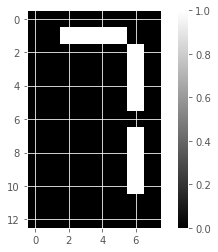

In [80]:
plt.imshow(images[0, :].reshape(13,8), cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

We'll see next how NMF can learn the parts of images.

In [81]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

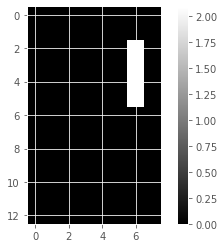

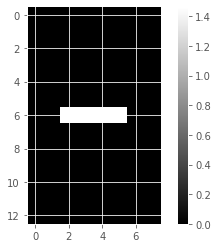

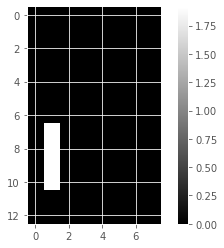

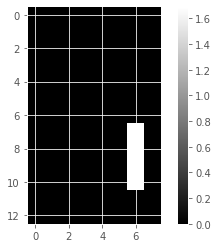

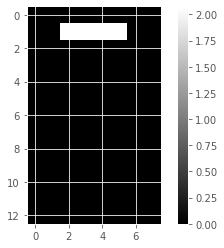

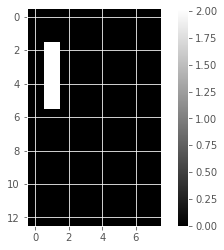

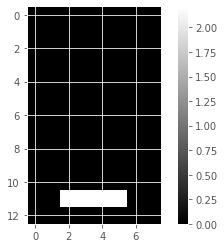

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [82]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(images)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### NMF vs PCA
PCA doesn't learn parts.

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. 

We'll verify this by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples.

Notice that the components of PCA do not represent meaningful parts of images of LED digits!

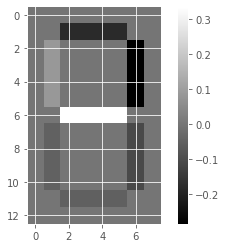

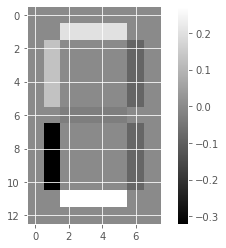

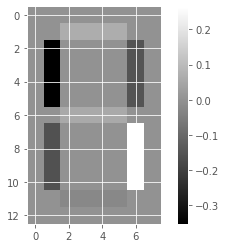

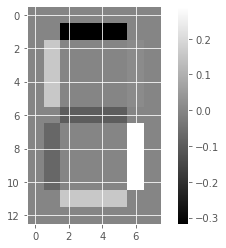

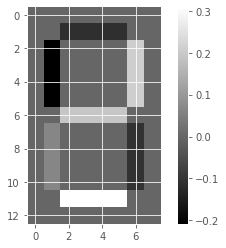

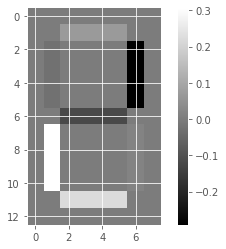

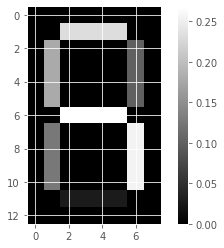

In [83]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(images)

# Call show_as_image on each component
for component in  model.components_:
    show_as_image(component)

---

## Building Recommender Systems using NMF

[VIDEO](https://videos.datacamp.com/transcoded_mp4/2072_unsupervised_learning/v1/ch4_3.mp4)

### Problem
Let's say you are an engineer at a large online newspaper. Your task is to find articles similar to the one being read by the customer. Similar articles should have similar topics.

### Strategy
- We'll apply NMF to the word frequency array of the articles, and using resulting NMF features
- NMF feature values describe the topic of an article. So, similar articles will have similar NMF feature values
- How do we compare NMF feature values?

Let's say `articles` is the word frequency array
``` Python
from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)
```

Now, we'll have NMF features for every article given by the columns of the `nmf_features` array.

#### Comparing NMF feature values
- Similar documents will have similar NMF feature values, but the exact values may not be the same
- We'll calculate the cosine similarity. Higher values indicate greater similarity. Maximum value is 1, when angle between the lines is zero (implying the documents are same)

##### Calculating cosine similarity
``` Python
# Normalizing the features
from sklearn.preporcessing import normalize
norm_features = normalize(nmf_features)

# Select the row corresponding to the current article
current_article = norm_features[23, :] # assuming current article is at index 23
similarities = norm_features.dot(current_article)

print(similarities)
```
- Later, we can label the similarities with the article titles using Pandas DataFrame. Let's say titles are given as a list in `titles`

```Python
import pandas as pd
norm_features = normalize(nmf_features)

df = pd.DataFrame(norm_features, index=titles)
# Selecting normalized feature values for the current article using its title
current_article = df.loc['dog bites man']

# calculating cosine similarity
similarities = df.dot(current_article)
print(similarities.nlargest())
```

## Which articles are similar to 'Cristiano Ronaldo'?
We learnt how to use NMF features and the cosine similarity to find similar articles. We'll apply this to our NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features we obtained previously are available as `nmf_features`, while `titles` is a list of the article titles.

In [84]:
import pandas as pd
from sklearn.preprocessing import normalize

# Normalizing the NMF features
norm_features = normalize(nmf_features)

# Creating a DataFrae of normlized features with index as titles
df = pd.DataFrame(norm_features, index=titles)

# Getting the article corresponding to 'Cristiano Ronaldo'
article = df.loc['Cristiano Ronaldo']

# Computing the cosine similarity
similarities = df.dot(article)

print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommending musical artists
We will use NMF to recommend popular music artists! We have a given sparse array `artists` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, `MaxAbsScaler`, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. Then, you'll use the resulting normalized NMF features for recommendation!

In [98]:
!wget --no-check-certificate -q -N "https://assets.datacamp.com/production/repositories/655/datasets/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip" -O MusicalArtists.zip
!unzip MusicalArtists.zip

Archive:  MusicalArtists.zip
replace Musical artists/artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [99]:
artist_names = pd.read_csv('Musical artists/artists.csv', header=None, squeeze=True).to_numpy()
artist_names

array(['Massive Attack', 'Sublime', 'Beastie Boys', 'Neil Young',
       'Dead Kennedys', 'Orbital', 'Miles Davis', 'Leonard Cohen',
       'Van Morrison', 'NOFX', 'Rancid', 'Lamb', 'Korn',
       'Dropkick Murphys', 'Bob Dylan', 'Eminem', 'Nirvana', 'Van Halen',
       'Damien Rice', 'Elvis Costello', 'Everclear', 'Jimi Hendrix',
       'PJ Harvey', 'Red Hot Chili Peppers', 'Ryan Adams', 'Soundgarden',
       'The White Stripes', 'Madonna', 'Eric Clapton', 'Bob Marley',
       'Dr. Dre', 'The Flaming Lips', 'Tom Waits', 'Moby', 'Cypress Hill',
       'Garbage', 'Fear Factory', '50 Cent', 'Ani DiFranco',
       'Matchbox Twenty', 'The Police', 'Eagles', 'Phish',
       'Stone Temple Pilots', 'Black Sabbath', 'Britney Spears',
       'Fatboy Slim', 'System of a Down', 'Simon & Garfunkel',
       'Snoop Dogg', 'Aimee Mann', 'Less Than Jake', 'Rammstein',
       'Reel Big Fish', 'The Prodigy', 'Pantera', 'Foo Fighters',
       'The Beatles', 'Incubus', 'Audioslave', 'Bright Eyes',
       

In [100]:
artists = pd.read_csv('Musical artists/scrobbler-small-sample.csv')

In [101]:
artists.shape

(2894, 3)

In [102]:
artists.head()

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [103]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. The names of the musical artists are available as the list artist_names.

In [104]:
norm_features.shape
len(artist_names)

111

In [94]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


ValueError: ignored

# ---THE END---